# Libraries, themes

In [3]:
rm(list=ls())

ReqdLibs = c("repr","ggplot2","IRdisplay","ggpubr","patchwork","dplyr","tidyr","boot","purrr",
             #"lmerTest","modelsummary","see",#"stargazer",#"minipack.lm","segmented","ggmagnify","zoo",,"GGally","matrixStats",
             "lubridate","performance","lemon","robustlmm","broom","influence.ME",
             "sjstats","sjPlot","lme4","plotly","ggExtra","ggthemes","ggstance","car",
             "grid","svglite","viridis","patchwork","forcats","emmeans")
invisible(lapply(ReqdLibs, library, character.only = TRUE)) 

thm = theme(
          strip.text.x=element_text(size=16,face="bold"),
          strip.text.y=element_text(size=16),
          legend.text=element_text(size=16,face="bold"),
          legend.position = "right",
          legend.title=element_text(size=16,face="bold"),
          title =element_text(size=14, face='bold'),
          text = element_text(colour = "black",size=18), 
          plot.title = element_text(colour = "black",size = 16, face = "bold"),
          axis.ticks.length = unit(0.4,"cm"),
          axis.line = element_line(colour = "black",linewidth=0.75),
          axis.ticks = element_line(colour = "black",linewidth=0.75),
          axis.text = element_text(colour = "black",size=20),
          axis.title=element_text(size=16)) 

# Data, definitions

## Define subj IDs for adding identifiers

In [4]:
dat = read.csv("Adults_FullData.csv", stringsAsFactors = FALSE) #PrePlateFixedThresh_May2024

kids = c("MUH239", "MUH164", "MUH165","MUH166","MUH232","MUH234","MUH233","MUH235","MUH219","MUH117",
         "MUH298","MUH047","MUH291","MUH257","MUH210","MUH211","MUH212","MUH213","MUH366","MUH603",
         "MUH705","MUH443","MUH444","MUH445","MUH446","MUH816","MUH817","MUH818","MUH970","MUH254",
         "MUH256","MUH967","MUH1004","MUH1005","MUH1006","MUH1007","MUH1013","MUH1014","MUH1030",
         "MUH1015","MUH1016","MUH1017","MUH255","MUH1041","MUH1002","MUH1024","MUH1043","MUH1044",
         "MUH1037","MUH1046","MUH1047","MUH1048","MUH1026","MUH1027","MUH1029","MUH1038","MUH1049",
         "MUH1050","MUH1051","MUH1052","MUH1053","MUH1054","MUH1057","MUH1058","MUH1062","MUH1064",
         "MUH1065","MUH1067","MUH1068","MUH1069","MUH1070","MUH1071","MUH1072","MUH1073","MUH1077",
         "MUH1078","MUH1079","MUH1080","MUH1081","MUH1082","MUH1083","MUH1084","MUH1085","MUH1086",
         "MUH1087","MUH1088","MUH1089","MUH1090","MUH1092","MUH1094","MUH1095","MUH1096","MUH1097",
         "MUH1098","MUH1099","MUH1100","MUH1101","MUH451","MUH1102","MUH1103","MUH1104","MUH1105",
         "MUH1106","MUH1107","MUH731","MUH1112","MUH1113","MUH1114","MUH1115","MUH1116","MUH1117",
         "MUH1118","MUH1119","MUH1122","MUH1123")

v2_2 = c("MUH278","MUH279","MUH280","MUH281","MUH117","MUH235","MUH296","MUH302","MUH301","MUH294","MUH295","MUH298",
         "MUH293","MUH260","MUH220","MUH346","MUH259","MUH226","MUH227","MUH117","MUH235","MUH298","MUH1048")

v3 = c("MUH537","MUH584","MUH643","MUH631","MUH536","MUH598","MUH00U","MUH535","MUH617","MUH644",
       "MUH683","MUH684","MUH616","MUH750","MUH822","MUH749","MUH819","MUH821","MUH825","MUH832","MUH833")
rmSubj = c("MUH321","MUH323","MUH432","MUH341","MUH322","MUH361","MUH328","MUH475","MUH583","MUH530",
          "MUH572","MUH573","MUH534","MUH1027","MUH445")

v4 = c("MUH190","MUH997","MUH996","MUHJY")
v5 = c("MUHBH","MUHNC","MUHRC")

# kidsDemo = read.csv("children_demo.csv",stringsAsFactors = FALSE)

# k1 = kidsDemo %>% filter(Age%in%c(8,9)) %>% .$subjID
# k2 = kidsDemo %>% filter(Age%in%c(10,11)) %>% .$subjID
# k3 = kidsDemo %>% filter(Age%in%c(12,13)) %>% .$subjID 
# k4 = kidsDemo %>% filter(Age%in%c(14,15)) %>% .$subjID
# k5 = kidsDemo %>% filter(Age%in%c(16,17)) %>% .$subjID 

dat$cond = factor(dat$cond, levels=c('baseline','adaptation','washout'))

dat %>% filter() %>% mutate(reward = ifelse(is.na(Ry), NA,reward)) %>% {.->>dat}

head(dat)
unique(dat$reward)
#check that reward is NA for trials that were marked as omit on preproccessing
# dat %>% filter(is.na(Ry))

X subj   trial gain reward Ry        sRy       Ly        sLy       Py       
1 1 MUH000 1     1    1      0.3218737 0.3218737 0.3171156 0.3171156 0.3077876
2 2 MUH000 2     1    1      0.3240338 0.3240338 0.3158020 0.3158020 0.2906669
3 3 MUH000 3     1    1      0.3185680 0.3185680 0.3316496 0.3316496 0.3005657
4 4 MUH000 4     1    1      0.3055809 0.3055809 0.3165627 0.3165627 0.2985514
5 5 MUH000 5     1    1      0.2953125 0.2953125 0.3054349 0.3054349 0.2922828
6 6 MUH000 6     1    1      0.3163733 0.3163733 0.3305105 0.3305105 0.2918796
  ⋯ EarlySlopeAdj dispPlCAdj LateSlopeAdj earlyDispR earlyDispL earlyDispAdj
1 ⋯ 1.0339469     1.1248724  1.0150046    0.06451107 0.06334559 1.0183988   
2 ⋯ 0.9911115     0.8626504  1.0260663    0.06478895 0.06320303 1.0250925   
3 ⋯ 1.0034200     0.7500733  0.9605560    0.06360334 0.06652451 0.9560889   
4 ⋯ 1.0333849     0.9025811  0.9653093    0.06110228 0.06343972 0.9631549   
5 ⋯ 1.0885727     0.9088426  0.9668593    0.05912567 0.06121929 0.9658014   
6 ⋯ 1.1233890     0.9029074  0.9572261    0.06317590 0.06621440 0.9541112   
  speedPlC  PlOut  heightImp2 ID
1 0.2792180 within 0.3        1 
2 0.1621773 within 0.3        2 
3 0.2172333 within 0.3        3 
4 0.4742773 within 0.3        4 
5 0.4017561 within 0.3        5 
6 0.3202850 within 0.3        6

[1] 1 0

## Add identifiers

In [5]:
isnt_out_z <- function(x, thres = 2.5, na.rm = TRUE) {
  abs(x - mean(x, na.rm = na.rm)) <= thres * sd(x, na.rm = na.rm)
}

compute_group_non_outliers <- . %>%
  # Compute per group mean values of columns
  group_by(group) %>%
  summarise_if(is.numeric, mean) %>%
  ungroup() %>%

  # Detect outliers among groups
  mutate_if(is.numeric, isnt_out_z)  %>% 
  # Remove unnecessary columns
  select_if(Negate(is.numeric))

In [6]:
rampUpT = c(51:125)
noILratio = c("v3","v4")
dat %>%  
filter(!subj%in%rmSubj) %>% 
filter(!subj%in%v5) %>%  #this is filtering out all the "gDown participants"
filter(!subj%in%v4)%>% 
filter(!Py <0.2) %>% 
mutate(grp = ifelse(subj%in%kids,"kids","adults"),
       kgrp=grp,
       # kgrp = case_when(subj%in%k1 ~ "8-9",
       #                  subj%in%k2 ~ "10-11",
       #                  subj%in%k3 ~ "12-13",
       #                  subj%in%k4 ~ "14-15",
       #                  subj%in%k5 ~ "16-17",
       #                  TRUE ~ '>18'),
       tgtHt = ifelse(subj%in%v2_2,"6","3"),
       tgtHtC = ifelse(subj%in%v2_2,"wide","narrow"),
       expGrp=ifelse(subj%in%v3,"unimanual","bimanual"),
       cond2 = ifelse(trial%in%rampUpT,"rampUp",as.character(cond)),
       gainF = ifelse(gain==1,gain,1/gain), 
       
       newg = Ry/sRy,
       projDispRs = (slopesR_2/gainF)*mt, # a way of getting the projected displacement of the seen hand
       projDispR = slopesR_2*mt, 
       projDispL = slopesL_2*mt,
       
       totDispR = Ry + (Py -sRy),
       totDispL = Ly + (Py -sLy),
       totDispRs = sRy + (Py -sRy),
       
       # totDispR = Ry + ((Py -sRy)/gain),
       # totDispL = Ly + ((Py -sLy)/gain),
       # totDispRs = sRy + ((Py -sRy)/gain),
       # speed10Adj = ifelse(subj%in%v3,speed10R, speed10R/speed10L),
       EarlySlopeAdj = ifelse(subj%in%v3,slopesR_2, slopesR_2/slopesL_2),
       # dispPlCAdj = ifelse(subj%in%v3, dispR_Plc, dispR_Plc/dispL_Plc), 
       LateSlopeAdj = ifelse(subj%in%v3,slopesR_10, slopesR_10/slopesL_10),
       earlyDispR =  slopesR_2*latenciesR_2,
       earlyDispL = slopesL_2*latenciesL_2,
       earlyDispAdj = earlyDispR/earlyDispL,
       # speedPlC = dispR_Plc/timeR_Plc,
       PlOut = ifelse(Py < 0.285, 'under', ifelse(Py > 0.315, 'over', 'within')),
       heightImp2 = gain*0.3)   %>% 
select(!X) %>% 

{.->>dat2}

dat2$ID <- seq_along(dat2[,1])

dat2$cond2 = factor(dat2$cond2, levels=c('baseline','rampUp','adaptation','washout'),
                                labels = c("baseline","rampUp","plateau","washout"))
dat2$cond = factor(dat2$cond, levels=c('baseline','adaptation','washout'))
# dat2$kgrp = factor(dat2$kgrp, levels=c('8-9','10-11','12-13','14-15','16-17','>18'))
dat2$expGrp = factor(dat2$expGrp,levels=c('unimanual','bimanual'))
# dat2$tgtHtC = factor(dat2$tgtHt,levels=c('3','6'),labels = c('narrow','wide'))

tail(dat2)

# below quick check of subjects
# dat2 %>% filter(expGrp=="bimanual" & tgtHt==3 & grp=="kids") %>% distinct(subj) %>% dim(.)


subj   trial gain reward Ry        sRy       Ly sLy Py        mt        ⋯
14378 MUH832 255   1    1      0.3037409 0.3037409 0  0   0.3184430 0.6433105 ⋯
14379 MUH832 256   1    1      0.3092831 0.3092831 0  0   0.3262444 0.7282104 ⋯
14380 MUH832 257   1    1      0.3117018 0.3117018 0  0   0.3301632 0.7688599 ⋯
14381 MUH832 258   1    1      0.3113765 0.3113765 0  0   0.3175604 0.8175659 ⋯
14382 MUH832 259   1    1      0.3035288 0.3035288 0  0   0.3035158 0.5863037 ⋯
14383 MUH832 260   1    1      0.3225651 0.3225651 0  0   0.3256205 0.6674194 ⋯
      dispPlCAdj LateSlopeAdj earlyDispR earlyDispL earlyDispAdj speedPlC 
14378 0.04459896 0.4721529    0.06073055 0          Inf          0.1708462
14379 0.04857472 0.4247166    0.06198925 0          Inf          0.2347635
14380 0.07565332 0.4054078    0.06212487 0          Inf          0.2151170
14381 0.07335866 0.3808580    0.06220687 0          Inf          0.2244460
14382 0.07400005 0.5176989    0.06070079 0          Inf          0.2474825
14383 0.08072717 0.4833020    0.06448310 0          Inf          0.1486273
      PlOut  heightImp2 ID    tgtHtC
14378 over   0.3        14378 narrow
14379 over   0.3        14379 narrow
14380 over   0.3        14380 narrow
14381 over   0.3        14381 narrow
14382 within 0.3        14382 narrow
14383 over   0.3        14383 narrow

In [7]:
dat2  %>% 
unite(col = "group", grp,expGrp,tgtHt,subj,cond,trial) %>% 
drop_na() %>% 
compute_group_non_outliers() %>% 
filter(Py == FALSE) %>% 
# filter(Ry == FALSE | EarlySlopeAdj==FALSE & slopesR_2==FALSE)  %>%  #
{.$group->> outs}
cat(paste(shQuote(outs, type="cmd"), collapse=", "))

dfTrials = dim(dat2)[1]
perc_rem = (length(outs)/dfTrials)*100 
display_markdown(paste("**With these outliers, we will be removing",length(outs),"data points out of ",dfTrials,"(",round(perc_rem,3),"%) of the data**"))

#below printout to rem


"adults_unimanual_3_MUH537_adaptation_147"

**With these outliers, we will be removing 1 data points out of  14383 ( 0.007 %) of the data**

In [8]:
# Your data vector
subjects <- c("adults_bimanual_3_MUH000_adaptation_120", "adults_bimanual_3_MUH000_adaptation_121", "adults_bimanual_3_MUH000_adaptation_127", "adults_bimanual_3_MUH000_adaptation_186", "adults_bimanual_3_MUH000_adaptation_187", "adults_bimanual_3_MUH000_adaptation_87", "adults_bimanual_3_MUH215_adaptation_124", "adults_bimanual_3_MUH215_adaptation_139", "adults_bimanual_3_MUH215_adaptation_154", "adults_bimanual_3_MUH215_washout_257", "adults_bimanual_3_MUH272_adaptation_103", "adults_bimanual_3_MUH273_adaptation_185", "adults_bimanual_3_MUH274_adaptation_165", "adults_bimanual_3_MUH274_washout_257", "adults_bimanual_6_MUH227_adaptation_100", "adults_bimanual_6_MUH227_adaptation_171", "adults_bimanual_6_MUH278_adaptation_105", "adults_bimanual_6_MUH278_adaptation_131", "adults_bimanual_6_MUH281_washout_260", "adults_bimanual_6_MUH301_adaptation_117", "adults_unimanual_3_MUH00U_adaptation_116", "adults_unimanual_3_MUH00U_adaptation_123", "adults_unimanual_3_MUH00U_adaptation_125", "adults_unimanual_3_MUH00U_adaptation_126", "adults_unimanual_3_MUH00U_adaptation_127", "adults_unimanual_3_MUH00U_adaptation_161", "adults_unimanual_3_MUH00U_adaptation_182", "adults_unimanual_3_MUH00U_adaptation_183", "adults_unimanual_3_MUH00U_adaptation_192", "adults_unimanual_3_MUH00U_adaptation_193", "adults_unimanual_3_MUH00U_adaptation_194", "adults_unimanual_3_MUH00U_adaptation_195", "adults_unimanual_3_MUH00U_adaptation_196", "adults_unimanual_3_MUH00U_adaptation_197", "adults_unimanual_3_MUH00U_adaptation_198", "adults_unimanual_3_MUH00U_adaptation_199", "adults_unimanual_3_MUH00U_adaptation_200", "adults_unimanual_3_MUH00U_adaptation_82", "adults_unimanual_3_MUH00U_adaptation_84", "adults_unimanual_3_MUH00U_adaptation_85", "adults_unimanual_3_MUH00U_adaptation_88", "adults_unimanual_3_MUH00U_adaptation_90", "adults_unimanual_3_MUH00U_adaptation_91", "adults_unimanual_3_MUH00U_adaptation_92", "adults_unimanual_3_MUH00U_adaptation_94", "adults_unimanual_3_MUH00U_baseline_33", "adults_unimanual_3_MUH00U_baseline_34", "adults_unimanual_3_MUH00U_baseline_36", "adults_unimanual_3_MUH00U_baseline_37", "adults_unimanual_3_MUH00U_washout_201", "adults_unimanual_3_MUH00U_washout_202", "adults_unimanual_3_MUH00U_washout_203", "adults_unimanual_3_MUH00U_washout_204", "adults_unimanual_3_MUH00U_washout_205", "adults_unimanual_3_MUH00U_washout_206", "adults_unimanual_3_MUH00U_washout_207", "adults_unimanual_3_MUH00U_washout_208", "adults_unimanual_3_MUH00U_washout_209", "adults_unimanual_3_MUH00U_washout_211", "adults_unimanual_3_MUH00U_washout_242", "adults_unimanual_3_MUH00U_washout_243", "adults_unimanual_3_MUH00U_washout_244", "adults_unimanual_3_MUH00U_washout_245", "adults_unimanual_3_MUH00U_washout_246", "adults_unimanual_3_MUH00U_washout_247", "adults_unimanual_3_MUH00U_washout_248", "adults_unimanual_3_MUH00U_washout_249", "adults_unimanual_3_MUH00U_washout_250", "adults_unimanual_3_MUH00U_washout_251", "adults_unimanual_3_MUH00U_washout_252", "adults_unimanual_3_MUH00U_washout_253", "adults_unimanual_3_MUH00U_washout_254", "adults_unimanual_3_MUH00U_washout_255", "adults_unimanual_3_MUH00U_washout_256", "adults_unimanual_3_MUH00U_washout_257", "adults_unimanual_3_MUH00U_washout_258", "adults_unimanual_3_MUH00U_washout_259", "adults_unimanual_3_MUH00U_washout_260", "adults_unimanual_3_MUH819_adaptation_194"

)
              
# Extract subject identifiers (e.g., MUH000, MUH215, etc.)
subject_ids <- sub(".*_(MUH\\d{3}).*", "\\1", subjects)

# Count the occurrences of each subject ID
subject_count <- table(subject_ids)
# subject_count
# Find the maximum number of repeats for any subject
max_repeats <- unique(subject_count)
max_repeats
# Print the result


[1] 1 6 4 2

In [9]:
# rem0 = c("adults_bimanual_MUH000_adaptation_plateau_127", "adults_bimanual_MUH000_adaptation_plateau_183", "adults_bimanual_MUH000_adaptation_plateau_184", "adults_bimanual_MUH000_adaptation_plateau_186", "adults_bimanual_MUH000_adaptation_plateau_187", "adults_bimanual_MUH000_adaptation_rampUp_106", "adults_bimanual_MUH000_adaptation_rampUp_110", "adults_bimanual_MUH000_adaptation_rampUp_114", "adults_bimanual_MUH000_adaptation_rampUp_120", "adults_bimanual_MUH000_adaptation_rampUp_121", "adults_bimanual_MUH000_adaptation_rampUp_87", "adults_bimanual_MUH188_adaptation_plateau_154", "adults_bimanual_MUH188_adaptation_plateau_190", "adults_bimanual_MUH189_adaptation_plateau_132", "adults_bimanual_MUH215_adaptation_plateau_139", "adults_bimanual_MUH215_adaptation_plateau_145", "adults_bimanual_MUH215_adaptation_plateau_154", "adults_bimanual_MUH215_adaptation_rampUp_124", "adults_bimanual_MUH215_washout_washout_257", "adults_bimanual_MUH226_adaptation_plateau_138", "adults_bimanual_MUH227_adaptation_plateau_171", "adults_bimanual_MUH227_adaptation_plateau_184", "adults_bimanual_MUH227_adaptation_rampUp_100", "adults_bimanual_MUH227_washout_washout_247", "adults_bimanual_MUH245_adaptation_rampUp_108", "adults_bimanual_MUH252_adaptation_plateau_151", "adults_bimanual_MUH252_adaptation_plateau_188", "adults_bimanual_MUH258_adaptation_plateau_153", "adults_bimanual_MUH258_adaptation_rampUp_125", "adults_bimanual_MUH272_adaptation_rampUp_103", "adults_bimanual_MUH273_adaptation_plateau_185", "adults_bimanual_MUH274_adaptation_plateau_165", "adults_bimanual_MUH274_washout_washout_202", "adults_bimanual_MUH274_washout_washout_257", "adults_bimanual_MUH278_adaptation_plateau_131", "adults_bimanual_MUH278_adaptation_rampUp_105", "adults_bimanual_MUH281_washout_washout_225", "adults_bimanual_MUH281_washout_washout_260", "adults_bimanual_MUH294_adaptation_plateau_186", "adults_bimanual_MUH301_adaptation_rampUp_117", "adults_unimanual_MUH00U_adaptation_plateau_126", "adults_unimanual_MUH00U_adaptation_plateau_127", "adults_unimanual_MUH00U_adaptation_plateau_132", "adults_unimanual_MUH00U_adaptation_plateau_133", "adults_unimanual_MUH00U_adaptation_plateau_134", "adults_unimanual_MUH00U_adaptation_plateau_135", "adults_unimanual_MUH00U_adaptation_plateau_136", "adults_unimanual_MUH00U_adaptation_plateau_137", "adults_unimanual_MUH00U_adaptation_plateau_138", "adults_unimanual_MUH00U_adaptation_plateau_139", "adults_unimanual_MUH00U_adaptation_plateau_140", "adults_unimanual_MUH00U_adaptation_plateau_145", "adults_unimanual_MUH00U_adaptation_plateau_146", "adults_unimanual_MUH00U_adaptation_plateau_147", "adults_unimanual_MUH00U_adaptation_plateau_148", "adults_unimanual_MUH00U_adaptation_plateau_149", "adults_unimanual_MUH00U_adaptation_plateau_150", "adults_unimanual_MUH00U_adaptation_plateau_151", "adults_unimanual_MUH00U_adaptation_plateau_153", "adults_unimanual_MUH00U_adaptation_plateau_154", "adults_unimanual_MUH00U_adaptation_plateau_155", "adults_unimanual_MUH00U_adaptation_plateau_156", "adults_unimanual_MUH00U_adaptation_plateau_158", "adults_unimanual_MUH00U_adaptation_plateau_160", "adults_unimanual_MUH00U_adaptation_plateau_161", "adults_unimanual_MUH00U_adaptation_plateau_163", "adults_unimanual_MUH00U_adaptation_plateau_164", "adults_unimanual_MUH00U_adaptation_plateau_165", "adults_unimanual_MUH00U_adaptation_plateau_166", "adults_unimanual_MUH00U_adaptation_plateau_167", "adults_unimanual_MUH00U_adaptation_plateau_168", "adults_unimanual_MUH00U_adaptation_plateau_170", "adults_unimanual_MUH00U_adaptation_plateau_172", "adults_unimanual_MUH00U_adaptation_plateau_173", "adults_unimanual_MUH00U_adaptation_plateau_175", "adults_unimanual_MUH00U_adaptation_plateau_176", "adults_unimanual_MUH00U_adaptation_plateau_177", "adults_unimanual_MUH00U_adaptation_plateau_178", "adults_unimanual_MUH00U_adaptation_plateau_179", "adults_unimanual_MUH00U_adaptation_plateau_180", "adults_unimanual_MUH00U_adaptation_plateau_181", "adults_unimanual_MUH00U_adaptation_plateau_182", "adults_unimanual_MUH00U_adaptation_plateau_183", "adults_unimanual_MUH00U_adaptation_plateau_184", "adults_unimanual_MUH00U_adaptation_plateau_185", "adults_unimanual_MUH00U_adaptation_plateau_186", "adults_unimanual_MUH00U_adaptation_plateau_187", "adults_unimanual_MUH00U_adaptation_plateau_188", "adults_unimanual_MUH00U_adaptation_plateau_189", "adults_unimanual_MUH00U_adaptation_plateau_190", "adults_unimanual_MUH00U_adaptation_plateau_191", "adults_unimanual_MUH00U_adaptation_plateau_192", "adults_unimanual_MUH00U_adaptation_plateau_193", "adults_unimanual_MUH00U_adaptation_plateau_194", "adults_unimanual_MUH00U_adaptation_plateau_195", "adults_unimanual_MUH00U_adaptation_plateau_196", "adults_unimanual_MUH00U_adaptation_plateau_197", "adults_unimanual_MUH00U_adaptation_plateau_198", "adults_unimanual_MUH00U_adaptation_plateau_199", "adults_unimanual_MUH00U_adaptation_plateau_200", "adults_unimanual_MUH00U_adaptation_rampUp_102", "adults_unimanual_MUH00U_adaptation_rampUp_103", "adults_unimanual_MUH00U_adaptation_rampUp_104", "adults_unimanual_MUH00U_adaptation_rampUp_105", "adults_unimanual_MUH00U_adaptation_rampUp_106", "adults_unimanual_MUH00U_adaptation_rampUp_107", "adults_unimanual_MUH00U_adaptation_rampUp_108", "adults_unimanual_MUH00U_adaptation_rampUp_109", "adults_unimanual_MUH00U_adaptation_rampUp_110", "adults_unimanual_MUH00U_adaptation_rampUp_111", "adults_unimanual_MUH00U_adaptation_rampUp_112", "adults_unimanual_MUH00U_adaptation_rampUp_113", "adults_unimanual_MUH00U_adaptation_rampUp_114", "adults_unimanual_MUH00U_adaptation_rampUp_115", "adults_unimanual_MUH00U_adaptation_rampUp_116", "adults_unimanual_MUH00U_adaptation_rampUp_117", "adults_unimanual_MUH00U_adaptation_rampUp_118", "adults_unimanual_MUH00U_adaptation_rampUp_119", "adults_unimanual_MUH00U_adaptation_rampUp_120", "adults_unimanual_MUH00U_adaptation_rampUp_121", "adults_unimanual_MUH00U_adaptation_rampUp_123", "adults_unimanual_MUH00U_adaptation_rampUp_124", "adults_unimanual_MUH00U_adaptation_rampUp_125", "adults_unimanual_MUH00U_adaptation_rampUp_51", "adults_unimanual_MUH00U_adaptation_rampUp_52", "adults_unimanual_MUH00U_adaptation_rampUp_58", "adults_unimanual_MUH00U_adaptation_rampUp_59", "adults_unimanual_MUH00U_adaptation_rampUp_62", "adults_unimanual_MUH00U_adaptation_rampUp_63", "adults_unimanual_MUH00U_adaptation_rampUp_65", "adults_unimanual_MUH00U_adaptation_rampUp_66", "adults_unimanual_MUH00U_adaptation_rampUp_67", "adults_unimanual_MUH00U_adaptation_rampUp_68", "adults_unimanual_MUH00U_adaptation_rampUp_69", "adults_unimanual_MUH00U_adaptation_rampUp_70", "adults_unimanual_MUH00U_adaptation_rampUp_71", "adults_unimanual_MUH00U_adaptation_rampUp_72", "adults_unimanual_MUH00U_adaptation_rampUp_73", "adults_unimanual_MUH00U_adaptation_rampUp_74", "adults_unimanual_MUH00U_adaptation_rampUp_75", "adults_unimanual_MUH00U_adaptation_rampUp_82", "adults_unimanual_MUH00U_adaptation_rampUp_84", "adults_unimanual_MUH00U_adaptation_rampUp_85", "adults_unimanual_MUH00U_adaptation_rampUp_86", "adults_unimanual_MUH00U_adaptation_rampUp_88", "adults_unimanual_MUH00U_adaptation_rampUp_90", "adults_unimanual_MUH00U_adaptation_rampUp_91", "adults_unimanual_MUH00U_adaptation_rampUp_92", "adults_unimanual_MUH00U_adaptation_rampUp_94", "adults_unimanual_MUH00U_baseline_baseline_10", "adults_unimanual_MUH00U_baseline_baseline_11", "adults_unimanual_MUH00U_baseline_baseline_12", "adults_unimanual_MUH00U_baseline_baseline_13", "adults_unimanual_MUH00U_baseline_baseline_14", "adults_unimanual_MUH00U_baseline_baseline_15", "adults_unimanual_MUH00U_baseline_baseline_16", "adults_unimanual_MUH00U_baseline_baseline_20", "adults_unimanual_MUH00U_baseline_baseline_21", "adults_unimanual_MUH00U_baseline_baseline_22", "adults_unimanual_MUH00U_baseline_baseline_23", "adults_unimanual_MUH00U_baseline_baseline_24", "adults_unimanual_MUH00U_baseline_baseline_25", "adults_unimanual_MUH00U_baseline_baseline_26", "adults_unimanual_MUH00U_baseline_baseline_27", "adults_unimanual_MUH00U_baseline_baseline_29", "adults_unimanual_MUH00U_baseline_baseline_32", "adults_unimanual_MUH00U_baseline_baseline_33", "adults_unimanual_MUH00U_baseline_baseline_34", "adults_unimanual_MUH00U_baseline_baseline_35", "adults_unimanual_MUH00U_baseline_baseline_36", "adults_unimanual_MUH00U_baseline_baseline_37", "adults_unimanual_MUH00U_baseline_baseline_40", "adults_unimanual_MUH00U_baseline_baseline_41", "adults_unimanual_MUH00U_baseline_baseline_42", "adults_unimanual_MUH00U_baseline_baseline_43", "adults_unimanual_MUH00U_baseline_baseline_44", "adults_unimanual_MUH00U_baseline_baseline_46", "adults_unimanual_MUH00U_baseline_baseline_47", "adults_unimanual_MUH00U_baseline_baseline_48", "adults_unimanual_MUH00U_baseline_baseline_49", "adults_unimanual_MUH00U_baseline_baseline_5", "adults_unimanual_MUH00U_baseline_baseline_50", "adults_unimanual_MUH00U_baseline_baseline_6", "adults_unimanual_MUH00U_baseline_baseline_7", "adults_unimanual_MUH00U_baseline_baseline_8", "adults_unimanual_MUH00U_baseline_baseline_9", "adults_unimanual_MUH00U_washout_washout_201", "adults_unimanual_MUH00U_washout_washout_202", "adults_unimanual_MUH00U_washout_washout_203", "adults_unimanual_MUH00U_washout_washout_204", "adults_unimanual_MUH00U_washout_washout_205", "adults_unimanual_MUH00U_washout_washout_206", "adults_unimanual_MUH00U_washout_washout_207", "adults_unimanual_MUH00U_washout_washout_208", "adults_unimanual_MUH00U_washout_washout_209", "adults_unimanual_MUH00U_washout_washout_210", "adults_unimanual_MUH00U_washout_washout_211", "adults_unimanual_MUH00U_washout_washout_213", "adults_unimanual_MUH00U_washout_washout_215", "adults_unimanual_MUH00U_washout_washout_217", "adults_unimanual_MUH00U_washout_washout_218", "adults_unimanual_MUH00U_washout_washout_219", "adults_unimanual_MUH00U_washout_washout_220", "adults_unimanual_MUH00U_washout_washout_221", "adults_unimanual_MUH00U_washout_washout_222", "adults_unimanual_MUH00U_washout_washout_223", "adults_unimanual_MUH00U_washout_washout_224", "adults_unimanual_MUH00U_washout_washout_225", "adults_unimanual_MUH00U_washout_washout_226", "adults_unimanual_MUH00U_washout_washout_227", "adults_unimanual_MUH00U_washout_washout_228", "adults_unimanual_MUH00U_washout_washout_229", "adults_unimanual_MUH00U_washout_washout_230", "adults_unimanual_MUH00U_washout_washout_231", "adults_unimanual_MUH00U_washout_washout_232", "adults_unimanual_MUH00U_washout_washout_233", "adults_unimanual_MUH00U_washout_washout_234", "adults_unimanual_MUH00U_washout_washout_235", "adults_unimanual_MUH00U_washout_washout_236", "adults_unimanual_MUH00U_washout_washout_237", "adults_unimanual_MUH00U_washout_washout_238", "adults_unimanual_MUH00U_washout_washout_239", "adults_unimanual_MUH00U_washout_washout_240", "adults_unimanual_MUH00U_washout_washout_241", "adults_unimanual_MUH00U_washout_washout_242", "adults_unimanual_MUH00U_washout_washout_243", "adults_unimanual_MUH00U_washout_washout_244", "adults_unimanual_MUH00U_washout_washout_245", "adults_unimanual_MUH00U_washout_washout_246", "adults_unimanual_MUH00U_washout_washout_247", "adults_unimanual_MUH00U_washout_washout_248", "adults_unimanual_MUH00U_washout_washout_249", "adults_unimanual_MUH00U_washout_washout_250", "adults_unimanual_MUH00U_washout_washout_251", "adults_unimanual_MUH00U_washout_washout_252", "adults_unimanual_MUH00U_washout_washout_253", "adults_unimanual_MUH00U_washout_washout_254", "adults_unimanual_MUH00U_washout_washout_255", "adults_unimanual_MUH00U_washout_washout_256", "adults_unimanual_MUH00U_washout_washout_257", "adults_unimanual_MUH00U_washout_washout_258", "adults_unimanual_MUH00U_washout_washout_259", "adults_unimanual_MUH00U_washout_washout_260", "adults_unimanual_MUH819_adaptation_plateau_194", "adults_unimanual_MUH825_adaptation_plateau_156"
# )
# rem = c("adults_bimanual_MUH000_adaptation_plateau_127", "adults_bimanual_MUH000_adaptation_plateau_186", "adults_bimanual_MUH000_adaptation_plateau_187", "adults_bimanual_MUH000_adaptation_rampUp_120", "adults_bimanual_MUH000_adaptation_rampUp_121", "adults_bimanual_MUH000_adaptation_rampUp_87", "adults_bimanual_MUH215_adaptation_plateau_139", "adults_bimanual_MUH215_adaptation_plateau_154", "adults_bimanual_MUH215_adaptation_rampUp_124", "adults_bimanual_MUH215_washout_washout_257", "adults_bimanual_MUH227_adaptation_plateau_171", "adults_bimanual_MUH227_adaptation_rampUp_100", "adults_bimanual_MUH272_adaptation_rampUp_103", "adults_bimanual_MUH273_adaptation_plateau_185", "adults_bimanual_MUH274_adaptation_plateau_165", "adults_bimanual_MUH274_washout_washout_257", "adults_bimanual_MUH278_adaptation_plateau_131", "adults_bimanual_MUH278_adaptation_rampUp_105", "adults_bimanual_MUH281_washout_washout_260", "adults_bimanual_MUH301_adaptation_rampUp_117", "adults_unimanual_MUH00U_adaptation_plateau_126", "adults_unimanual_MUH00U_adaptation_plateau_127", "adults_unimanual_MUH00U_adaptation_plateau_161", "adults_unimanual_MUH00U_adaptation_plateau_182", "adults_unimanual_MUH00U_adaptation_plateau_183", "adults_unimanual_MUH00U_adaptation_plateau_192", "adults_unimanual_MUH00U_adaptation_plateau_193", "adults_unimanual_MUH00U_adaptation_plateau_194", "adults_unimanual_MUH00U_adaptation_plateau_195", "adults_unimanual_MUH00U_adaptation_plateau_196", "adults_unimanual_MUH00U_adaptation_plateau_197", "adults_unimanual_MUH00U_adaptation_plateau_198", "adults_unimanual_MUH00U_adaptation_plateau_199", "adults_unimanual_MUH00U_adaptation_plateau_200", "adults_unimanual_MUH00U_adaptation_rampUp_116", "adults_unimanual_MUH00U_adaptation_rampUp_123", "adults_unimanual_MUH00U_adaptation_rampUp_125", "adults_unimanual_MUH00U_adaptation_rampUp_82", "adults_unimanual_MUH00U_adaptation_rampUp_84", "adults_unimanual_MUH00U_adaptation_rampUp_85", "adults_unimanual_MUH00U_adaptation_rampUp_88", "adults_unimanual_MUH00U_adaptation_rampUp_90", "adults_unimanual_MUH00U_adaptation_rampUp_91", "adults_unimanual_MUH00U_adaptation_rampUp_92", "adults_unimanual_MUH00U_adaptation_rampUp_94", "adults_unimanual_MUH00U_baseline_baseline_33", "adults_unimanual_MUH00U_baseline_baseline_34", "adults_unimanual_MUH00U_baseline_baseline_36", "adults_unimanual_MUH00U_baseline_baseline_37", "adults_unimanual_MUH00U_washout_washout_201", "adults_unimanual_MUH00U_washout_washout_202", "adults_unimanual_MUH00U_washout_washout_203", "adults_unimanual_MUH00U_washout_washout_204", "adults_unimanual_MUH00U_washout_washout_205", "adults_unimanual_MUH00U_washout_washout_206", "adults_unimanual_MUH00U_washout_washout_207", "adults_unimanual_MUH00U_washout_washout_208", "adults_unimanual_MUH00U_washout_washout_209", "adults_unimanual_MUH00U_washout_washout_211", "adults_unimanual_MUH00U_washout_washout_242", "adults_unimanual_MUH00U_washout_washout_243", "adults_unimanual_MUH00U_washout_washout_244", "adults_unimanual_MUH00U_washout_washout_245", "adults_unimanual_MUH00U_washout_washout_246", "adults_unimanual_MUH00U_washout_washout_247", "adults_unimanual_MUH00U_washout_washout_248", "adults_unimanual_MUH00U_washout_washout_249", "adults_unimanual_MUH00U_washout_washout_250", "adults_unimanual_MUH00U_washout_washout_251", "adults_unimanual_MUH00U_washout_washout_252", "adults_unimanual_MUH00U_washout_washout_253", "adults_unimanual_MUH00U_washout_washout_254", "adults_unimanual_MUH00U_washout_washout_255", "adults_unimanual_MUH00U_washout_washout_256", "adults_unimanual_MUH00U_washout_washout_257", "adults_unimanual_MUH00U_washout_washout_258", "adults_unimanual_MUH00U_washout_washout_259", "adults_unimanual_MUH00U_washout_washout_260", "adults_unimanual_MUH819_adaptation_plateau_194"
# )
# rem = c("adults_bimanual_MUH000_adaptation_plateau_187", "adults_bimanual_MUH000_washout_washout_212", "adults_bimanual_MUH000_washout_washout_225", "adults_bimanual_MUH171_washout_washout_201", "adults_bimanual_MUH171_washout_washout_241", "adults_bimanual_MUH171_washout_washout_247", "adults_bimanual_MUH188_washout_washout_229", "adults_bimanual_MUH189_adaptation_plateau_162", "adults_bimanual_MUH189_washout_washout_224", "adults_bimanual_MUH215_washout_washout_201", "adults_bimanual_MUH215_washout_washout_202", "adults_bimanual_MUH215_washout_washout_224", "adults_bimanual_MUH220_washout_washout_206", "adults_bimanual_MUH220_washout_washout_228", "adults_bimanual_MUH227_adaptation_rampUp_100", "adults_bimanual_MUH227_washout_washout_227", "adults_bimanual_MUH227_washout_washout_241", "adults_bimanual_MUH248_adaptation_rampUp_69", "adults_bimanual_MUH251_adaptation_plateau_140", "adults_bimanual_MUH251_adaptation_plateau_163", "adults_bimanual_MUH251_adaptation_rampUp_51", "adults_bimanual_MUH251_adaptation_rampUp_88", "adults_bimanual_MUH251_baseline_baseline_10", "adults_bimanual_MUH253_adaptation_plateau_184", "adults_bimanual_MUH258_washout_washout_230", "adults_bimanual_MUH258_washout_washout_246", "adults_bimanual_MUH260_baseline_baseline_5", "adults_bimanual_MUH269_baseline_baseline_44", "adults_bimanual_MUH272_adaptation_rampUp_103", "adults_bimanual_MUH272_baseline_baseline_3", "adults_bimanual_MUH272_washout_washout_227", "adults_bimanual_MUH273_adaptation_plateau_185", "adults_bimanual_MUH273_adaptation_rampUp_51", "adults_bimanual_MUH273_washout_washout_201", "adults_bimanual_MUH273_washout_washout_202", "adults_bimanual_MUH273_washout_washout_216", "adults_bimanual_MUH273_washout_washout_237", "adults_bimanual_MUH274_washout_washout_231", "adults_bimanual_MUH274_washout_washout_249", "adults_bimanual_MUH275_adaptation_rampUp_52", "adults_bimanual_MUH278_adaptation_plateau_131", "adults_bimanual_MUH278_adaptation_rampUp_105", "adults_bimanual_MUH278_washout_washout_201", "adults_bimanual_MUH278_washout_washout_217", "adults_bimanual_MUH280_baseline_baseline_32", "adults_bimanual_MUH281_adaptation_plateau_185", "adults_bimanual_MUH281_washout_washout_202", "adults_bimanual_MUH293_washout_washout_232", "adults_bimanual_MUH301_adaptation_rampUp_117", "adults_bimanual_MUH301_baseline_baseline_9", "adults_unimanual_MUH00U_adaptation_plateau_196", "adults_unimanual_MUH00U_adaptation_plateau_197", "adults_unimanual_MUH00U_adaptation_plateau_198", "adults_unimanual_MUH00U_adaptation_plateau_200", "adults_unimanual_MUH00U_washout_washout_201", "adults_unimanual_MUH00U_washout_washout_202", "adults_unimanual_MUH00U_washout_washout_203", "adults_unimanual_MUH00U_washout_washout_204", "adults_unimanual_MUH00U_washout_washout_208", "adults_unimanual_MUH537_adaptation_plateau_147", "adults_unimanual_MUH584_washout_washout_212", "adults_unimanual_MUH617_washout_washout_201", "adults_unimanual_MUH617_washout_washout_203", "adults_unimanual_MUH617_washout_washout_208", "adults_unimanual_MUH617_washout_washout_212", "adults_unimanual_MUH644_adaptation_rampUp_83", "adults_unimanual_MUH819_adaptation_plateau_194", "adults_unimanual_MUH819_washout_washout_211", "adults_unimanual_MUH821_washout_washout_201", "adults_unimanual_MUH822_washout_washout_201"
# )
# rem = c("adults_bimanual_MUH000_adaptation_plateau_187", "adults_bimanual_MUH227_adaptation_rampUp_100", "adults_bimanual_MUH272_adaptation_rampUp_103", "adults_bimanual_MUH273_adaptation_plateau_185", "adults_bimanual_MUH278_adaptation_plateau_131", "adults_bimanual_MUH278_adaptation_rampUp_105", "adults_bimanual_MUH301_adaptation_rampUp_117", "adults_unimanual_MUH00U_adaptation_plateau_196", "adults_unimanual_MUH00U_adaptation_plateau_197", "adults_unimanual_MUH00U_adaptation_plateau_198", "adults_unimanual_MUH00U_adaptation_plateau_200", "adults_unimanual_MUH00U_washout_washout_202", "adults_unimanual_MUH00U_washout_washout_203", "adults_unimanual_MUH00U_washout_washout_204", "adults_unimanual_MUH00U_washout_washout_208", "adults_unimanual_MUH819_adaptation_plateau_194"
# )
# rem = c("adults_bimanual_3_MUH275_baseline", "adults_unimanual_3_MUH00U_adaptation", "adults_unimanual_3_MUH00U_baseline", "adults_unimanual_3_MUH00U_washout", "adults_unimanual_3_MUH537_adaptation", "adults_unimanual_3_MUH819_adaptation"
# )
# rem = c("adults_bimanual_3_MUH000_adaptation_120", "adults_bimanual_3_MUH000_adaptation_121", "adults_bimanual_3_MUH000_adaptation_127", "adults_bimanual_3_MUH000_adaptation_186", "adults_bimanual_3_MUH000_adaptation_187", "adults_bimanual_3_MUH000_adaptation_87", "adults_bimanual_3_MUH215_adaptation_124", "adults_bimanual_3_MUH215_adaptation_139", "adults_bimanual_3_MUH215_adaptation_154", "adults_bimanual_3_MUH215_washout_257", "adults_bimanual_3_MUH272_adaptation_103", "adults_bimanual_3_MUH273_adaptation_185", "adults_bimanual_3_MUH274_adaptation_165", "adults_bimanual_3_MUH274_washout_257", "adults_bimanual_6_MUH227_adaptation_100", "adults_bimanual_6_MUH227_adaptation_171", "adults_bimanual_6_MUH278_adaptation_105", "adults_bimanual_6_MUH278_adaptation_131", "adults_bimanual_6_MUH281_washout_260", "adults_bimanual_6_MUH301_adaptation_117", "adults_unimanual_3_MUH00U_adaptation_116", "adults_unimanual_3_MUH00U_adaptation_123", "adults_unimanual_3_MUH00U_adaptation_125", "adults_unimanual_3_MUH00U_adaptation_126", "adults_unimanual_3_MUH00U_adaptation_127", "adults_unimanual_3_MUH00U_adaptation_161", "adults_unimanual_3_MUH00U_adaptation_182", "adults_unimanual_3_MUH00U_adaptation_183", "adults_unimanual_3_MUH00U_adaptation_192", "adults_unimanual_3_MUH00U_adaptation_193", "adults_unimanual_3_MUH00U_adaptation_194", "adults_unimanual_3_MUH00U_adaptation_195", "adults_unimanual_3_MUH00U_adaptation_196", "adults_unimanual_3_MUH00U_adaptation_197", "adults_unimanual_3_MUH00U_adaptation_198", "adults_unimanual_3_MUH00U_adaptation_199", "adults_unimanual_3_MUH00U_adaptation_200", "adults_unimanual_3_MUH00U_adaptation_82", "adults_unimanual_3_MUH00U_adaptation_84", "adults_unimanual_3_MUH00U_adaptation_85", "adults_unimanual_3_MUH00U_adaptation_88", "adults_unimanual_3_MUH00U_adaptation_90", "adults_unimanual_3_MUH00U_adaptation_91", "adults_unimanual_3_MUH00U_adaptation_92", "adults_unimanual_3_MUH00U_adaptation_94", "adults_unimanual_3_MUH00U_baseline_33", "adults_unimanual_3_MUH00U_baseline_34", "adults_unimanual_3_MUH00U_baseline_36", "adults_unimanual_3_MUH00U_baseline_37", "adults_unimanual_3_MUH00U_washout_201", "adults_unimanual_3_MUH00U_washout_202", "adults_unimanual_3_MUH00U_washout_203", "adults_unimanual_3_MUH00U_washout_204", "adults_unimanual_3_MUH00U_washout_205", "adults_unimanual_3_MUH00U_washout_206", "adults_unimanual_3_MUH00U_washout_207", "adults_unimanual_3_MUH00U_washout_208", "adults_unimanual_3_MUH00U_washout_209", "adults_unimanual_3_MUH00U_washout_211", "adults_unimanual_3_MUH00U_washout_242", "adults_unimanual_3_MUH00U_washout_243", "adults_unimanual_3_MUH00U_washout_244", "adults_unimanual_3_MUH00U_washout_245", "adults_unimanual_3_MUH00U_washout_246", "adults_unimanual_3_MUH00U_washout_247", "adults_unimanual_3_MUH00U_washout_248", "adults_unimanual_3_MUH00U_washout_249", "adults_unimanual_3_MUH00U_washout_250", "adults_unimanual_3_MUH00U_washout_251", "adults_unimanual_3_MUH00U_washout_252", "adults_unimanual_3_MUH00U_washout_253", "adults_unimanual_3_MUH00U_washout_254", "adults_unimanual_3_MUH00U_washout_255", "adults_unimanual_3_MUH00U_washout_256", "adults_unimanual_3_MUH00U_washout_257", "adults_unimanual_3_MUH00U_washout_258", "adults_unimanual_3_MUH00U_washout_259", "adults_unimanual_3_MUH00U_washout_260", "adults_unimanual_3_MUH819_adaptation_194"
# )
# rem = c("adults_bimanual_3_MUH000_adaptation_187", "adults_bimanual_3_MUH272_adaptation_103", "adults_bimanual_3_MUH273_adaptation_185", "adults_bimanual_6_MUH227_adaptation_100", "adults_bimanual_6_MUH278_adaptation_105", "adults_bimanual_6_MUH278_adaptation_131", "adults_bimanual_6_MUH301_adaptation_117", "adults_unimanual_3_MUH00U_adaptation_196", "adults_unimanual_3_MUH00U_adaptation_197", "adults_unimanual_3_MUH00U_adaptation_198", "adults_unimanual_3_MUH00U_adaptation_200", "adults_unimanual_3_MUH00U_washout_202", "adults_unimanual_3_MUH00U_washout_203", "adults_unimanual_3_MUH00U_washout_204", "adults_unimanual_3_MUH00U_washout_208", "adults_unimanual_3_MUH819_adaptation_194"
# )
rem = c("adults_unimanual_3_MUH537_adaptation_147","adults_bimanual_6_MUH294_adaptation_186",
        "adults_unimanual_3_MUH750_adaptation_80","adults_unimanual_3_MUH750_adaptation_87"
)

In [10]:
dat2 %>% 
unite(col = "group", grp,expGrp,tgtHt,subj,cond,trial) %>% 
# drop_na() %>% 
filter(!group%in%rem) %>%  
separate(col = group, into = c("grp","expGrp","tgtHt","subj","cond","trial"),sep = "_")  %>% 
{.->>dat2b0}

dat2b0$trial = as.integer(dat2b0$trial)
head(dat2b0)

grp    expGrp   tgtHt subj   cond     trial gain reward Ry        sRy       ⋯
1 adults bimanual 3     MUH000 baseline 1     1    1      0.3218737 0.3218737 ⋯
2 adults bimanual 3     MUH000 baseline 2     1    1      0.3240338 0.3240338 ⋯
3 adults bimanual 3     MUH000 baseline 3     1    1      0.3185680 0.3185680 ⋯
4 adults bimanual 3     MUH000 baseline 4     1    1      0.3055809 0.3055809 ⋯
5 adults bimanual 3     MUH000 baseline 5     1    1      0.2953125 0.2953125 ⋯
6 adults bimanual 3     MUH000 baseline 6     1    1      0.3163733 0.3163733 ⋯
  dispPlCAdj LateSlopeAdj earlyDispR earlyDispL earlyDispAdj speedPlC  PlOut 
1 1.1248724  1.0150046    0.06451107 0.06334559 1.0183988    0.2792180 within
2 0.8626504  1.0260663    0.06478895 0.06320303 1.0250925    0.1621773 within
3 0.7500733  0.9605560    0.06360334 0.06652451 0.9560889    0.2172333 within
4 0.9025811  0.9653093    0.06110228 0.06343972 0.9631549    0.4742773 within
5 0.9088426  0.9668593    0.05912567 0.06121929 0.9658014    0.4017561 within
6 0.9029074  0.9572261    0.06317590 0.06621440 0.9541112    0.3202850 within
  heightImp2 ID tgtHtC
1 0.3        1  narrow
2 0.3        2  narrow
3 0.3        3  narrow
4 0.3        4  narrow
5 0.3        5  narrow
6 0.3        6  narrow

# Process data

## Normalize to baseline

### add '_raw' suffix to help with calc

In [11]:
options(warn=-1)
idCols = c("grp","expGrp","kgrp","tgtHt","tgtHtC","subj","cond","cond2","trial","gain","gainF","reward",
            "newg","heightImp2","ID","PlOut")
dat2b0 %>% 
rename_with(.fn = function(.x){paste0(.x,"_raw")},.cols=-idCols) %>% 
{.->>dat2b}

head(dat2b)

grp    expGrp   tgtHt subj   cond     trial gain reward Ry_raw    sRy_raw   ⋯
1 adults bimanual 3     MUH000 baseline 1     1    1      0.3218737 0.3218737 ⋯
2 adults bimanual 3     MUH000 baseline 2     1    1      0.3240338 0.3240338 ⋯
3 adults bimanual 3     MUH000 baseline 3     1    1      0.3185680 0.3185680 ⋯
4 adults bimanual 3     MUH000 baseline 4     1    1      0.3055809 0.3055809 ⋯
5 adults bimanual 3     MUH000 baseline 5     1    1      0.2953125 0.2953125 ⋯
6 adults bimanual 3     MUH000 baseline 6     1    1      0.3163733 0.3163733 ⋯
  dispPlCAdj_raw LateSlopeAdj_raw earlyDispR_raw earlyDispL_raw
1 1.1248724      1.0150046        0.06451107     0.06334559    
2 0.8626504      1.0260663        0.06478895     0.06320303    
3 0.7500733      0.9605560        0.06360334     0.06652451    
4 0.9025811      0.9653093        0.06110228     0.06343972    
5 0.9088426      0.9668593        0.05912567     0.06121929    
6 0.9029074      0.9572261        0.06317590     0.06621440    
  earlyDispAdj_raw speedPlC_raw PlOut  heightImp2 ID tgtHtC
1 1.0183988        0.2792180    within 0.3        1  narrow
2 1.0250925        0.1621773    within 0.3        2  narrow
3 0.9560889        0.2172333    within 0.3        3  narrow
4 0.9631549        0.4742773    within 0.3        4  narrow
5 0.9658014        0.4017561    within 0.3        5  narrow
6 0.9541112        0.3202850    within 0.3        6  narrow

### filter baseline & average

In [12]:
dat2b %>% 
filter(cond=="baseline") %>% 
select(!gain & !gainF & !newg & !heightImp2) %>% 
group_by(grp,expGrp,subj,tgtHt) %>% 
do(tail(., 10)) %>% 
mutate_if(is.double, list(blCorr = mean), na.rm = TRUE) %>% 
{.->>blCorrEP}
head(blCorrEP)

`mutate_if()` ignored the following grouping variables:
• Columns `grp`, `expGrp`, `subj`, `tgtHt`


grp    expGrp   tgtHt subj   cond     trial reward Ry_raw    sRy_raw  
1 adults bimanual 3     MUH000 baseline 41    1      0.3071419 0.3071419
2 adults bimanual 3     MUH000 baseline 42    1      0.2827014 0.2827014
3 adults bimanual 3     MUH000 baseline 43    1      0.3100326 0.3100326
4 adults bimanual 3     MUH000 baseline 44    1      0.3153010 0.3153010
5 adults bimanual 3     MUH000 baseline 45    1      0.3386665 0.3386665
6 adults bimanual 3     MUH000 baseline 46    1      0.3119768 0.3119768
  Ly_raw    ⋯ totDispL_raw_blCorr totDispRs_raw_blCorr speed10Adj_raw_blCorr
1 0.3094732 ⋯ 0.299333            0.299333             1.022683             
2 0.2867390 ⋯ 0.299333            0.299333             1.022683             
3 0.3133720 ⋯ 0.299333            0.299333             1.022683             
4 0.3126132 ⋯ 0.299333            0.299333             1.022683             
5 0.3266533 ⋯ 0.299333            0.299333             1.022683             
6 0.3108650 ⋯ 0.299333            0.299333             1.022683             
  EarlySlopeAdj_raw_blCorr dispPlCAdj_raw_blCorr LateSlopeAdj_raw_blCorr
1 1.034735                 0.8796187             1.020246               
2 1.034735                 0.8796187             1.020246               
3 1.034735                 0.8796187             1.020246               
4 1.034735                 0.8796187             1.020246               
5 1.034735                 0.8796187             1.020246               
6 1.034735                 0.8796187             1.020246               
  earlyDispR_raw_blCorr earlyDispL_raw_blCorr earlyDispAdj_raw_blCorr
1 0.06292463            0.06173715            1.018529               
2 0.06292463            0.06173715            1.018529               
3 0.06292463            0.06173715            1.018529               
4 0.06292463            0.06173715            1.018529               
5 0.06292463            0.06173715            1.018529               
6 0.06292463            0.06173715            1.018529               
  speedPlC_raw_blCorr
1 0.3813994          
2 0.3813994          
3 0.3813994          
4 0.3813994          
5 0.3813994          
6 0.3813994

### combine with og df & normalize

In [13]:
dat2c = left_join(dat2b,blCorrEP, , by=c('subj'='subj'), suffix=c("",".y"))
head(dat2c)

grp    expGrp   tgtHt subj   cond     trial gain reward Ry_raw    sRy_raw   ⋯
1 adults bimanual 3     MUH000 baseline 1     1    1      0.3218737 0.3218737 ⋯
2 adults bimanual 3     MUH000 baseline 1     1    1      0.3218737 0.3218737 ⋯
3 adults bimanual 3     MUH000 baseline 1     1    1      0.3218737 0.3218737 ⋯
4 adults bimanual 3     MUH000 baseline 1     1    1      0.3218737 0.3218737 ⋯
5 adults bimanual 3     MUH000 baseline 1     1    1      0.3218737 0.3218737 ⋯
6 adults bimanual 3     MUH000 baseline 1     1    1      0.3218737 0.3218737 ⋯
  totDispL_raw_blCorr totDispRs_raw_blCorr speed10Adj_raw_blCorr
1 0.299333            0.299333             1.022683             
2 0.299333            0.299333             1.022683             
3 0.299333            0.299333             1.022683             
4 0.299333            0.299333             1.022683             
5 0.299333            0.299333             1.022683             
6 0.299333            0.299333             1.022683             
  EarlySlopeAdj_raw_blCorr dispPlCAdj_raw_blCorr LateSlopeAdj_raw_blCorr
1 1.034735                 0.8796187             1.020246               
2 1.034735                 0.8796187             1.020246               
3 1.034735                 0.8796187             1.020246               
4 1.034735                 0.8796187             1.020246               
5 1.034735                 0.8796187             1.020246               
6 1.034735                 0.8796187             1.020246               
  earlyDispR_raw_blCorr earlyDispL_raw_blCorr earlyDispAdj_raw_blCorr
1 0.06292463            0.06173715            1.018529               
2 0.06292463            0.06173715            1.018529               
3 0.06292463            0.06173715            1.018529               
4 0.06292463            0.06173715            1.018529               
5 0.06292463            0.06173715            1.018529               
6 0.06292463            0.06173715            1.018529               
  speedPlC_raw_blCorr
1 0.3813994          
2 0.3813994          
3 0.3813994          
4 0.3813994          
5 0.3813994          
6 0.3813994

In [14]:
dat2c %>% 
select(-ends_with(".y"))  %>% 
mutate(across(ends_with("_raw"), .names = "{sub('raw', 'corr', col)}") 
       / across(ends_with("_raw_blCorr"))) %>% 
select(-ends_with("raw_blCorr")) %>%  
mutate(endTilt = (Ry_raw/Ly_raw)) %>%
distinct(ID, .keep_all =TRUE) %>% {.->> dat3}
# dat3$tgtHt = as.double(dat3$tgtHt)
# unique(dat3$cond2)
head(dat3)


grp    expGrp   tgtHt subj   cond     trial gain reward Ry_raw    sRy_raw   ⋯
1 adults bimanual 3     MUH000 baseline 1     1    1      0.3218737 0.3218737 ⋯
2 adults bimanual 3     MUH000 baseline 2     1    1      0.3240338 0.3240338 ⋯
3 adults bimanual 3     MUH000 baseline 3     1    1      0.3185680 0.3185680 ⋯
4 adults bimanual 3     MUH000 baseline 4     1    1      0.3055809 0.3055809 ⋯
5 adults bimanual 3     MUH000 baseline 5     1    1      0.2953125 0.2953125 ⋯
6 adults bimanual 3     MUH000 baseline 6     1    1      0.3163733 0.3163733 ⋯
  totDispRs_corr speed10Adj_corr EarlySlopeAdj_corr dispPlCAdj_corr
1 1.0282447      0.9778197       0.9992385          1.2788182      
2 0.9710485      0.9626007       0.9578410          0.9807095      
3 1.0041181      0.9715915       0.9697364          0.8527255      
4 0.9973888      0.9895301       0.9986954          1.0261050      
5 0.9764468      1.0504301       1.0520306          1.0332234      
6 0.9750998      1.0580510       1.0856782          1.0264759      
  LateSlopeAdj_corr earlyDispR_corr earlyDispL_corr earlyDispAdj_corr
1 0.9948622         1.0252118       1.0260530       0.9998719        
2 1.0057045         1.0296278       1.0237438       1.0064438        
3 0.9414941         1.0107862       1.0775442       0.9386955        
4 0.9461532         0.9710391       1.0275777       0.9456330        
5 0.9476724         0.9396269       0.9916118       0.9482313        
6 0.9382304         1.0039932       1.0725211       0.9367539        
  speedPlC_corr endTilt  
1 0.7320883     1.0150046
2 0.4252165     1.0260663
3 0.5695692     0.9605560
4 1.2435188     0.9653093
5 1.0533738     0.9668593
6 0.8397627     0.9572261

### rename few vars to remove '_' 

In [15]:
dat3 <- dat3 %>%
  rename_with(~ gsub("slopesR_", "slopesR", .x, fixed = TRUE)) %>%
  rename_with(~ gsub("latenciesR_", "latenciesR", .x, fixed = TRUE)) %>%
  rename_with(~ gsub("slopesL_", "slopesL", .x, fixed = TRUE)) %>%
  rename_with(~ gsub("latenciesL_", "latenciesL", .x, fixed = TRUE)) %>%
  rename_with(~ gsub("slopesP_", "slopesP", .x, fixed = TRUE)) %>%
  rename_with(~ gsub("latenciesP_", "latenciesP", .x, fixed = TRUE)) %>%
  mutate(
    onCompR_corr = slopesR10_corr - slopesR2_corr,
    onCompL_corr = slopesL10_corr - slopesL2_corr,
    asymIdx_early = ifelse(subj %in% v3, NaN, (slopesR2_corr - slopesL2_corr) / (slopesR2_corr + slopesL2_corr)),
    asymIdx_late = ifelse(subj %in% v3, NaN, (slopesR10_corr - slopesL10_corr) / (slopesR10_corr + slopesL10_corr))
  ) %>%
  group_by(grp, expGrp, subj, tgtHt, .drop = FALSE) %>%
  mutate(
    lag.reward = lag(reward, 1),
    lag.EarlySlopeAdj_corr = lag(EarlySlopeAdj_corr, 1),
    diff.EarlySlopeAdj = EarlySlopeAdj_corr - lag.EarlySlopeAdj_corr,
    abs.diff.EarlySlopeAdj = abs(diff.EarlySlopeAdj) # Difference is already calculated above
  ) %>%
  ungroup() # Optional if you no longer need grouping for further steps
head(dat3)

grp    expGrp   tgtHt subj   cond     trial gain reward Ry_raw    sRy_raw   ⋯
1 adults bimanual 3     MUH000 baseline 1     1    1      0.3218737 0.3218737 ⋯
2 adults bimanual 3     MUH000 baseline 2     1    1      0.3240338 0.3240338 ⋯
3 adults bimanual 3     MUH000 baseline 3     1    1      0.3185680 0.3185680 ⋯
4 adults bimanual 3     MUH000 baseline 4     1    1      0.3055809 0.3055809 ⋯
5 adults bimanual 3     MUH000 baseline 5     1    1      0.2953125 0.2953125 ⋯
6 adults bimanual 3     MUH000 baseline 6     1    1      0.3163733 0.3163733 ⋯
  speedPlC_corr endTilt   onCompR_corr onCompL_corr asymIdx_early asymIdx_late
1 0.7320883     1.0150046  0.11615856   0.11937669  -0.0009020067 -0.002416917
2 0.4252165     1.0260663  0.36182688   0.32718145  -0.0220542674  0.003002715
3 0.5695692     0.9605560 -0.09111056  -0.07489378  -0.0158853024 -0.029976014
4 1.2435188     0.9653093 -0.17791566  -0.13047783  -0.0011738484 -0.027509871
5 1.0533738     0.9668593  0.01845454   0.10768667   0.0248348801 -0.026708278
6 0.8397627     0.9572261  0.06134765   0.18056547   0.0405590394 -0.031710650
  lag.reward lag.EarlySlopeAdj_corr diff.EarlySlopeAdj abs.diff.EarlySlopeAdj
1 NA                NA                       NA                NA            
2  1         0.9992385              -0.04139748        0.04139748            
3  1         0.9578410               0.01189532        0.01189532            
4  1         0.9697364               0.02895903        0.02895903            
5  1         0.9986954               0.05333522        0.05333522            
6  1         1.0520306               0.03364757        0.03364757

# Summarize
**reduce to only required trials**
* end of baseline
* start of training plateau
* end of training plateau
* start of washout

*Note: Every level operates on the dataframe defined in the previous level, so cannot skip steps/code lines*


### Specify various epochs by indicating trial sequence 

In [23]:
bl = seq(from = 41, to = 50, by = 1)
sru = seq(from = 51, to = 75, by = 1)
eru = seq(from = 101, to = 125, by = 1)
sad = seq(from = 126, to = 150, by = 1)
ead = seq(from = 176, to = 200, by = 1)
swo = seq(from = 201, to = 205, by = 1)
ewo = seq(from = 250, to = 260, by = 1)

## SummDat
Simply extracting the end of baseline, end of adaptation, and start of washout from dat3.<br>
**Individual trials is preserved**

In [24]:
dat3 %>%
  select(!gainF, !newg, !heightImp2) %>%
  group_by(grp, expGrp, subj, cond2, tgtHt) %>%
  mutate(
    cond3 = case_when(
      trial %in% bl ~ "baseline",
      trial %in% sru ~ "start.ramp",
      trial %in% eru ~ "end.ramp",
      trial %in% sad ~ "start.plateau",
      trial %in% ead ~ "end.plateau",
      trial %in% swo ~ "start.washout",
      trial %in% ewo ~ "end.washout",
      TRUE ~ NA_character_
    )
  ) %>%
  filter(!is.na(cond3)) -> summDat

# To ensure correct ordering of factor levels for `cond3`
summDat$cond3 <- factor(summDat$cond3,
                        levels = c("baseline", "start.ramp", "end.ramp",
                                   "start.plateau", "end.plateau",
                                   "start.washout", "end.washout"))

# Verify unique values in cond3
unique(summDat$cond3)


[1] baseline      start.ramp    end.ramp      start.plateau end.plateau  
[6] start.washout end.washout  
7 Levels: baseline start.ramp end.ramp start.plateau ... end.washout

In [ ]:
# Function to check missing trials for a single epoch
check_missing_trials <- function(epoch_trials, observed_trials) {
  # Generate the complete sequence for the epoch
  expected_trials <- seq(min(epoch_trials), max(epoch_trials))
  
  # Find missing trials
  missing_trials <- setdiff(expected_trials, observed_trials)
  
  # Count missing trials
  num_missing <- length(missing_trials)
  
  # Return a list of missing trials and the count
  list(missing_trials = missing_trials, num_missing = num_missing)
}

# Summarize missing trials by subjID and cond3_value
missing_trials_by_subj <- summDat %>%
  group_by(subj, expGrp, tgtHtC, cond3) %>%                        # Group by participant and condition
  summarize(
    observed_trials = list(trial),                  # Collect observed trials into a list
    .groups = "drop"
  ) %>%
  right_join(                                        # Merge observed data with trial_to_cond3
    trial_to_cond3,
    by = c("cond3" = "cond3_value")
  ) %>%
  mutate(
    missing_info = map2(                            # Apply missing check to each combination
      trial_set, observed_trials,
      ~ if (!is.null(.y)) check_missing_trials(.x, .y) else list(missing_trials = .x, num_missing = length(.x))
    ),
    missing_trials = map(missing_info, "missing_trials"),  # Extract missing trial info
    num_missing = map_int(missing_info, "num_missing")     # Extract missing trial count
  ) %>%
  select(subj, expGrp, tgtHtC, cond3, missing_trials, num_missing)  # Clean up result

# View the result
expanded_table <- missing_trials_by_subj %>%
  unnest(cols = c(missing_trials))

In [ ]:
summDat %>% filter(subj=="MUH252" & trial==104)

In [ ]:
summary_missing_percentages <- expanded_table %>%
  # Join with trial_to_cond3 to calculate expected number of trials
  right_join(trial_to_cond3, by = c("cond3" = "cond3_value")) %>%
  
  # Count the expected number of trials per condition set
  group_by(expGrp,tgtHtC) %>%
  mutate(
    total_trials_expected = length(trial_set[[1]])  # Number of trials per condition (as length of trial_set)
  ) %>%
  
  # Summarize number of missing trials and calculate percentages
  summarize(
    num_missing_total = sum(num_missing),  # Total number of missing trials
    total_trials = sum(total_trials_expected),  # Total number of expected trials for this condition
    missing_percentage = (num_missing_total / total_trials) * 100  # Calculate missing percentage
  ) %>%
  arrange(expGrp,tgtHtC)

# View the summary table
perc_summ = summary_missing_percentages %>% unnest()
perc_summ

## SummDat2
Summarize trials from SummDat to means **per subject**<br>
Each subject has 3 rows though, 1 per condition (baseline, adaptation, washout)<br>
This is the one used for plotting  groupwise means

In [ ]:
min(summDat2$latenciesR2_raw_mn[summDat2$cond3=="end.plateau"])
max(summDat2$latenciesR2_raw_mn[summDat2$cond3=="end.plateau"])


# hist(summDat2$latenciesL2_raw_mn[summDat2$cond3=="end.plateau"])
# sd(summDat2$latenciesL2_raw_mn[summDat2$cond3=="end.plateau"])

In [ ]:
summDat2 %>% 
# filter((cond3=="end.plateau" & latenciesR2_raw_mn>0.6)) 
filter(!(subj=="MUH616" & cond3=="end.plateau")) %>% 
filter(cond3=="end.plateau") %>% 
summarise(m_mean = mean(latenciesR10_raw_mn),
          m_min = min(latenciesR10_raw_mn), 
          m_max = max(latenciesR10_raw_mn),
          m_range = range(latenciesR10_raw_mn))


In [25]:
cv_nz <- function(x) {
    x = x[!is.nan(x)]
    sd_x = sd(x)
    mean_x = mean(x)
    if (!is.nan(mean_x) && mean_x !=0){
        cv_value = sd_x/mean_x
        }
    else {
        cv_value = NA
    }
    return(cv_value)
    }

In [26]:
summDat %>%
  group_by(grp, expGrp, subj, cond3, tgtHtC) %>%
  summarise(
    totTr = sum(!is.na(reward)),
    succRate = sum(reward == 1, na.rm = TRUE) / totTr * 100,
    across(is.double, list(mn = mean, std = sd), .names = "{.col}_{.fn}"),
    .groups = "keep"  # Correct placement of the `.groups` argument
  ) %>%
  ungroup() -> summDat2
head(summDat2,7)

grp    expGrp   subj   cond3         tgtHtC totTr succRate gain_mn
1 adults bimanual MUH000 baseline      narrow 10    100      1.0000 
2 adults bimanual MUH000 start.ramp    narrow 25    100      0.9604 
3 adults bimanual MUH000 end.ramp      narrow 25    100      0.7256 
4 adults bimanual MUH000 start.plateau narrow 25    100      0.6508 
5 adults bimanual MUH000 end.plateau   narrow 25    100      0.6500 
6 adults bimanual MUH000 start.washout narrow  5    100      1.0000 
7 adults bimanual MUH000 end.washout   narrow 11    100      1.0000 
  gain_std    Ry_raw_mn ⋯ lag.EarlySlopeAdj_corr_mn lag.EarlySlopeAdj_corr_std
1 0.000000000 0.3149084 ⋯ 1.0013194                 0.05110898                
2 0.032848135 0.3208164 ⋯ 0.9913032                 0.05556715                
3 0.034650637 0.4143322 ⋯ 1.0799047                 0.11060747                
4 0.002768875 0.4368839 ⋯ 1.1228755                 0.07608285                
5 0.000000000 0.4371606 ⋯ 1.1000313                 0.06059689                
6 0.000000000 0.3609919 ⋯ 1.0891967                 0.06951022                
7 0.000000000 0.3052614 ⋯ 1.0452906                 0.12194152                
  diff.EarlySlopeAdj_mn diff.EarlySlopeAdj_std abs.diff.EarlySlopeAdj_mn
1 -0.0013194471         0.04412263             0.03489475               
2 -0.0011862932         0.07844836             0.06403466               
3  0.0023834294         0.13231871             0.08779492               
4  0.0007118912         0.10999313             0.09216922               
5  0.0006987533         0.08829164             0.06583136               
6 -0.0496456303         0.04963188             0.05978260               
7 -0.0014448111         0.18604191             0.13549529               
  abs.diff.EarlySlopeAdj_std gainF_mn gainF_std   succRate_mn succRate_std
1 0.02440909                 1.000000 0.000000000 100         NA          
2 0.04340879                 1.042411 0.035905452 100         NA          
3 0.09739120                 1.381206 0.066293212 100         NA          
4 0.05700777                 1.536597 0.006454253 100         NA          
5 0.05728509                 1.538462 0.000000000 100         NA          
6 0.03281366                 1.000000 0.000000000 100         NA          
7 0.12007921                 1.000000 0.000000000 100         NA

### OmniGrp

In [27]:
summDat = 
summDat %>% 
  mutate(OmniGrp = case_when(
      expGrp == "unimanual" ~ "uni-narrow",  
      expGrp == "bimanual" & tgtHtC == "narrow" ~ "bi-narrow", 
      expGrp == "bimanual" & tgtHtC == "wide" ~ "bi-wide"))

In [28]:
summDat2 = 
summDat2 %>% 
  mutate(OmniGrp = case_when(
      expGrp == "unimanual" ~ "uni-narrow",  
      expGrp == "bimanual" & tgtHtC == "narrow" ~ "bi-narrow", 
      expGrp == "bimanual" & tgtHtC == "wide" ~ "bi-wide"))

# Plots

## Figure 2

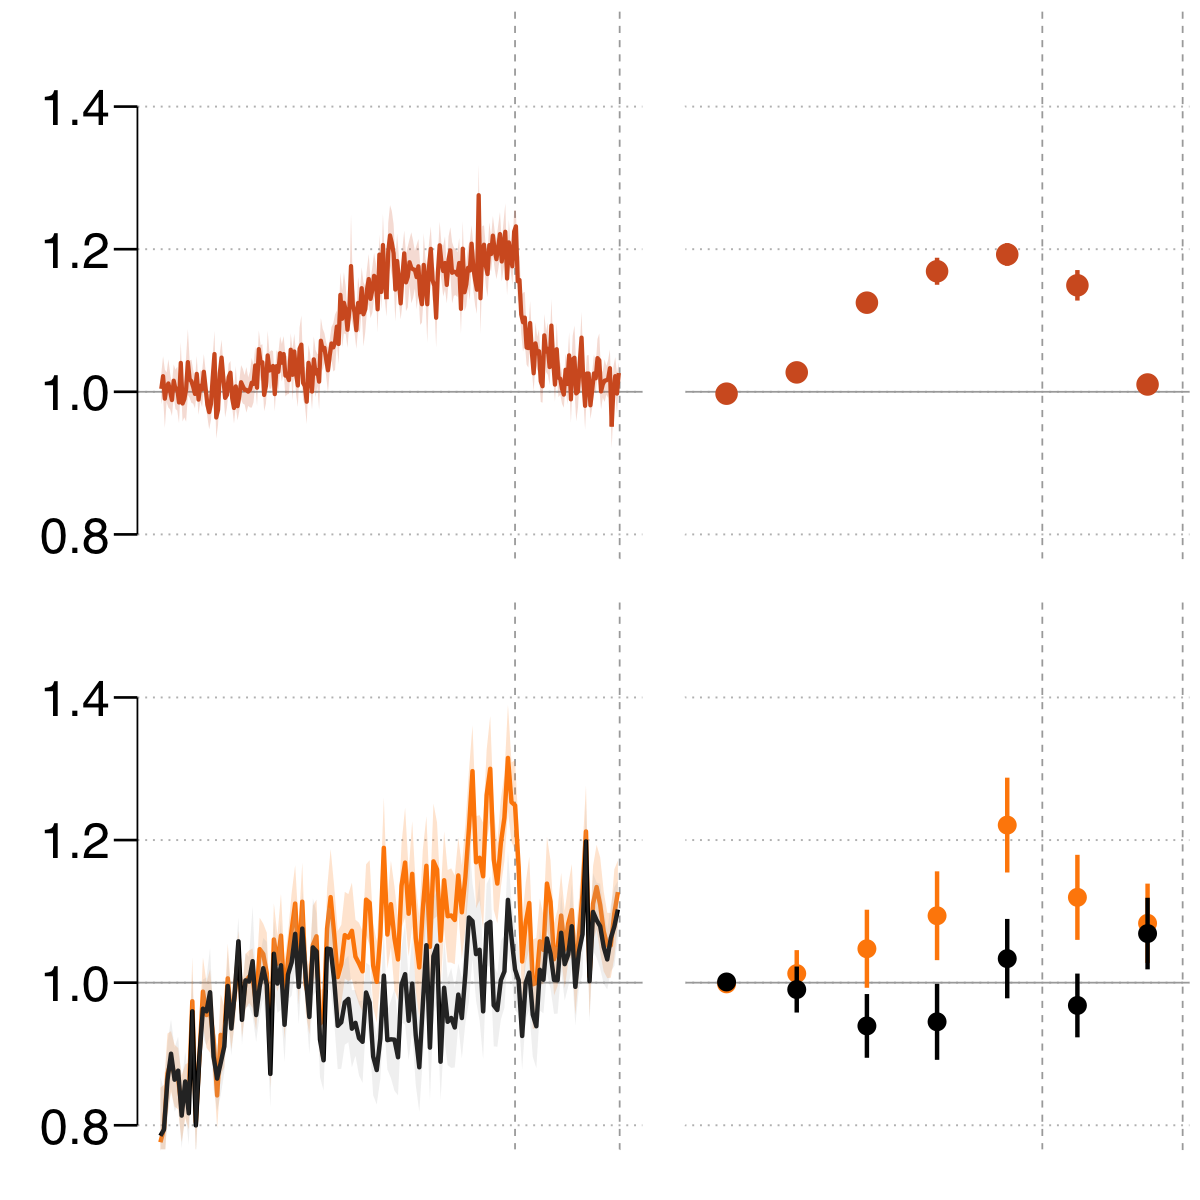

In [208]:
options(repr.plot.width=5, repr.plot.height=5)
bb = 1
#--------------------------------------------------------------------------

E1_RL_ratio = ggplot(aes(x = trial,y = EarlySlopeAdj_corr,col=tgtHtC,fill=tgtHtC,group=tgtHtC),
             data = dat3 %>% filter(grp=="adults" & expGrp=="bimanual" & tgtHtC=="narrow")) +
coord_capped_cart(ylim = c(0.8,1.5), xlim = c(1, 260), bottom = 'both', left = 'both') +
geom_vline(xintercept = c(201,260), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="line",fun.y = mean,
                 binwidth=1,lwd=1.2,alpha=1,show.legend = FALSE) +
stat_summary_bin(geom="ribbon",fun.data = mean_se,
                 binwidth=1,lwd=0,alpha=0.2,show.legend = FALSE) +

xlab("") + ylab("") +
scale_color_manual(values = c("#D35D27")) +
scale_fill_manual(values = c("#D35D27")) +

scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) + 
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
      axis.text.y = element_text(size = 30),
      axis.ticks.length.y=unit(0.5,units = "cm"),
      axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black")
     ) 

#--------------------------------------------------------------------------
E1_RL_scale_summ = ggplot(aes(x = cond3,y = EarlySlopeAdj_corr_mn,col=tgtHtC,fill=tgtHtC,
                          group=tgtHtC),
             data = summDat2 %>% filter(grp=="adults" & expGrp=="bimanual" & tgtHtC=="narrow")) +
coord_capped_cart(ylim = c(0.8,1.5), bottom = 'both', left = 'both') +
geom_vline(xintercept = c(5.5,7.5), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="pointrange",fun.data = mean_se,
                 binwidth=bb,lwd=1.25,alpha=1,size = 1.25, show.legend = FALSE) +

xlab("") + ylab("") +
scale_color_manual(values = c("#D35D27")) +
scale_fill_manual(values = c("#D35D27")) +
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "white"),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank() 
     ) 

#--------------------------------------------------------------------------
bb = 2
E1_hand_scale = ggplot(aes(x = trial,y = slopesR2_corr,col=tgtHtC,fill=tgtHtC,group=tgtHtC),
             data = dat3 %>% filter(grp=="adults" & expGrp=="bimanual" & tgtHtC=="narrow")) +
coord_capped_cart(ylim = c(0.8,1.5), xlim = c(1, 260), bottom = 'both', left = 'both') +
geom_vline(xintercept = c(201,260), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="line",fun.y = mean, col = "#FF8A04",
                 binwidth=bb,lwd=1.25,alpha=1,show.legend = FALSE) +
stat_summary_bin(geom="ribbon",fun.data = mean_se, fill = "#FF8A04",
                 binwidth=bb,lwd=0,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(aes(y = slopesL2_corr), geom="line",fun.y = mean, col = "black",
                 binwidth=bb,lwd=1.25,alpha=1,show.legend = FALSE) + 
stat_summary_bin(aes(y = slopesL2_corr), geom="ribbon",fun.data = mean_se, fill = "gray",
                 binwidth=bb,lwd=0,alpha=0.2,show.legend = FALSE) +

xlab("") + ylab("") +

scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) + 
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
      axis.text.y = element_text(size = 30),
      axis.ticks.length.y=unit(0.5,units = "cm"),
      axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black")
     ) 

#--------------------------------------------------------------------------

E1_hand_scale_summ = ggplot(aes(x = cond3,y = slopesR2_corr_mn,col=tgtHtC,fill=tgtHtC,group=tgtHtC),
             data = summDat2 %>% filter(grp=="adults" & expGrp=="bimanual" & tgtHtC=="narrow")) +
coord_capped_cart(ylim = c(0.8,1.5),bottom = 'both', left = 'both') +
geom_vline(xintercept = c(5.5,7.5), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="pointrange",fun.data = mean_se, col = "#FF8A04",
                 lwd=1.25,size = 1, alpha=1,show.legend = FALSE) +

stat_summary_bin(aes(y = slopesL2_corr_mn), geom="pointrange",fun.data = mean_se, col = "black",
                 lwd=1.25,size = 1, alpha=1,show.legend = FALSE) + 

xlab("") + ylab("") +

theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "white"),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank() 
     ) 

#--------------------------------------------------------------------------
#--------------------------------------------------------------------------

options(repr.plot.width=10, repr.plot.height=10)

Fig2_E1 = (E1_RL_ratio | E1_RL_scale_summ) / (E1_hand_scale | E1_hand_scale_summ)
Fig2_E1

ggsave(file="Fig2_final_v3.svg", bg = "transparent", plot=Fig2_E1, width=10, height=10)


## Figure 3

In [30]:
# dat3$tgtHtC = factor(dat3$tgtHtC,levels = c("wide","narrow"))
# dat3$expGrp <- factor(dat3$expGrp,levels = c("bimanual","unimanual"))

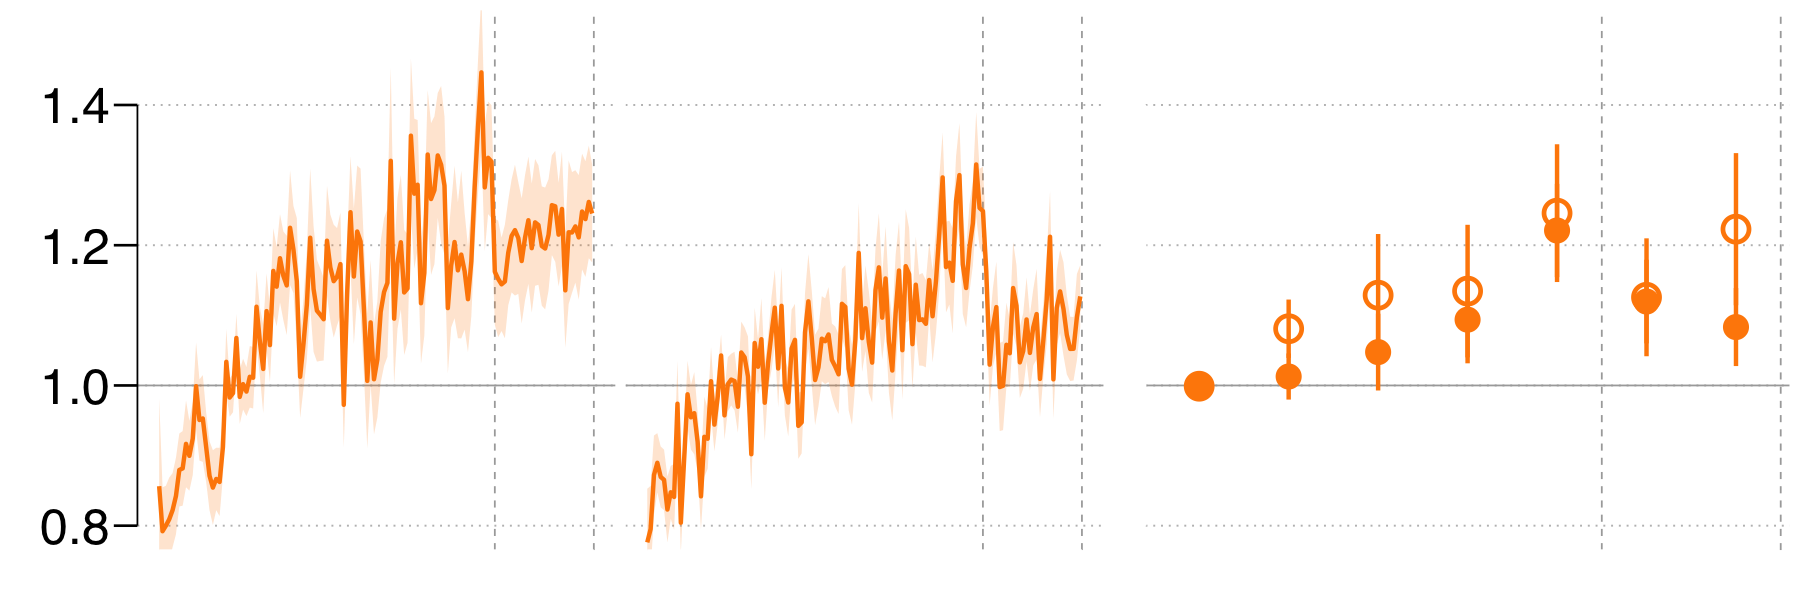

In [212]:
bb = 2

E2_hand_scale = ggplot(aes(x = trial,y = slopesR2_corr,col=tgtHtC,fill=tgtHtC,group=tgtHtC),
             data = dat3 %>% filter(grp=="adults" & tgtHtC=="narrow")) +
coord_capped_cart(ylim = c(0.8,1.5), xlim = c(1, 260), bottom = 'both', left = 'both') +
geom_vline(xintercept = c(201,260), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="line",fun.y = mean, col = "#FF8A04",
                 binwidth=bb,lwd=1.25,alpha=1,show.legend = FALSE) +
stat_summary_bin(geom="ribbon",fun.data = mean_se, fill = "#FF8A04",
                 binwidth=bb,lwd=0,alpha=0.2,show.legend = FALSE) +
facet_wrap(~expGrp) + 
xlab("") + ylab("") +

scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) + 
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
      strip.text.x = element_blank(),
      strip.background = element_blank(),
      axis.text.y = element_text(size = 30),
      axis.ticks.length.y=unit(0.5,units = "cm"),
      axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black")
     ) 


E2_hand_scale_summ = ggplot(aes(x = cond3,y = slopesR2_corr_mn,
                                shape = expGrp,group=expGrp),
             data = summDat2 %>% filter(grp=="adults" & tgtHtC=="narrow")) +
coord_capped_cart(ylim = c(0.8,1.5),bottom = 'both', left = 'both') +
geom_vline(xintercept = c(5.5,7.5), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="pointrange",fun.data = mean_se, col = "#FF8A04",
                 lwd=1.25,size = 1.5, stroke = 2, show.legend = FALSE) +
scale_shape_manual(values = c(16,1)) + 
xlab("") + ylab("") +

theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "white"),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank() 
     ) 

options(repr.plot.width=15, repr.plot.height=5)

Fig3_E2 = E2_hand_scale + E2_hand_scale_summ +  plot_layout(widths = c(9,6))
Fig3_E2
ggsave(file="Fig3_final_v3.svg", bg = "transparent", plot=Fig3_E2, width=15, height=5)


## Figure 4

In [213]:
bb = 1
options(repr.plot.width=5, repr.plot.height=5)
RL_ratio = ggplot(aes(x = trial,y = EarlySlopeAdj_corr,col=tgtHtC,fill=tgtHtC,group=tgtHtC),
             data = dat3 %>% filter(grp=="adults" & expGrp=="bimanual")) +
geom_vline(xintercept = c(201,260), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +
coord_capped_cart(ylim = c(0.8,1.5), xlim = c(1, 260), bottom = 'both', left = 'both') +
stat_summary_bin(geom="line",fun.y = mean,
                 binwidth=bb,lwd=1,alpha=1,show.legend = FALSE) +
stat_summary_bin(geom="ribbon",fun.data = mean_se,
                 binwidth=bb,lwd=0,alpha=0.2,show.legend = FALSE) +

xlab("") + ylab("") +
scale_color_manual(values = c("#D35D27","#1BC7B1")) +
scale_fill_manual(values = c("#D35D27","#1BC7B1")) +

scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) + 
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black")
     ) 

bb = 2
R_scale = ggplot(aes(x = trial,y = slopesR2_corr,col=tgtHtC,fill=tgtHtC,group=tgtHtC),
             data = dat3 %>% filter(grp=="adults" & expGrp=="bimanual")) +
coord_capped_cart(ylim = c(0.8,1.5), xlim = c(1, 260), bottom = 'both', left = 'both') +
geom_vline(xintercept = c(201,260), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="line",fun.y = mean,
                 binwidth=bb,lwd=1,alpha=1,show.legend = FALSE) +
stat_summary_bin(geom="ribbon",fun.data = mean_se,
                 binwidth=bb,lwd=0,alpha=0.2,show.legend = FALSE) +
xlab("") + ylab("") +
scale_color_manual(values = c("#FF8A04","#6CE1D1")) +
scale_fill_manual(values = c("#FF8A04","#6CE1D1")) +
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) + 
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     # axis.line.y = element_line(colour = "white"),
     #  axis.text.y = element_blank(),
     #  axis.ticks.y = element_blank() 
     ) 

L_scale = ggplot(aes(x = trial,y = slopesL2_corr,col=tgtHtC,fill=tgtHtC,group=tgtHtC),
             data = dat3 %>% filter(grp=="adults" & expGrp=="bimanual")) +
coord_capped_cart(ylim = c(0.8,1.5), xlim = c(1, 260), bottom = 'both', left = 'both') +
geom_vline(xintercept = c(201,260), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="line",fun.y = mean,
                 binwidth=bb,lwd=1,alpha=1,show.legend = FALSE) +
stat_summary_bin(geom="ribbon",fun.data = mean_se,
                 binwidth=bb,lwd=0,alpha=0.2,show.legend = FALSE) +

xlab("") + ylab("") +
scale_color_manual(values = c("black","darkgray")) +
scale_fill_manual(values = c("black","darkgray")) +

scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) + 
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     # axis.line.y = element_line(colour = "white"),
     #  axis.text.y = element_blank(),
     #  axis.ticks.y = element_blank() 
     ) 


In [218]:
summDat2$tgtHtC = factor(summDat2$tgtHtC,levels = c("narrow","wide"))

RL_scale_summ = ggplot(aes(x = cond3,y = EarlySlopeAdj_corr_mn,col=tgtHtC,fill=tgtHtC,
                          group=tgtHtC),
             data = summDat2 %>% filter(grp=="adults" & expGrp=="bimanual")) +
coord_capped_cart(ylim = c(0.8,1.5), bottom = 'both', left = 'both') +
geom_vline(xintercept = c(5.5,7.5), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="pointrange",fun.data = mean_se,
                lwd=1.25,alpha=1,size = 1, show.legend = FALSE) +

xlab("") + ylab("") +
scale_color_manual(values = c("#D35D27","#1BC7B1")) +
scale_fill_manual(values = c("#D35D27","#1BC7B1")) +
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "white"),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank() 
     ) 

R_scale_summ = ggplot(aes(x = cond3,y = slopesR2_corr_mn,col=tgtHtC,fill=tgtHtC,
                          group=tgtHtC),
             data = summDat2 %>% filter(grp=="adults" & expGrp=="bimanual")) +
coord_capped_cart(ylim = c(0.8,1.5),bottom = 'both', left = 'both') +
geom_vline(xintercept = c(5.5,7.5), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="pointrange",fun.data = mean_se,
                 lwd=1.25,alpha=1,size = 1,show.legend = FALSE) +

xlab("") + ylab("") +
scale_color_manual(values = c("#FF8A04","#6CE1D1")) +
scale_fill_manual(values = c("#FF8A04","#6CE1D1")) +
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "white"),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank() 
     ) 

L_scale_summ = ggplot(aes(x = cond3,y = slopesL2_corr_mn,col=tgtHtC,fill=tgtHtC,group=tgtHtC),
             data = summDat2 %>% filter(grp=="adults" & expGrp=="bimanual")) +
coord_capped_cart(ylim = c(0.8,1.5), bottom = 'both', left = 'both') +
geom_vline(xintercept = c(5.5,7.5), lty="dashed",col="darkgray") +
geom_hline(yintercept = 1, lty="solid",col="darkgray") +

stat_summary_bin(geom="pointrange",fun.data = mean_se,
                lwd=1.25,alpha=1,size = 1,show.legend = FALSE) +

xlab("") + ylab("") +
scale_color_manual(values = c("black","darkgray")) +
scale_fill_manual(values = c("black","darkgray")) +
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "white"),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank() 
     ) 



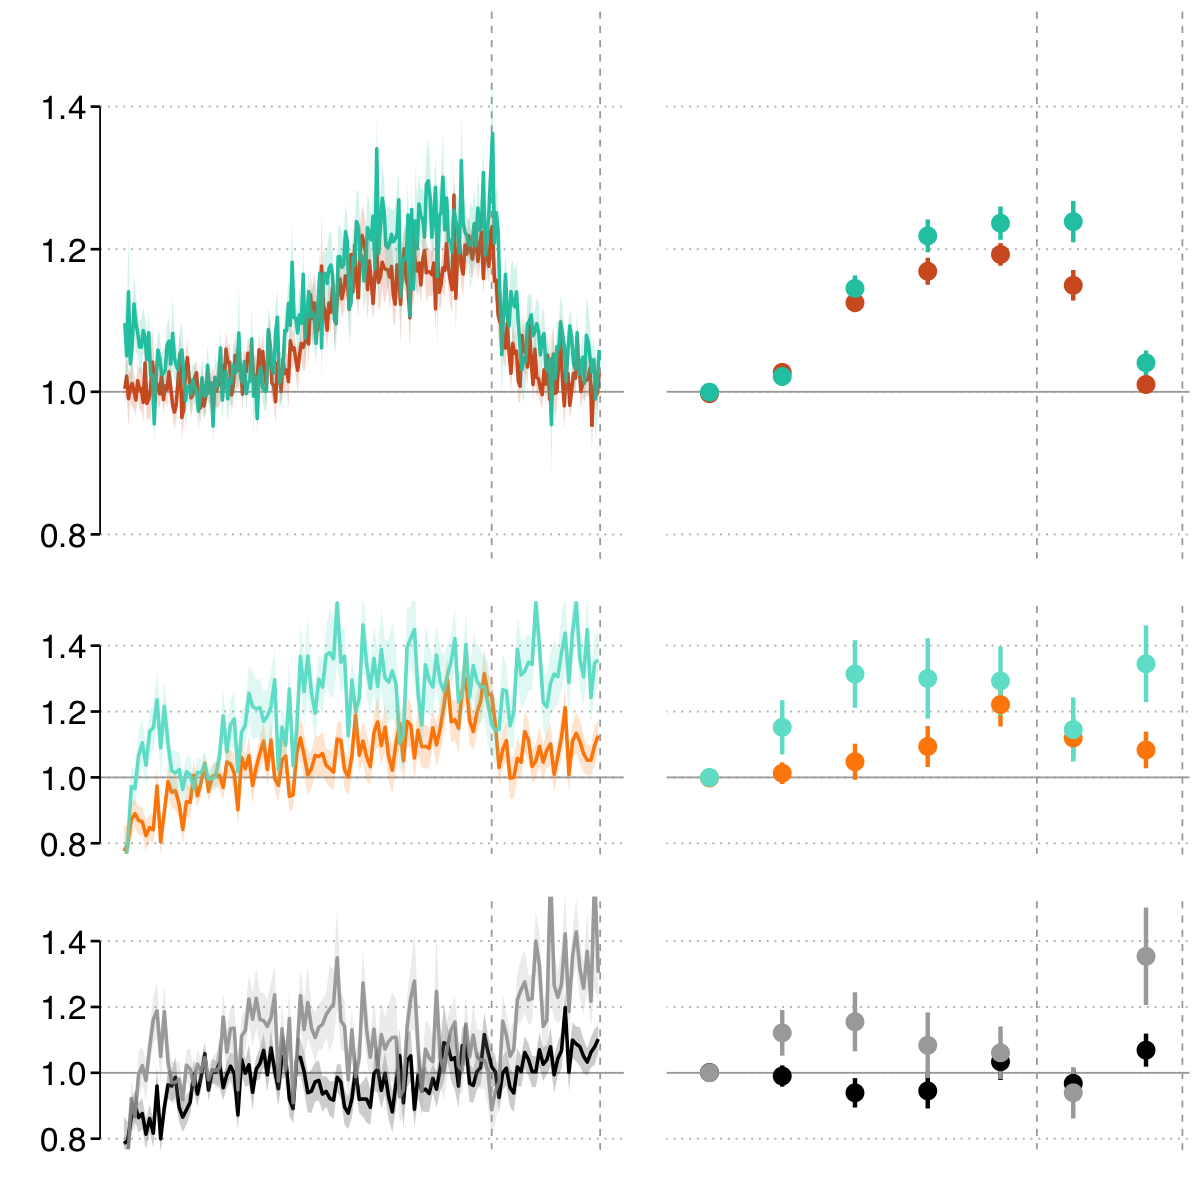

In [220]:
options(repr.plot.width=10, repr.plot.height=10)
Fig4 = (RL_ratio + RL_scale_summ + plot_layout(widths = c(5,5))) / 
        (R_scale / L_scale | R_scale_summ / L_scale_summ) #+ plot_layout(widths = c(8,3,3)) #+ plot_annotation(tag_levels = "A")

# ggsave(file="Fig4_final.svg", plot=Fig4, width=10, height=10)
Fig4

## Figure 5

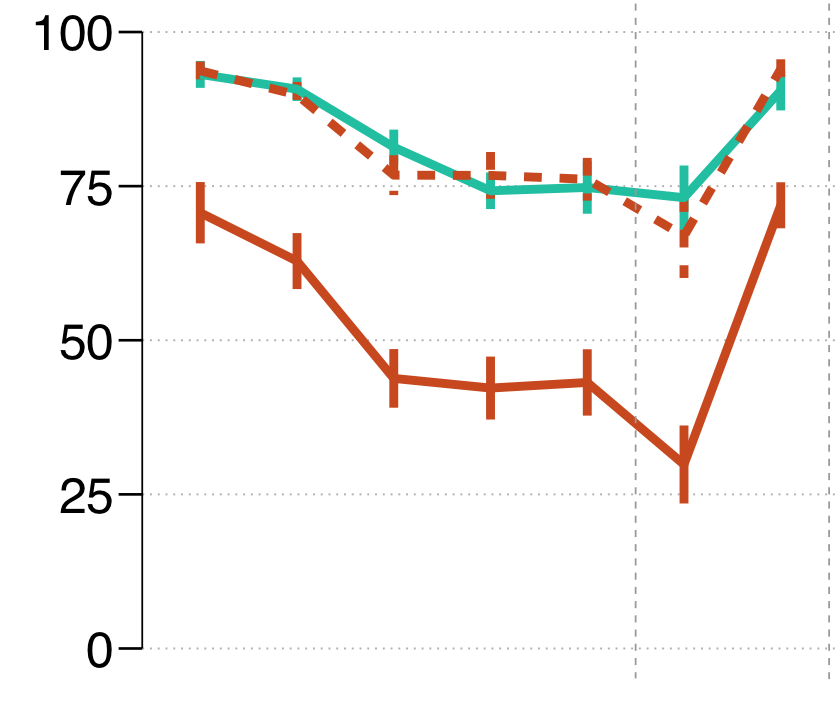

In [217]:
options(repr.plot.width=7, repr.plot.height=6)
combSucc = ggplot(data = summDat2 %>% filter(grp=="adults"), 
        aes(x =cond3,y= succRate_mn,group=OmniGrp, col = tgtHtC, lty = expGrp)) + 

coord_capped_cart(ylim = c(0,100),left = 'both',bottom = 'both') +  #for signed values

stat_summary(geom="errorbar", size = 0.75, width=0,lwd = 2.5, stroke = 2.5, fun.data=mean_se, show.legend = FALSE) + 
stat_summary(geom="line", fun.y=mean,alpha = 1, lwd = 2.5, show.legend=FALSE) + 
scale_color_manual(values = c("#1BC7B1","#D35D27")) +
# scale_linetype_manual(values = c("solid","dashed")) +

geom_vline(xintercept = c(5.5,7.5), lty="dashed",col="darkgray") +
# geom_vline(xintercept = c(1.5,5.5),lty="dashed") +
xlab("") + ylab("") +
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
      axis.text.y = element_text(size = 30),
      axis.ticks.length.y=unit(0.5,units = "cm"),
      axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black")
     ) 
ggsave(file="Fig5_final.svg", bg = "transparent", plot=combSucc, width=7, height=6)
combSucc

## Figure 6

In [36]:
options(repr.plot.width=6, repr.plot.height=5)

bex = "MUH249"
trH = 148
trM = 141 #160
 #E0367C - another pink
fct = 0.3
 
b01 = ggplot(aes(x = trial,y = Ry_raw, group=cond, shape=as.factor(reward)),
             data = dat3 %>% filter(grp=="adults" & subj==bex)) +
geom_line(aes(y = fct*gainF),col="black",size =2) +
geom_ribbon(aes(ymin = (fct*(gainF-(gainF*0.05*as.double(tgtHt)/3))),
                ymax = (fct*(gainF+(gainF*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
geom_point(size = 1.5, stroke=1.5, col ="#E51574", show.legend = FALSE ) +
# geom_point(aes(y = Ry_raw, shape=as.factor(reward)), alpha = 0.6,
#            col="#E51574", size=1.5, stroke=1.5, show.legend = FALSE) +
# geom_point(aes(x = trial[trial==trH],y = Ry_raw[trial==trH]), shape = 16, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
# geom_point(aes(x = trial[trial==trH],y = totDispR_raw[trial==trH]), shape = 16, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
# geom_point(aes(x = trial[trial==trM],y = Ry_raw[trial==trM]), shape = 1, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
# geom_point(aes(x = trial[trial==trM],y = totDispR_raw[trial==trM]), shape = 1, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
scale_shape_manual(values = c(1,16)) +
coord_capped_cart(ylim = c(0.2,0.55), xlim = c(1, 260), bottom = 'both', left = 'both') +
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
xlab("") + ylab("") + #ggtitle("bimanual-3 example") +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      # axis.text.y = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.4,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black"),
     # axis.ticks.y = element_blank()
     )

# b01
 
# ggsave(file="INDIV_F1P_temp4Left.svg", bg = "transparent", plot=F1P1, width=7.5, height=9)
 

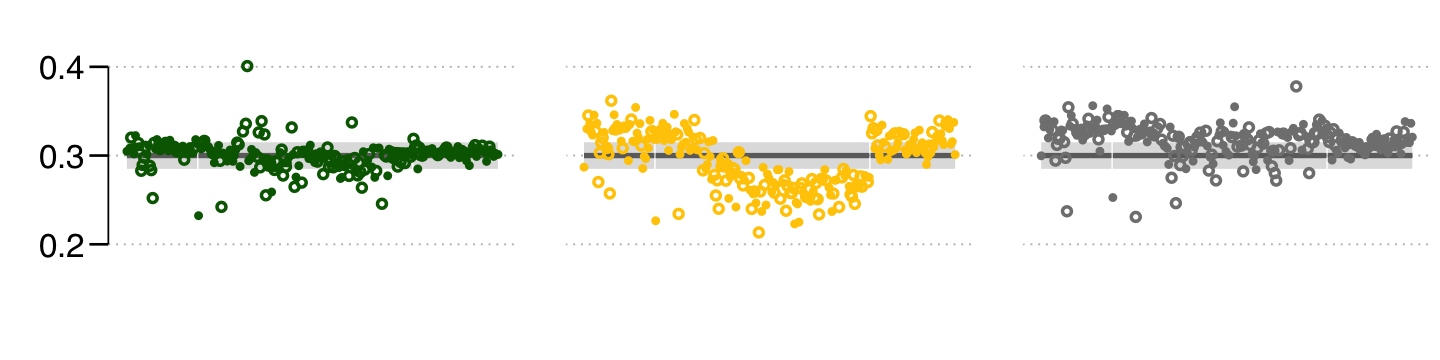

In [37]:
bex = "MUH249"
options(repr.plot.width=12, repr.plot.height=3)

b02 = ggplot(aes(x = trial,y = Py_raw , label = trial, group=cond, shape=as.factor(reward)),
             data = dat3 %>% filter(grp=="adults" & subj==bex)) +
geom_line(aes(y = fct),col="black",size =1.5) +
geom_ribbon(aes(ymin = ((0.3-(fct*0.05*as.double(tgtHt)/3))),
                ymax = ((0.3+(fct*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
geom_point(col="darkgreen", size=1.5, stroke=1.5, show.legend = FALSE) +
# geom_point(aes(x = trial[trial==trH],y = Py_raw[trial==trH] - fct), shape = 16, fill = NA,
#            col = 'red', size = 2, stroke = 2, show.legend=FALSE) +
# geom_point(aes(x = trial[trial==trM],y = Py_raw[trial==trM] - fct), shape = 1, fill = NA,
#            col = 'red', size = 2, stroke = 2, show.legend=FALSE) +
coord_capped_cart(ylim = c(0.15,0.45), xlim = c(1, 260), bottom = 'both',left="both") +
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
theme_clean() + thm +
scale_shape_manual(values = c(1,16)) +
xlab("") + ylab("") +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      # axis.text.y = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.4,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     # axis.ticks.y = element_blank(),
     axis.line.y = element_line(colour = "black")
     )

b04 = ggplot(aes(x = trial,y = Ly_raw, group=cond, shape=as.factor(reward)),
             data = dat3 %>% filter(grp=="adults" & subj==bex)) +
geom_line(aes(y = fct),col="black",size =1.5) +
geom_ribbon(aes(ymin = ((0.3-(fct*0.05*as.double(tgtHt)/3))),
                ymax = ((0.3+(fct*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
geom_point(size = 1.5, stroke=1.5, col ="#808080", show.legend = FALSE ) +
# geom_point(aes(x = trial[trial==trH],y = Ly_raw[trial==trH]), shape = 16, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
scale_shape_manual(values = c(1,16)) +
coord_capped_cart(ylim = c(0.15,0.45), xlim = c(1, 260), bottom = 'both', left = 'both') +
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
xlab("") + ylab("") + #ggtitle("bimanual-3 example") +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      axis.text.y = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.4,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "white"),
     axis.ticks.y = element_blank()
     )

b07 = ggplot(aes(x = trial,y = sRy_raw, group=cond, shape=as.factor(reward)),
             data = dat3 %>% filter(grp=="adults" & subj==bex)) +
geom_line(aes(y = fct),col="black",size =1.5) +
geom_ribbon(aes(ymin = ((0.3-(fct*0.05*as.double(tgtHt)/3))),
                ymax = ((0.3+(fct*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
geom_point(size = 1.5, stroke=1.5, col ="#FFCA00", show.legend = FALSE ) +
# geom_point(aes(x = trial[trial==trH],y = Ly_raw[trial==trH]), shape = 16, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
scale_shape_manual(values = c(1,16)) +
coord_capped_cart(ylim = c(0.15,0.45), xlim = c(1, 260), bottom = 'both', left = 'both') +
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
xlab("") + ylab("") + #ggtitle("bimanual-3 example") +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      axis.text.y = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.4,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "white"),
     axis.ticks.y = element_blank()
     )
b02 | b07 | b04

In [38]:
b06 = ggplot(aes(x = trial,y = totDispR_raw, group=cond, shape=as.factor(reward)),
             data = dat3 %>% filter(grp=="adults" & subj==bex)) +
geom_line(aes(y = fct*gainF),col="black",size =2) +
geom_ribbon(aes(ymin = (fct*(gainF-(gainF*0.05*as.double(tgtHt)/3))),
                ymax = (fct*(gainF+(gainF*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
geom_point(size = 1.5, stroke=1.5, col ="black", show.legend = FALSE ) +
# geom_point(aes(y = Ry_raw, shape=as.factor(reward)), alpha = 0.6,
#            col="#E51574", size=1.5, stroke=1.5, show.legend = FALSE) +
# geom_point(aes(x = trial[trial==trH],y = Ry_raw[trial==trH]), shape = 16, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
# geom_point(aes(x = trial[trial==trH],y = totDispR_raw[trial==trH]), shape = 16, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
# geom_point(aes(x = trial[trial==trM],y = Ry_raw[trial==trM]), shape = 1, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
# geom_point(aes(x = trial[trial==trM],y = totDispR_raw[trial==trM]), shape = 1, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
scale_shape_manual(values = c(1,16)) +
coord_capped_cart(ylim = c(0.2,0.55), xlim = c(1, 260), bottom = 'both', left = 'both') +
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
xlab("") + ylab("") + #ggtitle("bimanual-3 example") +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
     axis.ticks.length=unit(0.4,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "white"),
     axis.text.y = element_blank(),
     panel.border = element_blank(),
     axis.ticks.y = element_blank()
     )


In [ ]:
options(repr.plot.width=12, repr.plot.height=4)

b03 = ggplot(aes(x = trial,y =(Py_raw - sRy_raw), group=cond, shape=as.factor(reward)),
             data = dat3 %>% filter(grp=="adults" & subj==bex)) +
coord_capped_cart(ylim = c(-0.15,0.15), xlim = c(1, 260), bottom = 'both', left = 'both') +
geom_line(aes(y = 0),col="black",size =1, lty="dashed") +
geom_point(col="#639507", size=1.5, stroke=1.5, show.legend = FALSE) +
# geom_point(aes(x = trial[trial==trH],y = Py_raw[trial==trH] - sRy_raw[trial==trH]), shape = 16, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
# geom_point(aes(x = trial[trial==trM],y = Py_raw[trial==trM] - sRy_raw[trial==trM]), shape = 1, fill = NA,
#            col = 'red', size = 2, stroke = 1.5, show.legend=FALSE) +
# coord_capped_cart(ylim = c(-0.2,0.2), xlim = c(1, 260), bottom = 'both',left="both") +
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
theme_clean() + thm +
scale_shape_manual(values = c(1,16)) +
xlab("") + ylab("") +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      # axis.text.y = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.4,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     # axis.line.y = element_line(colour = "white"),
     # axis.ticks.y = element_blank()
     )
 

b03|b01|b06

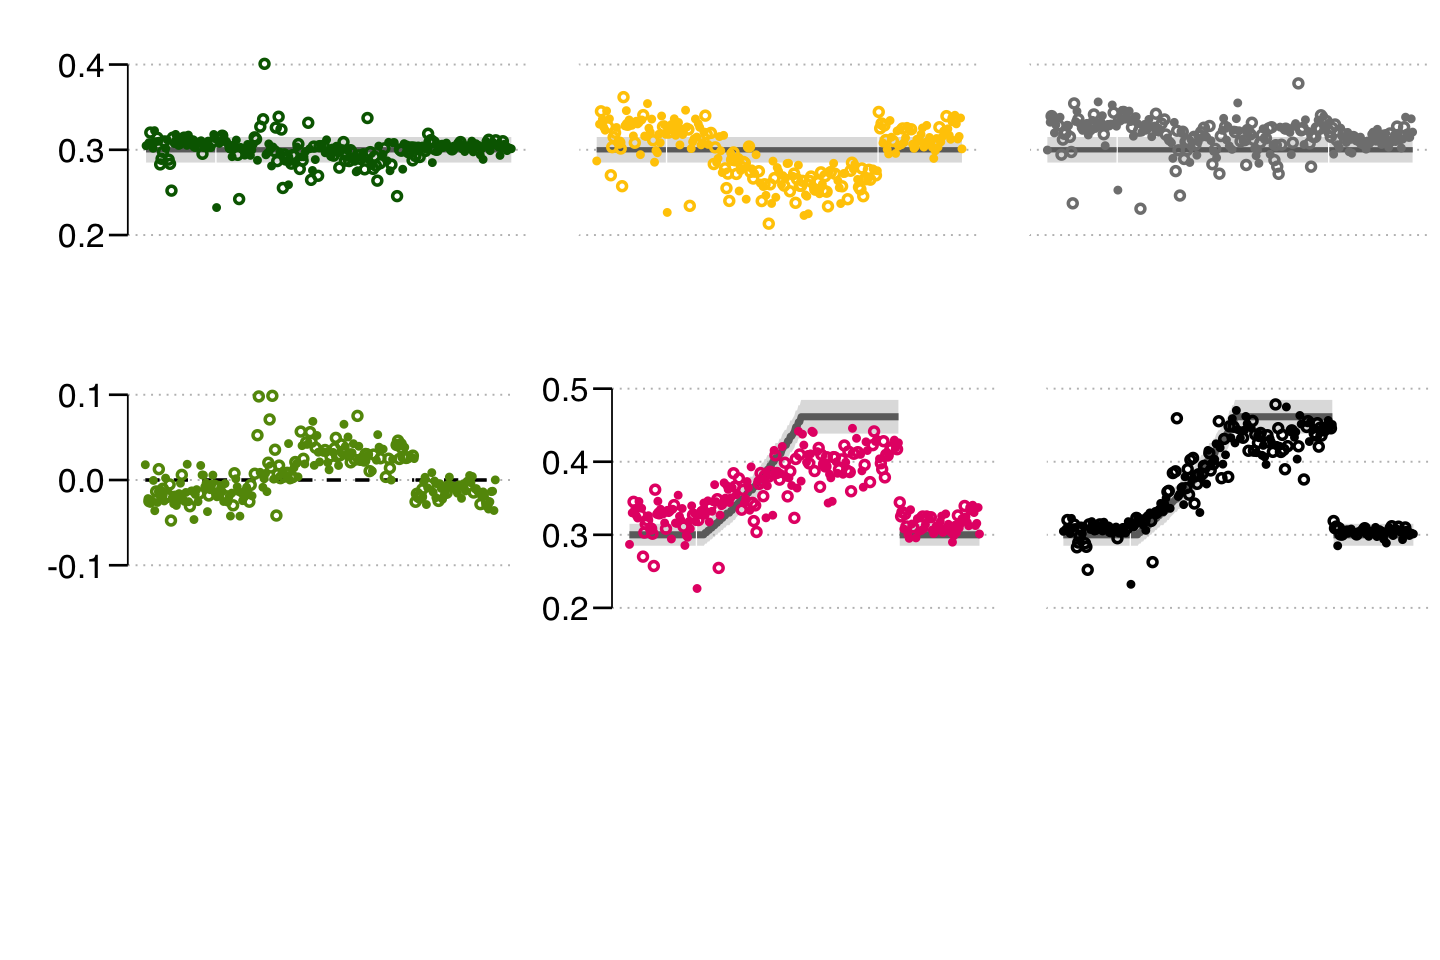

In [1083]:
options(repr.plot.width=12, repr.plot.height=8)

# Combine your panels into the two rows
q1 = (b02 + b07 + b04)
q2 = (b03 + b01 + b06)

# Apply the layout with specified heights for the second row (bottom)
Ind_BM = q1 / q2 + plot_layout(heights = c(3, 5)) + 
  plot_layout(heights = c(1, 1, 1))  # Adjust row height for b01, b03, and b06
Ind_BM
# ggsave(file="Fig.svg", bg = "transparent", plot=Ind_BM, width=12, height=10)


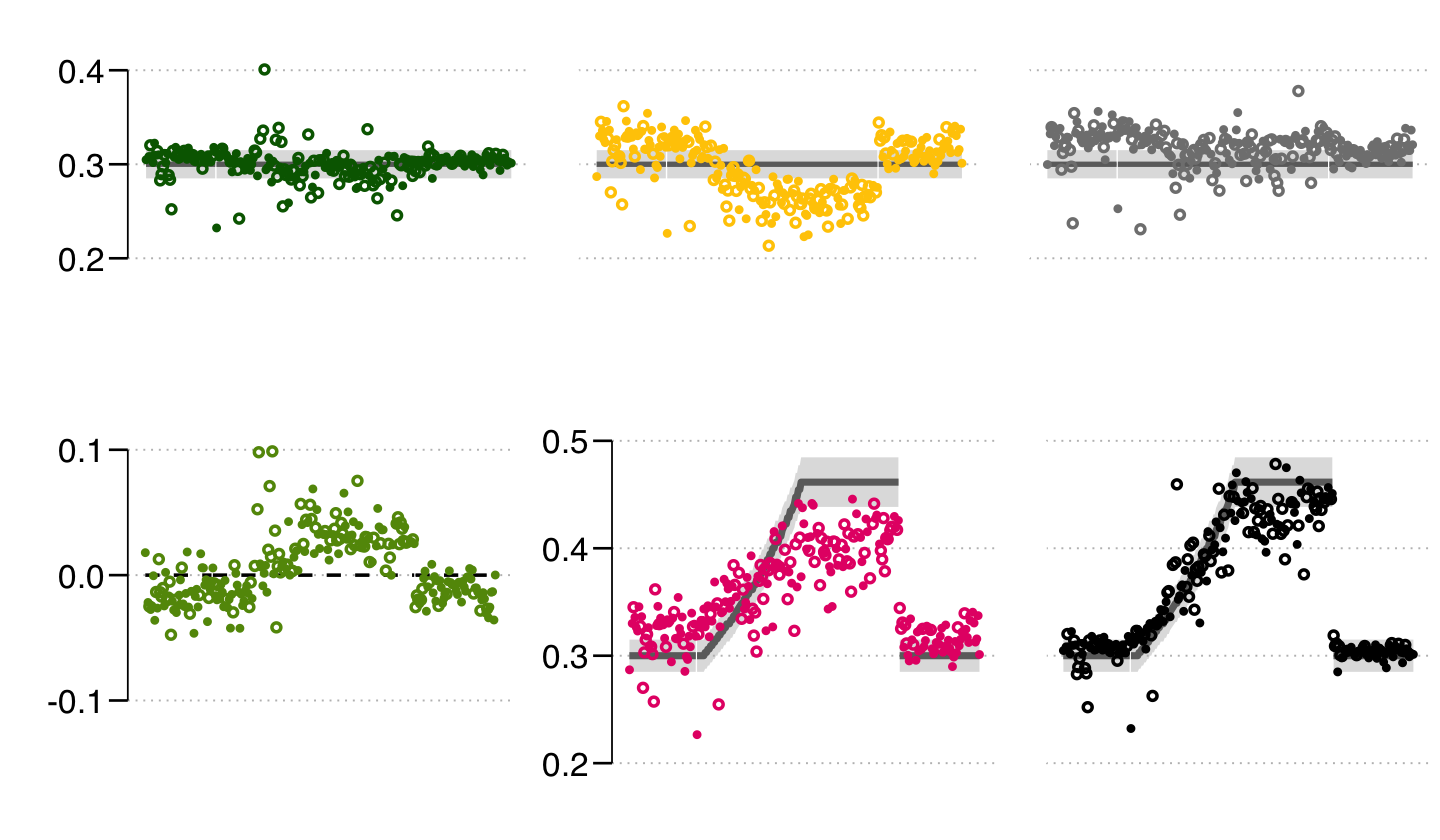

In [1084]:
options(repr.plot.width=12, repr.plot.height=7)
q1 = (b02 + b07 + b04)
q2 = (b03 + b01 + b06 )

q1/q2 + plot_layout(heights = c(3,4))


In [202]:
dat3$expGrp = factor(dat3$expGrp,levels = c("unimanual","bimanual"))

In [203]:
bb = 1
fct = 1
al = 0.8
 
ab01 = ggplot(aes(x = trial,y = Ry_corr, group=cond),
             data = dat3 %>% filter(grp=="adults")) +
coord_capped_cart(ylim = c(0.9,1.7), xlim = c(1, 260), bottom = 'both', left = 'both') +
 
geom_line(aes(y = fct*gainF),col="black",size =2) +
geom_ribbon(aes(ymin = (fct*(gainF-(gainF*0.05*as.double(tgtHt)/3))),
                ymax = (fct*(gainF+(gainF*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
stat_summary_bin(geom="ribbon", fill="#E51574",
                 fun.data = mean_se_,
                 binwidth=bb,lwd=NA,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(geom="line",fun.y = mean,col="#E51574",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +
stat_summary_bin(aes(y = totDispR_corr), geom="ribbon",
                 fun.data = mean_se_, col = "gray",
                 binwidth=bb,lwd=NA,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(aes(y = totDispR_corr),geom="line",fun.y = mean, col="black",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +
 
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
ylab("") +xlab("") +
facet_wrap(~tgtHtC*expGrp,ncol = 4) +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
      panel.border = element_blank(),
      panel.spacing = unit(2, "lines"),
     axis.ticks.length=unit(0.2,"cm"),
      legend.position="top",
     axis.line.y = element_line(colour = "black"),
      axis.text.x = element_text(angle = 45, vjust = 0.8, hjust=0.8),
     strip.background = element_blank(),
     strip.text.x = element_blank()
     )

ab02 = ggplot(aes(x = trial,y = (Py_corr), group=cond),
             data = dat3 %>% filter(grp=="adults")) +
# coord_capped_cart(ylim = c(-0.3,0.3), xlim = c(1, 260), bottom = 'both', left = 'both') +
# geom_line(aes(y = 0),col="black",size =1) +
# geom_ribbon(aes(ymin = ((0-(fct*0.05*as.double(tgtHt)/3))),
#                 ymax = ((0+(fct*0.05*as.double(tgtHt)/3)))),
#             col=NA,fill = "gray", alpha = .5) +

geom_line(aes(y = fct),col="black",size =1.5) +
geom_ribbon(aes(ymin = ((fct-(fct*0.05*as.double(tgtHt)/3))),
                ymax = ((fct+(fct*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
coord_capped_cart(ylim = c(0.7,1.3), xlim = c(1, 260), bottom = 'both', left = 'both') +

stat_summary_bin(geom="ribbon", fill="darkgreen",
                 fun.data = mean_se_,
                 binwidth=bb,lwd=NA,alpha=0.5,show.legend = FALSE) +
stat_summary_bin(geom="line",fun.y = mean,col="darkgreen",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
ylab("") +xlab("") +
facet_wrap(~tgtHtC*expGrp,ncol = 4) +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
      panel.spacing = unit(2, "lines"),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black"),
     strip.text.x = element_blank()
     )
 
ab03 = ggplot(aes(x = trial,y = (Py_corr - (sRy_corr)), group=cond),
             data = dat3 %>% filter(grp=="adults")) +
coord_capped_cart(ylim = c(-0.3,0.3), xlim = c(1, 260), bottom = 'both', left = 'both') +
 
stat_summary_bin(geom="ribbon", fill="#639507",
                 fun.data = mean_se_,
                 binwidth=bb,lwd=NA,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(geom="line",fun.y = mean,col="#639507",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +
geom_line(aes(y = 0),col="black",size =1, lty="dashed") +
 
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
ylab("") + xlab("") +
facet_wrap(~tgtHtC*expGrp,ncol = 4) +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
     axis.text.x = element_blank(),
      panel.border = element_blank(),
      panel.spacing = unit(2, "lines"),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
      axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black"),
     strip.background = element_blank(),
     strip.text.x = element_blank()
     )
 
ab04 = ggplot(aes(x = trial,y = Ly_corr, group=cond),
             data = dat3 %>% filter(grp=="adults" & expGrp=="bimanual")) +
coord_capped_cart(ylim = c(0.7,1.3), xlim = c(1, 260), bottom = 'both', left = 'both') +
 
geom_line(aes(y = 1),col="black",size =1) +
geom_ribbon(aes(ymin = ((1-(fct*0.05*as.double(tgtHt)/3))),
                ymax = ((1+(fct*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
stat_summary_bin(geom="ribbon", fill="#808080",
                 fun.data = mean_se,
                 binwidth=bb,lwd=NA,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(geom="line",fun.y = mean,col="#808080",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +
 
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
ylab("") +xlab("") +
facet_wrap(~tgtHtC*expGrp,ncol = 4) +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
      panel.spacing = unit(2, "lines"),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black"),
     strip.text.x = element_blank()
     )

ab05 = ggplot(aes(x = trial,y = sRy_corr, group=cond),
             data = dat3 %>% filter(grp=="adults")) +
coord_capped_cart(ylim = c(0.7,1.3), xlim = c(1, 260), bottom = 'both', left = 'both') +
geom_line(aes(y = 1),col="black",size =1) +
geom_ribbon(aes(ymin = ((1-(fct*0.05*as.double(tgtHt)/3))),
                ymax = ((1+(fct*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +

stat_summary_bin(geom="ribbon", fill="#FFCA00",
                 fun.data = mean_se_,
                 binwidth=bb,lwd=NA,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(geom="line",fun.y = mean,col="#FFCA00",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +
 
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
ylab("") +xlab("") +
facet_wrap(~tgtHtC*expGrp,ncol = 4) +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
      panel.spacing = unit(2, "lines"),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black"),
     strip.text.x = element_blank()
     )

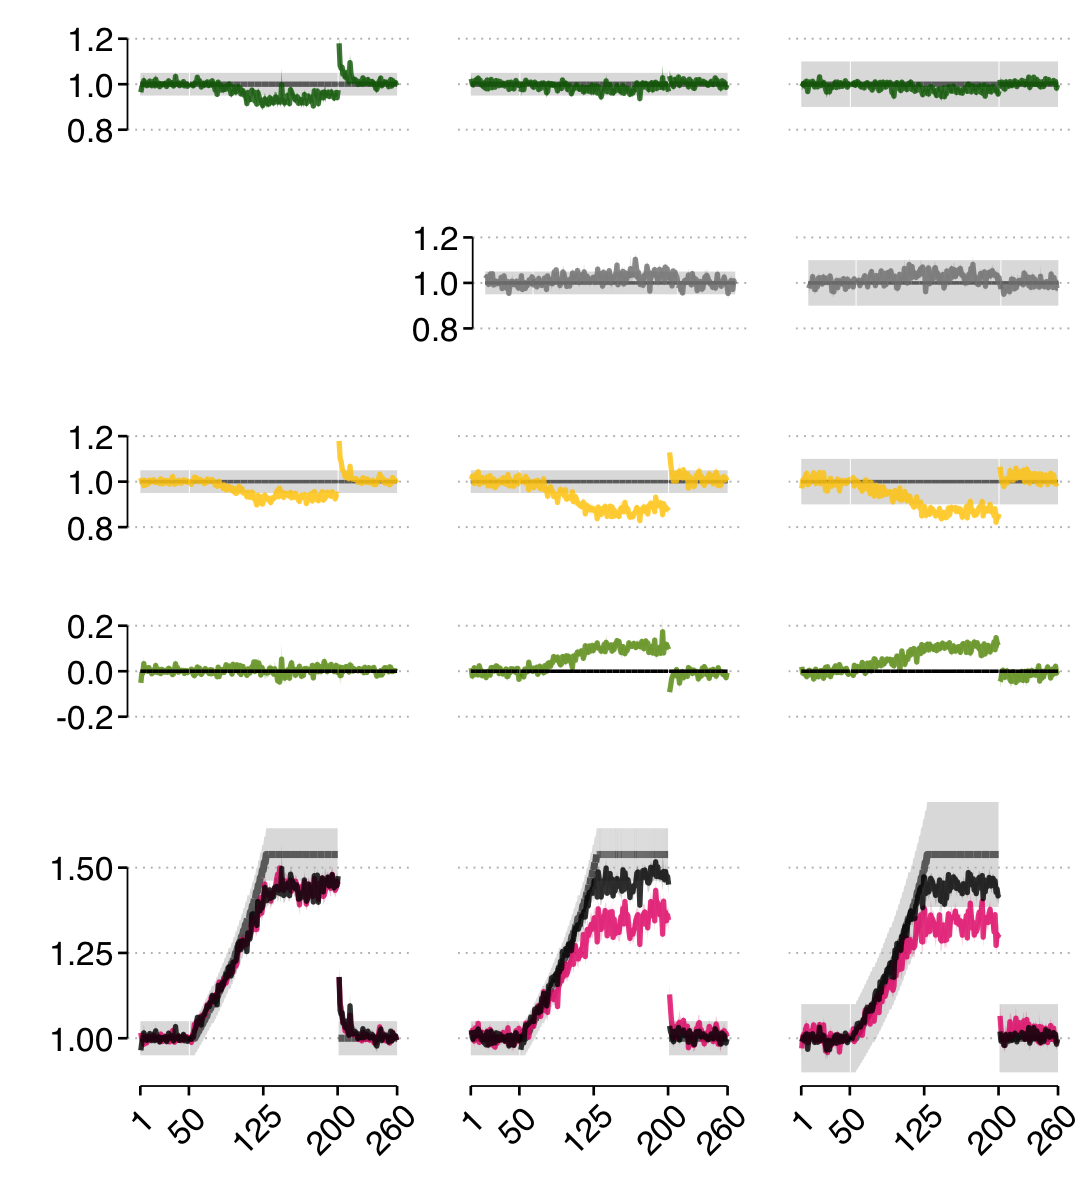

In [204]:
options(repr.plot.width=9, repr.plot.height=10)
F1P2 = (ab02 / (plot_spacer() + ab04 + plot_layout(widths = c(3.5,8.5))) /
        ab05 / ab03 / 
        ab01) + plot_layout(heights = c(2,2,2,2,4))
F1P2

In [205]:
ab02 = ggplot(aes(x = trial,y = (Py_corr), group=cond),
             data = dat3 %>% filter(grp=="adults")) +
# coord_capped_cart(ylim = c(-0.3,0.3), xlim = c(1, 260), bottom = 'both', left = 'both') +
# geom_line(aes(y = 0),col="black",size =1) +
# geom_ribbon(aes(ymin = ((0-(fct*0.05*as.double(tgtHt)/3))),
#                 ymax = ((0+(fct*0.05*as.double(tgtHt)/3)))),
#             col=NA,fill = "gray", alpha = .5) +

geom_line(aes(y = fct),col="black",size =1.5) +
geom_ribbon(aes(ymin = ((fct-(fct*0.05*as.double(tgtHt)/3))),
                ymax = ((fct+(fct*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
coord_capped_cart(ylim = c(0.7,1.3), xlim = c(1, 260), bottom = 'both', left = 'both') +

stat_summary_bin(geom="ribbon", fill="darkgreen",
                 fun.data = mean_se,
                 binwidth=bb,lwd=NA,alpha=0.5,show.legend = FALSE) +
stat_summary_bin(geom="line",fun.y = mean,col="darkgreen",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +
scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
ylab("") +xlab("") +
facet_wrap(~tgtHtC*expGrp,ncol = 4) +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
      panel.spacing = unit(2, "lines"),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black"),
     strip.text.x = element_blank()
     )

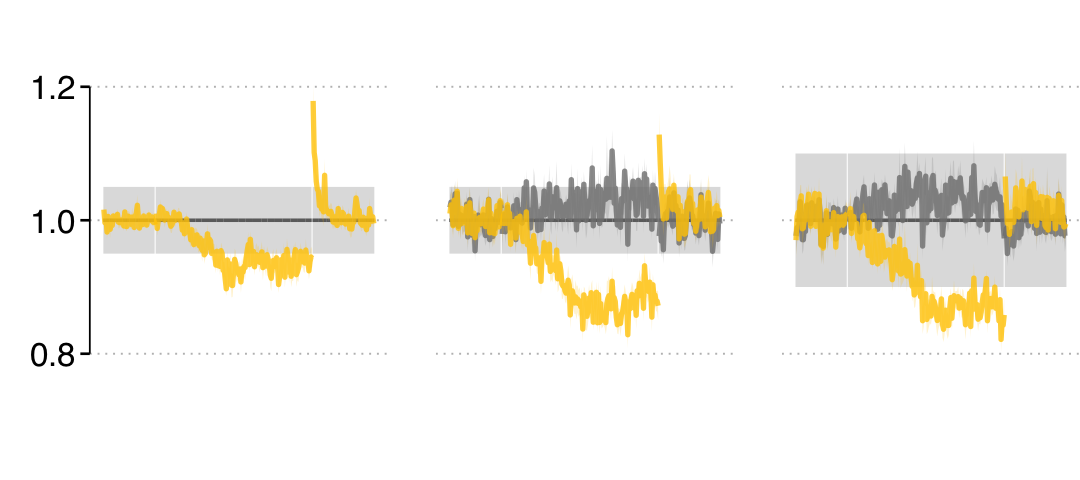

In [206]:
options(repr.plot.width=9, repr.plot.height=4)
ab04 = ggplot(aes(x = trial,y = Ly_corr, group=cond),
             data = dat3 %>% filter(grp=="adults")) +
coord_capped_cart(ylim = c(0.7,1.3), xlim = c(1, 260), bottom = 'both', left = 'both') +
 
geom_line(aes(y = 1),col="black",size =1) +
geom_ribbon(aes(ymin = ((1-(fct*0.05*as.double(tgtHt)/3))),
                ymax = ((1+(fct*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
stat_summary_bin(data = dat3 %>% filter(grp=="adults" & expGrp=="bimanual"),
                 geom="ribbon", fill="#808080",
                 fun.data = mean_se,
                 binwidth=bb,lwd=NA,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(data = dat3 %>% filter(grp=="adults" & expGrp=="bimanual"),
                 geom="line",fun.y = mean,col="#808080",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +

stat_summary_bin(data = dat3 %>% filter(grp=="adults"),
                 aes(y = sRy_corr), geom="ribbon", fill="#FFCA00",
                 fun.data = mean_se,
                 binwidth=bb,lwd=NA,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(data = dat3 %>% filter(grp=="adults"),
                 aes(y = sRy_corr), geom="line",fun.y = mean,col="#FFCA00",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +

scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
ylab("") +xlab("") +
facet_wrap(~tgtHtC*expGrp,ncol = 4) +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
      panel.spacing = unit(2, "lines"),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
     axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black"),
     strip.text.x = element_blank()
     )
ab04

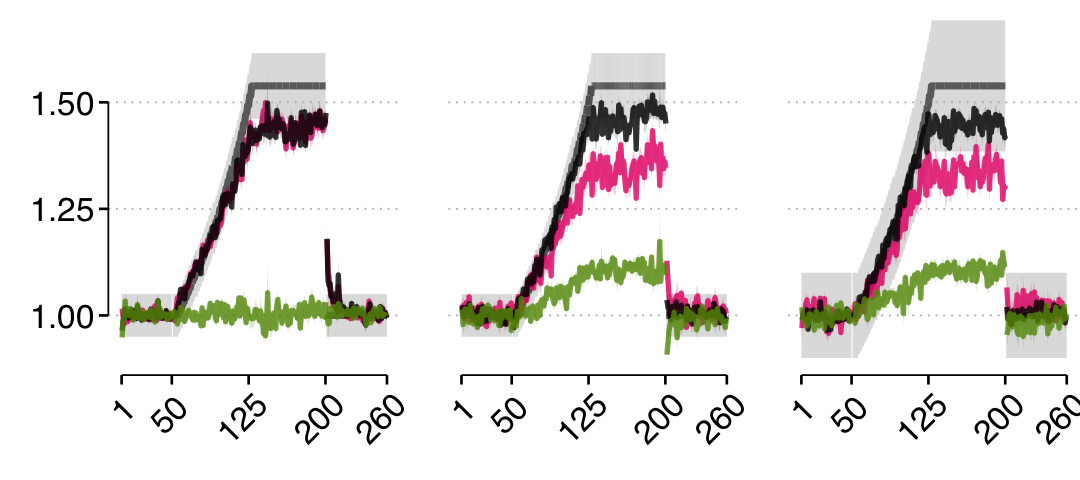

In [207]:
options(repr.plot.width=9, repr.plot.height=4)

ab01 = ggplot(aes(x = trial,y = Ry_corr, group=cond),
             data = dat3 %>% filter(grp=="adults")) +
coord_capped_cart(ylim = c(0.9,1.7), xlim = c(1, 260), bottom = 'both', left = 'both') +
 
geom_line(aes(y = fct*gainF),col="black",size =2) +
geom_ribbon(aes(ymin = (fct*(gainF-(gainF*0.05*as.double(tgtHt)/3))),
                ymax = (fct*(gainF+(gainF*0.05*as.double(tgtHt)/3)))),
            col=NA,fill = "gray", alpha = .5) +
stat_summary_bin(geom="ribbon", fill="#E51574",
                 fun.data = mean_se,
                 binwidth=bb,lwd=NA,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(geom="line",fun.y = mean,col="#E51574",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +
stat_summary_bin(aes(y = totDispR_corr), geom="ribbon",
                 fun.data = mean_se, col = "gray",
                 binwidth=bb,lwd=NA,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(aes(y = totDispR_corr),geom="line",fun.y = mean, col="black",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +
stat_summary_bin(aes(y = 1+ (Py_corr - (sRy_corr))), geom="ribbon", fill="#639507",
                 fun.data = mean_se,
                 binwidth=bb,lwd=NA,alpha=0.2,show.legend = FALSE) +
stat_summary_bin(aes(y = 1+ (Py_corr - (sRy_corr))), geom="line",fun.y = mean,col="#639507",
                 binwidth=bb,lwd=1.5,alpha=al,show.legend = TRUE) +

scale_x_continuous(breaks = c(1,50,125,200,260), labels = c("1","50","125","200", "260")) +
ylab("") +xlab("") +
facet_wrap(~tgtHtC*expGrp,ncol = 4) +
theme_clean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(plot.background = element_blank(),
      panel.border = element_blank(),
      panel.spacing = unit(2, "lines"),
     axis.ticks.length=unit(0.2,"cm"),
      legend.position="top",
     axis.line.y = element_line(colour = "black"),
      axis.text.x = element_text(angle = 45, vjust = 0.8, hjust=0.8),
     strip.background = element_blank(),
     strip.text.x = element_blank()
     )

ab01

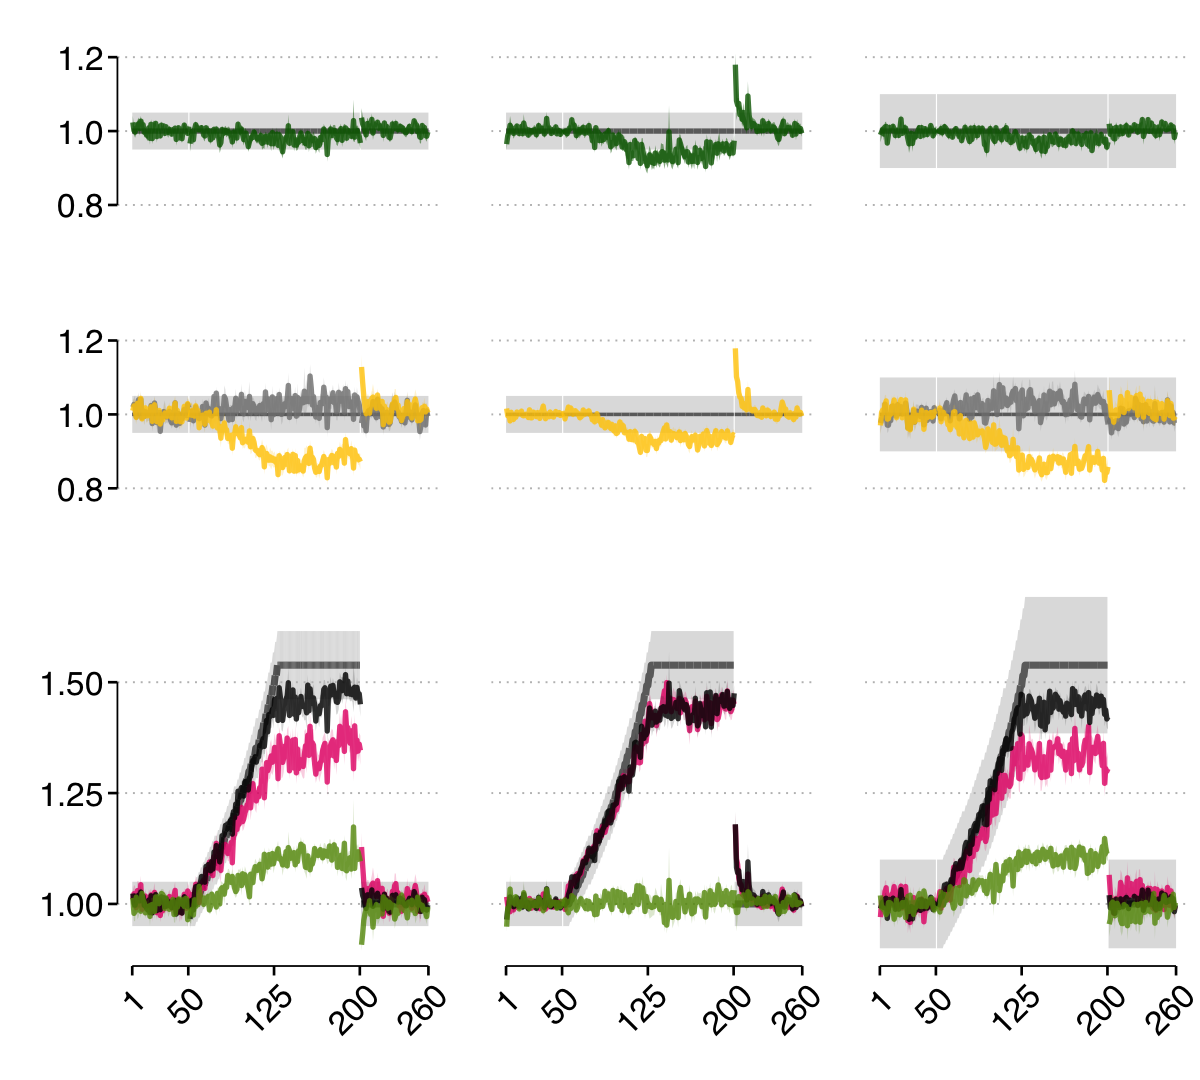

In [1698]:
options(repr.plot.width=10, repr.plot.height=9)

F1P2_v3 = 
(ab02/ab04/ab01) + plot_layout(heights = c(2.5,2.5,4))
F1P2_v3


In [223]:
summDat2$OmniGrp = factor(summDat2$OmniGrp,levels = c("uni-narrow","bi-narrow","bi-wide"))

In [195]:
summDat2$Ly_corr_mn[summDat2$OmniGrp=="uni-narrow"] = 0

In [196]:
cc = c("end.plateau","start.washout")

In [269]:
F1P3b = ggplot(data = summDat2 %>% filter(grp=="adults" & cond3%in%cc),
        aes(x =OmniGrp,y=Py_corr_mn,label=subj)) +
stat_summary(geom="pointrange", size = 0.9, lwd = 1.25, width = 0.3, fun.data=mean_ci, col="darkgreen",
                position = position_nudge(x = 0)) +
 # geom_point(aes(group=subj), size = 3, col="darkgreen", alpha = 0.8,
 #            position = position_dodge(width = 0.2)) +
xlab("") + ylab("") +
geom_hline(yintercept = 1,col = "black",lty = "dashed") + 
coord_capped_cart(ylim = c(0.7,1.3), bottom = 'both', left = 'both') +
# coord_capped_cart(ylim = c(-0.3,0.3), bottom = 'both', left = 'both') +
facet_wrap(~cond3,ncol = 3) +
theme_pubclean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.background = element_blank(),
      strip.text.x = element_blank(),
      panel.border = element_blank(),
            panel.spacing = unit(1, "lines"),
      axis.line.x = element_line(colour = NA),
     #      axis.line.y = element_line(colour = "white"),
     # axis.text.y = element_blank(),
     # axis.ticks.y = element_blank()
     )

F1P3f = ggplot(data = summDat2 %>% filter(grp=="adults" & cond3%in%cc),
        aes(x =OmniGrp,y=sRy_corr_mn,label=subj)) +
geom_hline(yintercept = 1,col = "black",lty = "dashed") + 
stat_summary(geom="pointrange",  size = 0.9, lwd = 1.25, fun.data=mean_ci, col="#FFCA00",
                position = position_nudge(x = 0)) +
 # geom_point(aes(group=subj), size = 3, col="darkgreen", alpha = 0.8,
 #            position = position_dodge(width = 0.2)) +
xlab("") + ylab("") +
coord_capped_cart(ylim = c(0.7,1.3), bottom = 'both', left = 'both') +
# coord_capped_cart(ylim = c(-0.3,0.3), bottom = 'both', left = 'both') +
facet_wrap(~cond3,ncol = 3) +
theme_pubclean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.background = element_blank(),
      strip.text.x = element_blank(),
      panel.border = element_blank(),
            panel.spacing = unit(1, "lines"),
      axis.line.x = element_line(colour = NA),
     #      axis.line.y = element_line(colour = "white"),
     # axis.text.y = element_blank(),
     # axis.ticks.y = element_blank()
     )

F1P3g = ggplot(data = summDat2 %>% filter(grp=="adults" & cond3%in%cc),
        aes(x =OmniGrp,y=Ly_corr_mn,label=subj)) +
geom_hline(yintercept = 1,col = "black",lty = "dashed") + 
stat_summary(geom="pointrange",  size = 0.9, lwd = 1.25, fun.data=mean_ci, col="#808080",
                position = position_nudge(x = 0)) +
 # geom_point(aes(group=subj), size = 3, col="darkgreen", alpha = 0.8,
 #            position = position_dodge(width = 0.2)) +
xlab("") + ylab("") +
coord_capped_cart(ylim = c(0.7,1.3), bottom = 'both', left = 'both') +
# coord_capped_cart(ylim = c(-0.3,0.3), bottom = 'both', left = 'both') +
facet_wrap(~cond3,ncol = 3) +
theme_pubclean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.background = element_blank(),
      strip.text.x = element_blank(),
      panel.border = element_blank(),
                  panel.spacing = unit(1, "lines"),
      axis.line.x = element_line(colour = NA),
     axis.line.y = element_line(colour = "white"),
     axis.text.y = element_blank(),
     axis.ticks.y = element_blank()
     )


F1P3a = ggplot(data = summDat2 %>% filter(grp=="adults" & cond3%in%cc),
        aes(x = OmniGrp, y = Ry_corr_mn, label = subj)) +
geom_hline(yintercept = 1,col = "black",lty = "dashed") + 
stat_summary(geom = "pointrange",  size = 0.9, lwd = 1.25, fun.data = mean_ci, col = "#E0367C",
                position = position_nudge(x = 0)) +
 # geom_point(aes(group=subj), size = 3, col="#E0367C", alpha = 0.8,
 #            position = position_dodge(width = 0.2)) +
 
  xlab("") + ylab("") +
  coord_capped_cart(ylim = c(0.9, 1.7), bottom = 'both', left = 'both') +
  facet_wrap(~cond3, ncol = 3) +
  theme_pubclean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(strip.background = element_blank(),
      strip.text.x = element_blank(),
      panel.border = element_blank(),
                  panel.spacing = unit(1, "lines"),
          axis.line.y = element_line(colour = "white"),
     axis.text.y = element_blank(),
     axis.ticks.y = element_blank()
     ) +
theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=0.8))

F1P3c = ggplot(data = summDat2 %>% filter(grp=="adults" & cond3%in%cc),
        aes(x =OmniGrp,y=1+(Py_corr_mn - sRy_corr_mn),label=subj)) +
geom_hline(yintercept = 1,col = "black",lty = "dashed") + 
stat_summary(geom="pointrange", size = 0.9, lwd = 1.25, fun.data=mean_ci, col="#639507",
                position = position_nudge(x = 0)) +
 # geom_point(aes(group=subj), size = 3, col="#639507", alpha = 0.8,
 #            position = position_dodge(width = 0.2)) +
xlab("") + ylab("") +
coord_capped_cart(ylim = c(0.9, 1.7), bottom = 'both', left = 'both') +
facet_wrap(~cond3,ncol = 3) +
theme_pubclean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(strip.background = element_blank(),
      strip.text.x = element_blank(),
      panel.border = element_blank(), 
                  panel.spacing = unit(1, "lines"),
      axis.line.y = element_line(colour = "white"),
     axis.text.y = element_blank(),
     axis.ticks.y = element_blank()
     ) +
theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=0.8))

F1P3d = ggplot(data = summDat2 %>% filter(grp=="adults" & cond3%in%cc),
        aes(x =OmniGrp,y=totDispR_corr_mn,label=subj)) +
geom_hline(yintercept = 1,col = "black",lty = "dashed") + 
stat_summary(geom="pointrange",  size = 0.9, lwd = 1.25, fun.data=mean_ci, col="black",
                position = position_nudge(x = 0)) +
 # geom_point(aes(group=subj), size = 3, col="black", alpha = 0.8,
 #            position = position_dodge(width = 0.2)) +
xlab("") + ylab("") +
coord_capped_cart(ylim = c(0.9, 1.7), bottom = 'both', left = 'both') +
facet_wrap(~cond3,ncol = 3) +
theme_pubclean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(strip.background = element_blank(),
      strip.text.x = element_blank(),
      panel.border = element_blank(),
                  panel.spacing = unit(1, "lines"),
     #  axis.line.y = element_line(colour = "white"),
     # axis.text.y = element_blank(),
     # axis.ticks.y = element_blank()
     ) +
theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=0.8))


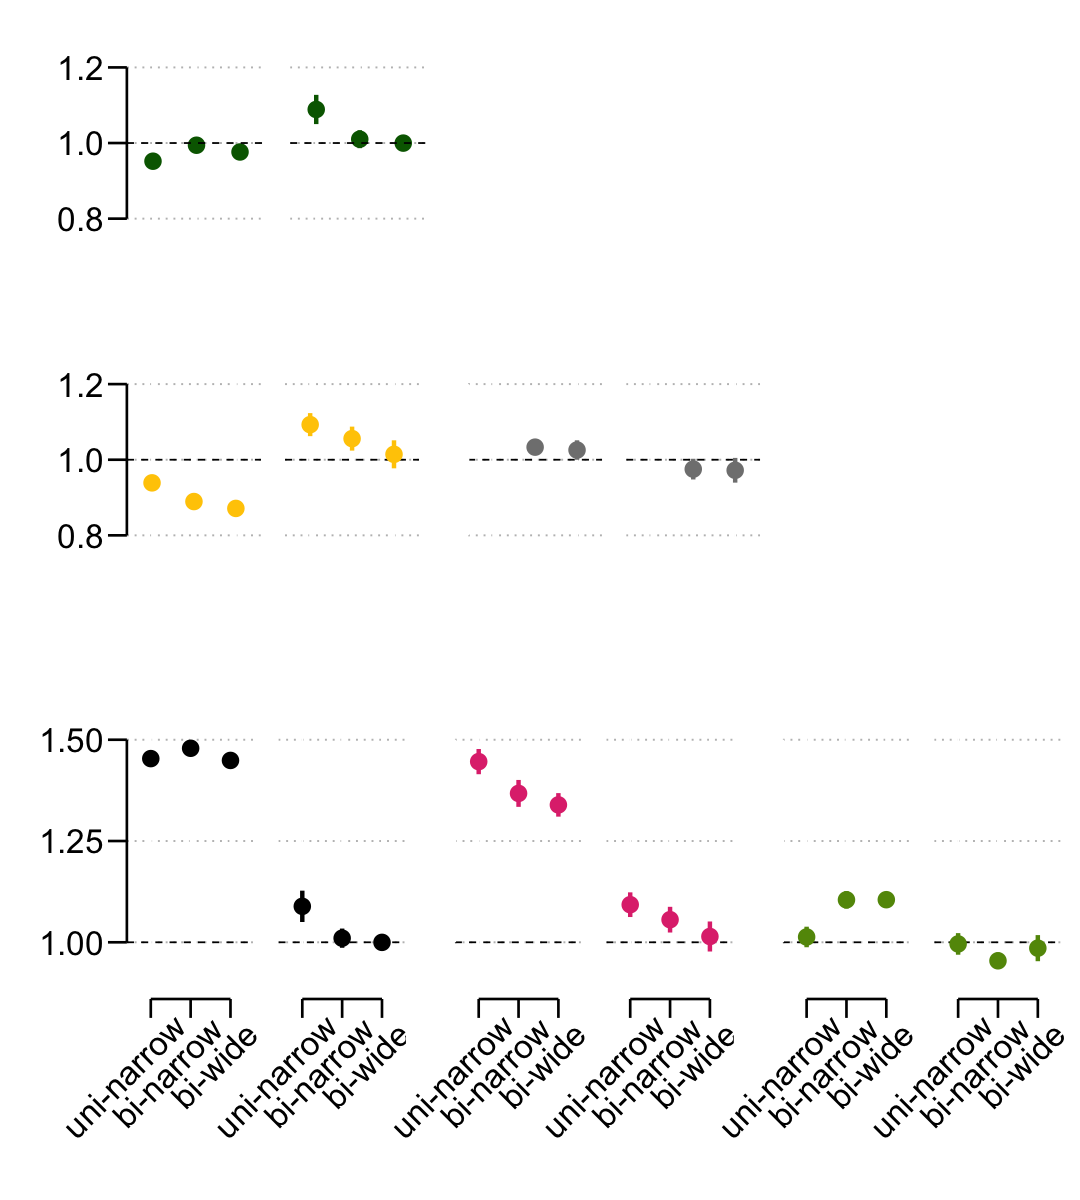

In [271]:
options(repr.plot.width=9, repr.plot.height=10)

F1P3_v3 = 
(F1P3b + plot_spacer() + plot_spacer() + plot_layout(widths = c(3,3,3))) /
(F1P3f + F1P3g + plot_spacer() + plot_layout(widths = c(3,3,3))) /
(F1P3d + F1P3a + F1P3c + plot_layout(widths = c(3,3,3))) + 
plot_layout(heights = c(3.5,3.5,5))

F1P3_v3
# ggsave(file="Grp_avg.svg", bg = "transparent", plot=F1P3_v3, width=9, height=10)

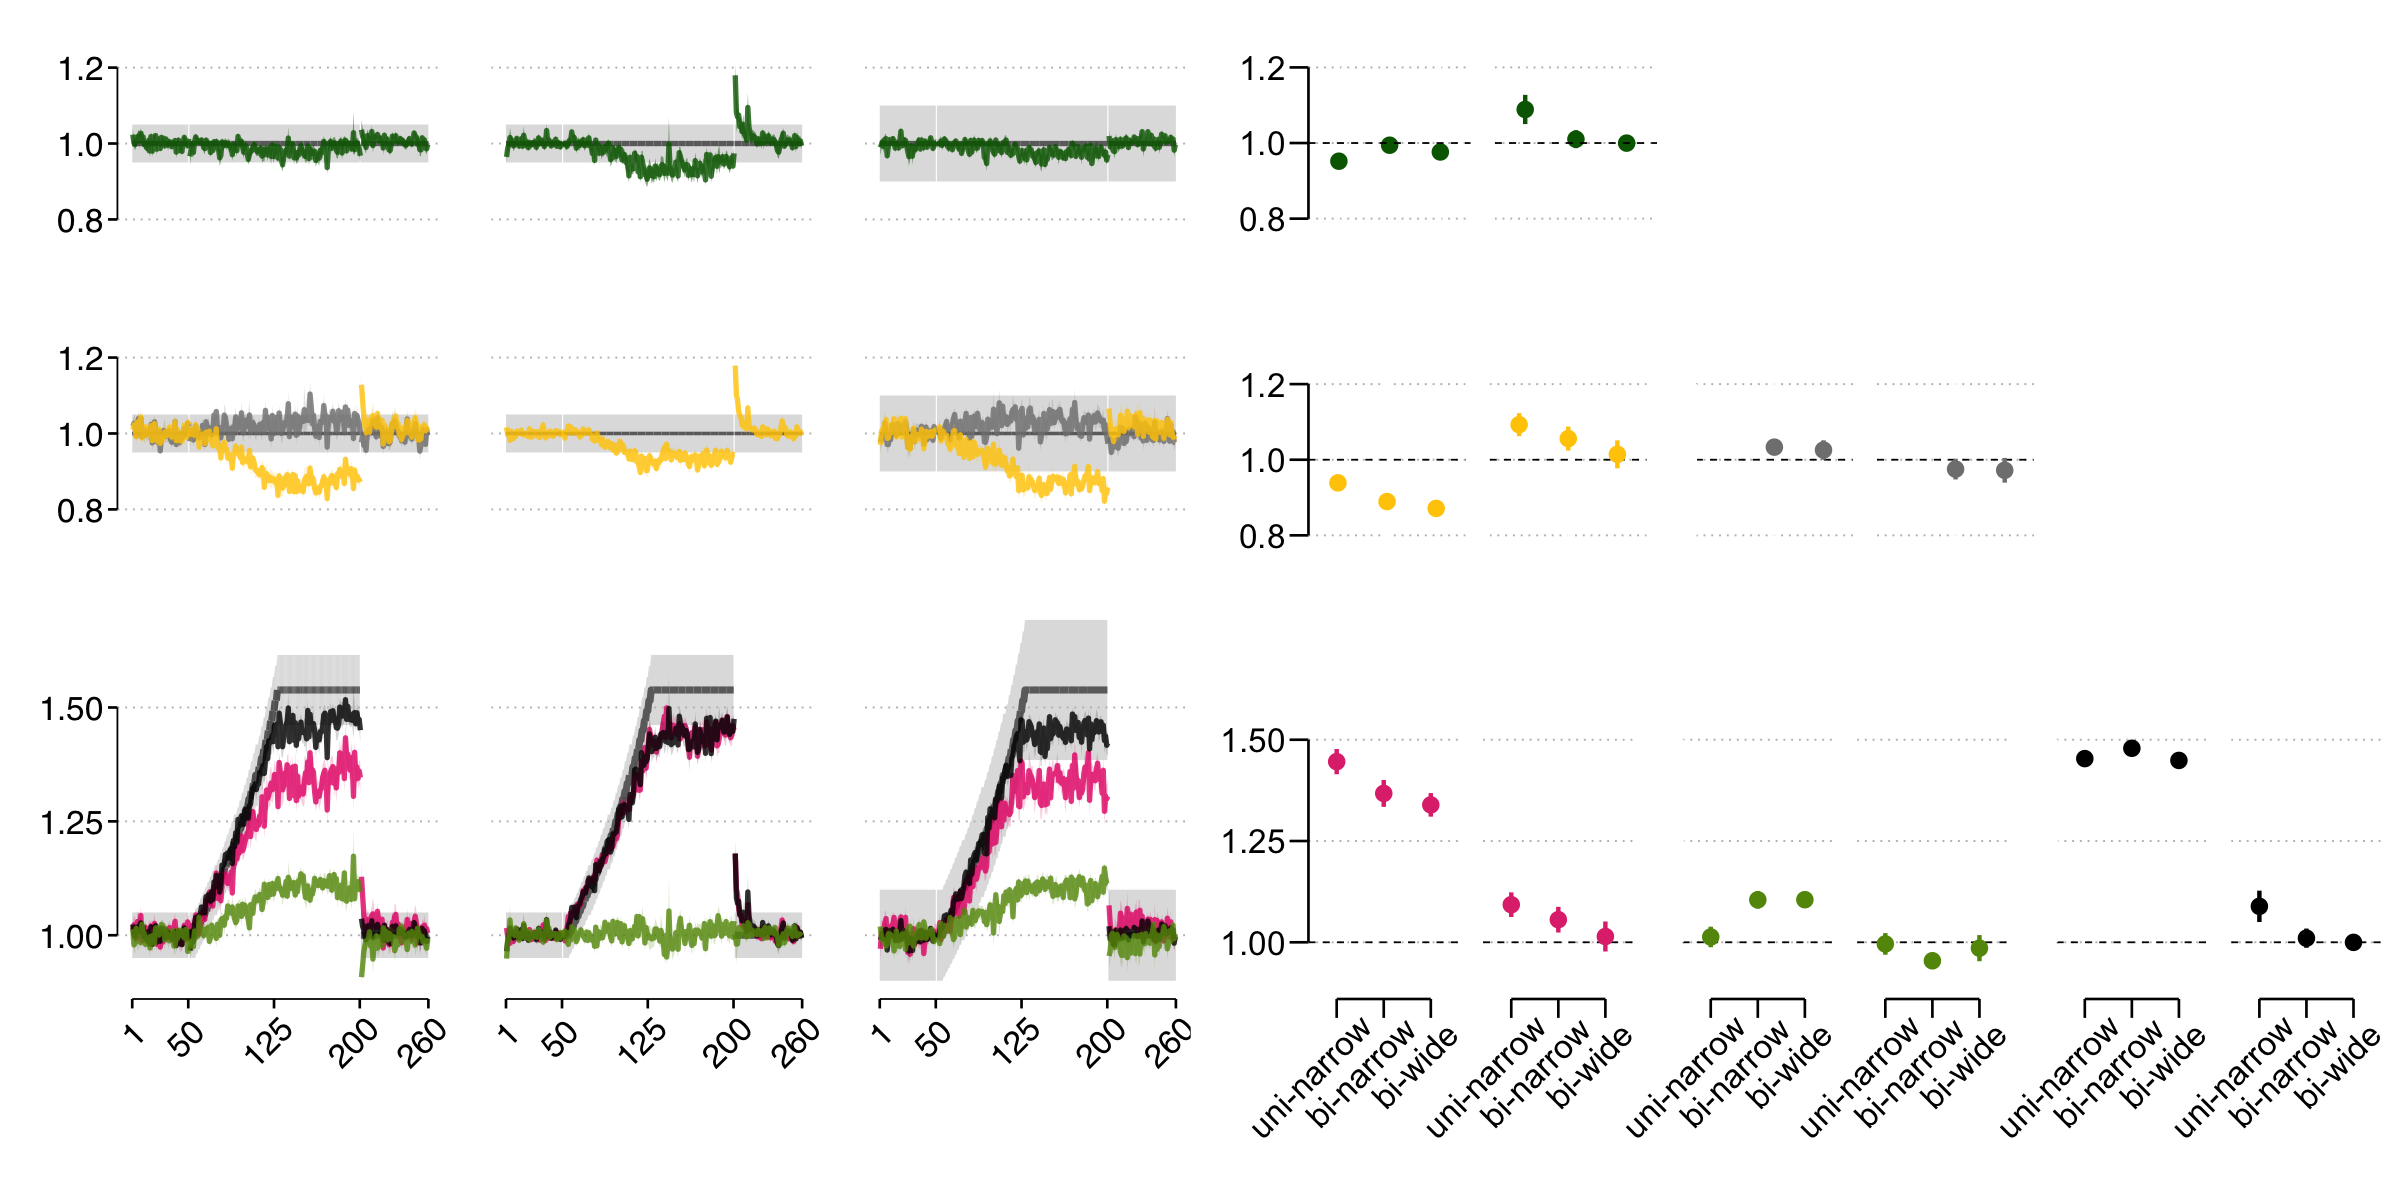

In [1700]:
options(repr.plot.width=20, repr.plot.height=10)

F3_v3 = F1P2_v3  | F1P3_v3 + plot_layout(widths = c(11,9))
F3_v3
# ggsave(file="GRP_F3_v3.svg", bg = "transparent", plot=F3_v3, width=20, height=10)

In [1688]:
summDat2$OmniGrp = factor(summDat2$OmniGrp,levels = c("uni-narrow","bi-narrow","bi-wide"))

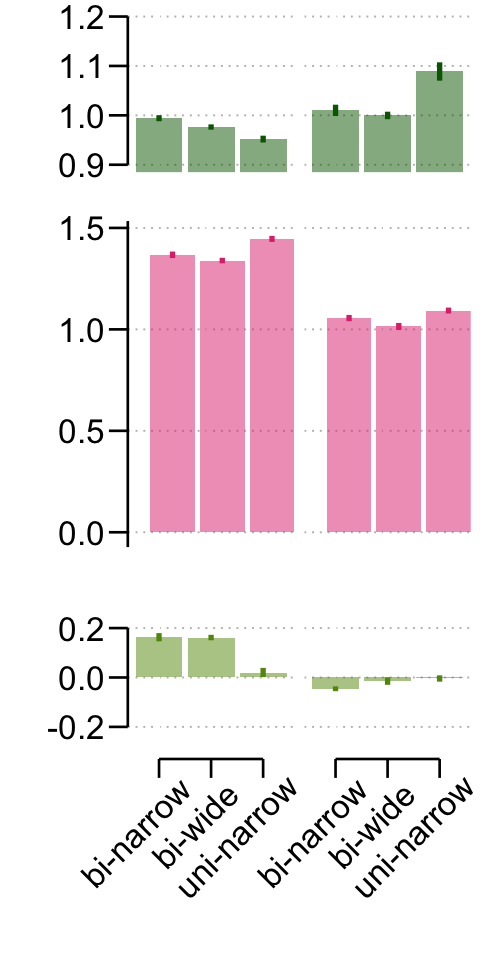

In [1364]:
# cmp = list(c("unimanual","bimanual")) #, c("bimanual.3","bimanual.6"))
cc = c("end.plateau","start.washout") #"start.ramp","end.ramp",
F1P3a = ggplot(data = summDat2 %>% filter(grp=="adults" & cond3%in%cc),
        aes(x = OmniGrp, y = Ry_corr_mn, label = subj)) +
# stat_summary(geom = "pointrange",fun.data = mean_ci,col = "#E0367C") + 
# stat_summary(aes(y = totDispR_corr_mn), geom = "pointrange",fun.data = mean_ci) + 

  stat_summary(geom = "bar", fun.y = mean, fill = "#E0367C", alpha = 0.5,
               position = position_nudge(x = 0.3)) +
  stat_summary(geom = "errorbar", width = 0, lwd = 1.5, fun.data = mean_se, col = "#E0367C",
               position = position_nudge(x = 0.3)) +
  # stat_summary(aes(y = totDispR_corr_mn), geom = "bar", fun.y = mean, fill = "black",
  #              alpha = 0.5, width = 0.4) +
  # stat_summary(aes(y = totDispR_corr_mn), geom = "errorbar", width = 0, lwd = 1.5,
  #              fun.data = mean_ci, col = "black", position = position_nudge(x = -0.1)) +

 # geom_point(aes(group=subj), size = 3, col="#E0367C", alpha = 0.8,
 #            position = position_dodge(width = 0.2)) +
  # Adding geom_point with position_dodge and nudge
  # geom_point(aes(y = Ry_corr_mn, group = subj), size = 3, col = "#E0367C", alpha = 0.8,
  #            position = position_dodge(width = 0.2)) +
  # geom_point(aes(y = totDispR_corr_mn, group = subj), size = 3, col = "black", alpha = 0.8,
  #            position = position_dodge(width = 0.2)) +  # Adjusted dodge width
 
  xlab("") + ylab("") +
  # coord_capped_cart(ylim = c(1, 1.7), bottom = 'both', left = 'both') +
  facet_wrap(~cond3, ncol = 3) +
  theme_pubclean() + thm +
  theme(plot.margin = unit(c(0, 0, 0, 0), "inches")) +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        strip.background = element_blank(),
        strip.text.x = element_blank(),
        panel.border = element_blank(),
        axis.line.x = element_line(colour = NA))
 
F1P3b = ggplot(data = summDat2 %>% filter(grp=="adults" & cond3%in%cc),
        aes(x =OmniGrp,y=Py_corr_mn,label=subj)) +
stat_summary(geom="bar", fun.y=mean, fill="darkgreen",alpha = 0.5) +
stat_summary(geom="errorbar", width = 0, lwd = 1.5, fun.data=mean_se, col="darkgreen",
                position = position_nudge(x = 0)) +
 # geom_point(aes(group=subj), size = 3, col="darkgreen", alpha = 0.8,
 #            position = position_dodge(width = 0.2)) +
xlab("") + ylab("") +
  coord_capped_cart(ylim = c(0.9, 1.2), bottom = 'both', left = 'both') +
# coord_capped_cart(ylim = c(-0.3,0.3), bottom = 'both', left = 'both') +
facet_wrap(~cond3,ncol = 3) +
theme_pubclean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.background = element_blank(),
      strip.text.x = element_blank(),
      panel.border = element_blank(),
      axis.line.x = element_line(colour = NA))
 
F1P3c = ggplot(data = summDat2 %>% filter(grp=="adults" & cond3%in%cc),
        aes(x =OmniGrp,y=(Py_corr_mn - sRy_corr_mn)/gain_mn,label=subj)) +
stat_summary(geom="bar", fun.y=mean, fill="#639507",alpha = 0.5) +
stat_summary(geom="errorbar", width = 0, lwd = 1.5, fun.data=mean_se, col="#639507",
                position = position_nudge(x = 0)) +
 # geom_point(aes(group=subj), size = 3, col="#639507", alpha = 0.8,
 #            position = position_dodge(width = 0.2)) +
xlab("") + ylab("") +
coord_capped_cart(ylim = c(-0.3,0.3), bottom = 'both', left = 'both') +
facet_wrap(~cond3,ncol = 3) +
theme_pubclean() + thm +
theme(plot.margin = unit(c(0, 0, 0, 0),"inches")) +
theme(strip.background = element_blank(),
      strip.text.x = element_blank(),
      panel.border = element_blank()) +
theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=0.8))
 
options(repr.plot.width=4, repr.plot.height=8)
F1P3 = (F1P3b / F1P3a / F1P3c) + plot_layout(heights = c(2,4,2))
F1P3
 
# ggsave(file="GRP_F1P3_temp4Tot.svg", bg = "transparent", plot=F1P3, width=4, height=8)

In [1012]:
rrr = c("MUH000","MUH171","MUH185")
summDat2 %>% filter(grp == "adults") %>% filter(cond3=="end.plateau") %>% #group_by(tgtHtC, expGrp) %>% 
  mutate(mn_time = mean(latenciesR2_raw_mn)
         se_time = parameters::standard_error(latenciesR2_raw_mn))

grp    expGrp    subj   cond3       tgtHtC totTr succRate   gain_mn gain_std
1  adults bimanual  MUH000 end.plateau narrow 25    100.000000 0.65     0      
2  adults bimanual  MUH171 end.plateau narrow 22     36.363636 0.65     0      
3  adults bimanual  MUH185 end.plateau narrow 23     17.391304 0.65     0      
4  adults bimanual  MUH188 end.plateau narrow 22      0.000000 0.65     0      
5  adults bimanual  MUH189 end.plateau narrow 25     60.000000 0.65     0      
6  adults bimanual  MUH215 end.plateau narrow 23     39.130435 0.65     0      
7  adults bimanual  MUH220 end.plateau wide   24     66.666667 0.65     0      
8  adults bimanual  MUH226 end.plateau wide   24     79.166667 0.65     0      
9  adults bimanual  MUH227 end.plateau wide   21     66.666667 0.65     0      
10 adults bimanual  MUH245 end.plateau narrow 23      8.695652 0.65     0      
11 adults bimanual  MUH248 end.plateau narrow 24     37.500000 0.65     0      
12 adults bimanual  MUH249 end.plateau narrow 21     42.857143 0.65     0      
13 adults bimanual  MUH251 end.plateau narrow 21     19.047619 0.65     0      
14 adults bimanual  MUH252 end.plateau narrow 23     43.478261   NA    NA      
15 adults bimanual  MUH253 end.plateau narrow 19     26.315789 0.65     0      
16 adults bimanual  MUH258 end.plateau narrow 23     21.739130 0.65     0      
17 adults bimanual  MUH259 end.plateau wide   25     68.000000 0.65     0      
18 adults bimanual  MUH260 end.plateau wide   24     83.333333 0.65     0      
19 adults bimanual  MUH267 end.plateau narrow 25     84.000000 0.65     0      
20 adults bimanual  MUH268 end.plateau narrow 22     72.727273 0.65     0      
21 adults bimanual  MUH269 end.plateau narrow 23     60.869565 0.65     0      
22 adults bimanual  MUH271 end.plateau narrow 25     40.000000 0.65     0      
23 adults bimanual  MUH272 end.plateau narrow 22     59.090909 0.65     0      
24 adults bimanual  MUH273 end.plateau narrow 23     26.086957 0.65     0      
25 adults bimanual  MUH274 end.plateau narrow 24     70.833333 0.65     0      
26 adults bimanual  MUH275 end.plateau narrow 24     25.000000 0.65     0      
27 adults bimanual  MUH276 end.plateau narrow 24     58.333333 0.65     0      
28 adults bimanual  MUH278 end.plateau wide   23     69.565217 0.65     0      
29 adults bimanual  MUH279 end.plateau wide   25    100.000000 0.65     0      
30 adults bimanual  MUH280 end.plateau wide   24     25.000000 0.65     0      
31 adults bimanual  MUH281 end.plateau wide   24     87.500000 0.65     0      
32 adults bimanual  MUH293 end.plateau wide   24     83.333333 0.65     0      
33 adults bimanual  MUH294 end.plateau wide   20     80.000000 0.65     0      
34 adults bimanual  MUH295 end.plateau wide   24     62.500000 0.65     0      
35 adults bimanual  MUH296 end.plateau wide   23     86.956522 0.65     0      
36 adults bimanual  MUH301 end.plateau wide   24     70.833333 0.65     0      
37 adults bimanual  MUH302 end.plateau wide   25     92.000000 0.65     0      
38 adults bimanual  MUH346 end.plateau wide   24     70.833333 0.65     0      
39 adults unimanual MUH00U end.plateau narrow 25     80.000000 0.65     0      
40 adults unimanual MUH535 end.plateau narrow 22     77.272727 0.65     0      
41 adults unimanual MUH536 end.plateau narrow 17     41.176471 0.65     0      
42 adults unimanual MUH537 end.plateau narrow 22     63.636364 0.65     0      
43 adults unimanual MUH584 end.plateau narrow 17     70.588235 0.65     0      
44 adults unimanual MUH598 end.plateau narrow 20     60.000000 0.65     0      
45 adults unimanual MUH616 end.plateau narrow 22     95.454545 0.65     0      
46 adults unimanual MUH617 end.plateau narrow 21     66.666667 0.65     0      
47 adults unimanual MUH631 end.plateau narrow 18     66.666667 0.65     0      
48 adults unimanual MUH643 end.plateau narrow 21     66.666667 0.65     0      
49 adults unimanual MUH644 end.plateau narrow 23     78.260870 0.65     0      
50 

# Statistics

## diagnostics function

In [18]:
# Function to perform LMER diagnostics using base R
lmer_diagnostics <- function(model,data, threshold = 0.1) {
  
  # Ensure the model is of class 'lmerMod'
  if (!inherits(model, "lmerMod")) {
    stop("The input must be an lmer object.")
  }
  
  # Extract residuals and fitted values
  residuals <- resid(model)
  fitted_values <- fitted(model)
  
  # Extract Subject ID and Trial number (or other relevant variables)
  subject_id <- as.character(attr(model@frame, "row.names"))  # Get Subject IDs from data
  trial_number <- data$trial  # Assuming 'Trial' is a column in the original dataset passed to 'lmer'
  
  # Create a combined data frame for Cook's Distance and Trial labels
  cooks_dist <- cooks.distance(model)
  cooks_data <- data.frame(cooks_distance = cooks_dist, subject_id = subject_id, trial_number = trial_number)
  cooks_data$highlight <- cooks_data$cooks_distance > threshold  # Mark observations exceeding the threshold
  
  # Set up the plotting area (3 rows and 2 columns)
  par(mfrow = c(2, 3))  
  
  # 1. Residuals vs Fitted Plot
  plot(fitted_values, residuals, xlab = "Fitted Values", ylab = "Residuals",
       main = "Residuals vs Fitted", pch = 16, col = rgb(0, 0, 0, 0.5))
  abline(h = 0, col = "red")
  lines(lowess(fitted_values, residuals), col = "blue", lwd = 2)
  
  # 2. Q-Q Plot of Residuals
  qqnorm(residuals, main = "Q-Q Plot of Residuals")
  qqline(residuals, col = "red")
  
  # 3. Histogram of Residuals
  hist(residuals, main = "Histogram of Residuals", xlab = "Residuals", 
       col = "blue", border = "black", breaks = 30)
  
  # 4. ACF of Residuals
  acf(residuals, main = "ACF of Residuals")
  
  # 5. Cook's Distance Plot (with labels for observations exceeding threshold)
  plot(cooks_data$cooks_distance, type = "h", main = "Cook's Distance", 
       xlab = "Observation", ylab = "Cook's Distance", col = "red")
  abline(h = threshold, col = "blue", lwd = 2)  # Add threshold line

    # Add labels for observations exceeding the threshold, but only if they are not empty
highlight_indices <- which(cooks_data$highlight)

# Check if there are any labels to display
if (length(highlight_indices) > 0) {
  # Make sure to only add text where both Subject ID and Trial Number are non-empty
  valid_labels <- !is.na(cooks_data$subject_id[highlight_indices]) & 
                  !is.na(cooks_data$trial_number[highlight_indices]) &
                  cooks_data$subject_id[highlight_indices] != "" &
                  cooks_data$trial_number[highlight_indices] != ""
  
  # Only add text for valid labels (non-empty and non-NA)
  valid_highlight_indices <- highlight_indices[valid_labels]
  
  if (length(valid_highlight_indices) > 0) {
    text(
      x = valid_highlight_indices, 
      y = cooks_data$cooks_distance[valid_highlight_indices], 
      labels = paste("Subj: ", cooks_data$subject_id[valid_highlight_indices], 
                     "\nTrial: ", cooks_data$trial_number[valid_highlight_indices]),
      pos = 4, cex = 0.7, col = "black"
    )
  }
}

  # # Add labels for observations exceeding the threshold
  # text(x = which(cooks_data$highlight), 
  #      y = cooks_data$cooks_distance[cooks_data$highlight], 
  #      labels = paste("Subj: ", cooks_data$subject_id[cooks_data$highlight], 
  #                     "\nTrial: ", cooks_data$trial_number[cooks_data$highlight]),
  #      pos = 4, cex = 0.7, col = "black")
  
  # 6. Random Effects Plot (if applicable)
  random_effects <- ranef(model)
  
  if (length(random_effects) > 0) {
    # Extract random effects values and plot them
    random_effects_values <- unlist(random_effects)
    # hist(random_effects_values, main = "Random Effects", 
    #      xlab = "Random Effects", col = "green", border = "black", breaks = 30)
    
    # 7. Q-Q Plot of Random Effects
    qqnorm(random_effects_values, main = "Q-Q Plot of Random Effects")
    qqline(random_effects_values, col = "green")
  }
  
  # Reset the plotting layout
  par(mfrow = c(1, 1))
}



## Bimanual narrow group only (Fig 2)

In [19]:
anova(mod3)
qf(0.95, 7, 413-7)

ERROR: Error in eval(expr, envir, enclos): object 'mod3' not found


In [93]:
summDat$learnInt = 1
mod1Dat = summDat %>% filter(tgtHtC=="narrow" & expGrp=="bimanual" & grp=="adults")

In [94]:
# this model changes intercept to 1 by using offset(learnInt) - R/L ratio
mod1 = lmer(data = mod1Dat, 
   EarlySlopeAdj_corr ~ 1 + offset(learnInt) + cond3 + (1|subj))

mod1R = rlmer(data = mod1Dat, 
   slopesR2_corr ~ 1 + offset(learnInt) + cond3 + (1|subj))

mod1L = rlmer(data = mod1Dat, 
   slopesL2_corr ~ 1 + offset(learnInt) + cond3 + (1|subj))
 

In [95]:
table1 = tab_model(mod1, mod1R, mod1L, show.se = TRUE, show.ci = FALSE, show.stat = TRUE)
display_html(head(table1$page.complete))

Early Slope Adj corr 
 slopes R 2 corr 
 slopes L 2 corr 
 
 
 Predictors 
 Estimates 
 std. Error 
 Statistic 
 p 
 Estimates 
 std. Error 
 Statistic 
 p 
 Estimates 
 std. Error 
 Statistic 
 p 
 
 
 (Intercept) 
 -0.00 
 0.01 
 -0.27 
 0.790 
 1.01 
 0.05 
 20.30 
 <0.001 
 1.01 
 0.04 
 24.70 
 <0.001 
 
 
 cond3 [start.ramp] 
 0.03 
 0.01 
 2.93 
 0.003 
 0.01 
 0.02 
 0.28 
 0.778 
 -0.03 
 0.02 
 -1.15 
 0.248 
 
 
 cond3 [end.ramp] 
 0.13 
 0.01 
 12.05 
 <0.001 
 0.04 
 0.02 
 1.64 
 0.100 
 -0.08 
 0.02 
 -3.39 
 0.001 
 
 
 cond3 [start.plateau] 
 0.17 
 0.01 
 15.99 
 <0.001 
 0.08 
 0.02 
 3.08 
 0.002 
 -0.08 
 0.02 
 -3.48 
 <0.001 
 
 
 cond3 [end.plateau] 
 0.20 
 0.01 
 18.40 
 <0.001 
 0.20 
 0.02 
 8.06 
 <0.001 
 -0.00 
 0.02 
 -0.08 
 0.936 
 
 
 cond3 [start.washout] 
 0.15 
 0.02 
 9.85 
 <0.001 
 0.11 
 0.04 
 3.12 
 0.002 
 -0.05 
 0.03 
 -1.41 
 0.158 
 
 
 cond3 [end.washout] 
 0.01 
 0.01 
 1.14 
 0.253 
 0.07 
 0.03 
 2.25 
 0.024 
 0.05 
 0.03 
 1.73 
 0.084 
 
 
 Random Effects 
 

 
 σ 2 
 0.02 
 0.09 
 0.08 
 

 
 τ 00 
 0.00 subj 
 0.04 subj 
 0.03 subj 

 
 ICC 
 0.13 
 0.33 
 0.26 

 
 N 
 22 subj 
 22 subj 
 22 subj 
 
 Observations 
 2567 
 2567 
 2567 
 
 
 Marginal R 2 / Conditional R 2 
 0.218 / 0.320 
 0.036 / 0.351 
 0.016 / 0.270

In [143]:
emm = emmeans(mod1L, ~ cond3)
summary(emm)

cond3         emmean   SE         df  asymp.LCL asymp.UCL
1 baseline      2.012544 0.04100162 Inf 1.932182  2.092905 
2 start.ramp    1.985688 0.03808404 Inf 1.911044  2.060331 
3 end.ramp      1.932832 0.03822495 Inf 1.857912  2.007751 
4 start.plateau 1.930681 0.03823059 Inf 1.855750  2.005611 
5 end.plateau   2.010652 0.03816808 Inf 1.935844  2.085460 
6 start.washout 1.964464 0.04546672 Inf 1.875351  2.053577 
7 end.washout   2.059553 0.04061129 Inf 1.979956  2.139149

In [96]:
# Example of pairwise comparisons
comparisons <- contrast(emm, method = "pairwise")

specific_comparisons <- contrast(
  emm,
  method = list(
    "Start Ramp - Baseline" =    c(-1, 1, 0, 0, 0, 0, 0),  # Coefficients for comparison
    "End Ramp - Baseline" =      c(-1, 0, 1, 0, 0, 0, 0),  # Coefficients for comparison
    "Start Plateau - Baseline" = c(-1, 0, 0, 1, 0, 0, 0),   # Coefficients for comparison
    "End Plateau - Baseline" =   c(-1, 0, 0, 0, 1, 0, 0),   # Coefficients for comparison
    "Start Washout - Baseline" = c(-1, 0, 0, 0, 0, 1, 0),   # Coefficients for comparison
    "End Washout - Baseline" =   c(-1, 0, 0, 0, 0, 0, 1)   # Coefficients for comparison

  ),
    adjust = 'bonferroni')

summary(specific_comparisons)


contrast                 estimate     SE         df  z.ratio     p.value    
1 Start Ramp - Baseline    -0.026855765 0.02326812 Inf -1.15418719 1.000000000
2 End Ramp - Baseline      -0.079711763 0.02350051 Inf -3.39191598 0.004164343
3 Start Plateau - Baseline -0.081862791 0.02351140 Inf -3.48183334 0.002987961
4 End Plateau - Baseline   -0.001891764 0.02340753 Inf -0.08081861 1.000000000
5 Start Washout - Baseline -0.048079921 0.03402933 Inf -1.41289633 0.946117243
6 End Washout - Baseline    0.047008984 0.02721115 Inf  1.72756312 0.504399481

Adding missing grouping variables: `cond2`


cond2   grp    expGrp   tgtHt subj   cond3         trial slopesL2_corr
1  plateau adults bimanual 3     MUH188 start.plateau 148   2.281591     
2  rampUp  adults bimanual 3     MUH215 end.ramp      124   2.203433     
3  plateau adults bimanual 3     MUH215 start.plateau 126   2.105384     
4  plateau adults bimanual 3     MUH215 start.plateau 138   2.038313     
5  plateau adults bimanual 3     MUH215 start.plateau 139   2.202363     
6  plateau adults bimanual 3     MUH215 start.plateau 145   2.125831     
7  plateau adults bimanual 3     MUH267 start.plateau 132   2.598108     
8  plateau adults bimanual 3     MUH268 start.plateau 145   2.082343     
9  plateau adults bimanual 3     MUH268 start.plateau 146   2.401558     
10 plateau adults bimanual 3     MUH268 start.plateau 148   2.225614     
11 plateau adults bimanual 3     MUH268 start.plateau 149   2.047652     
12 rampUp  adults bimanual 3     MUH272 end.ramp      103   2.565398     
13 rampUp  adults bimanual 3     MUH272 end.ramp      107   2.011607

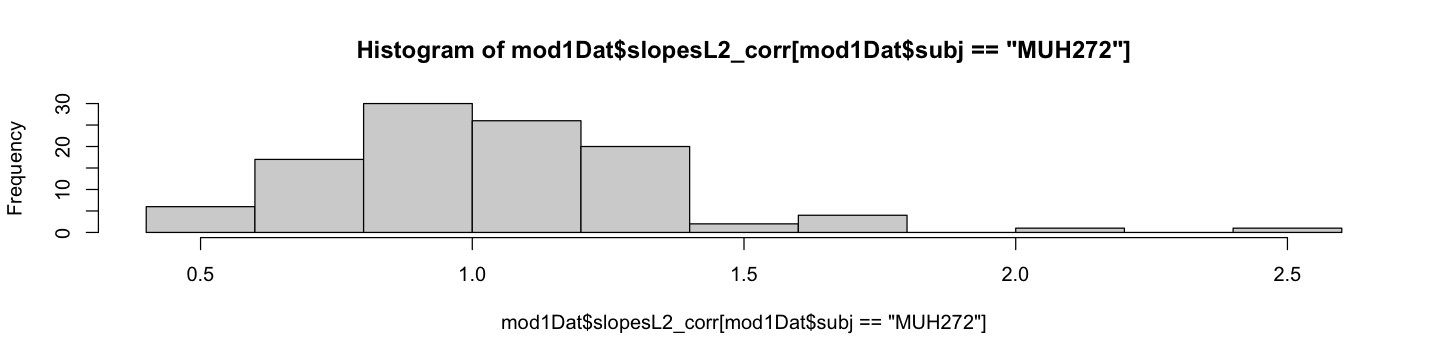

In [43]:
hist(mod1Dat$slopesL2_corr[mod1Dat$subj=="MUH272"])
ct = c("end.ramp","start.plateau")
mod1Dat %>% 
filter(cond3%in%ct & slopesL2_corr>2) %>% select(grp,expGrp,tgtHt,subj,cond3,trial,slopesL2_corr)

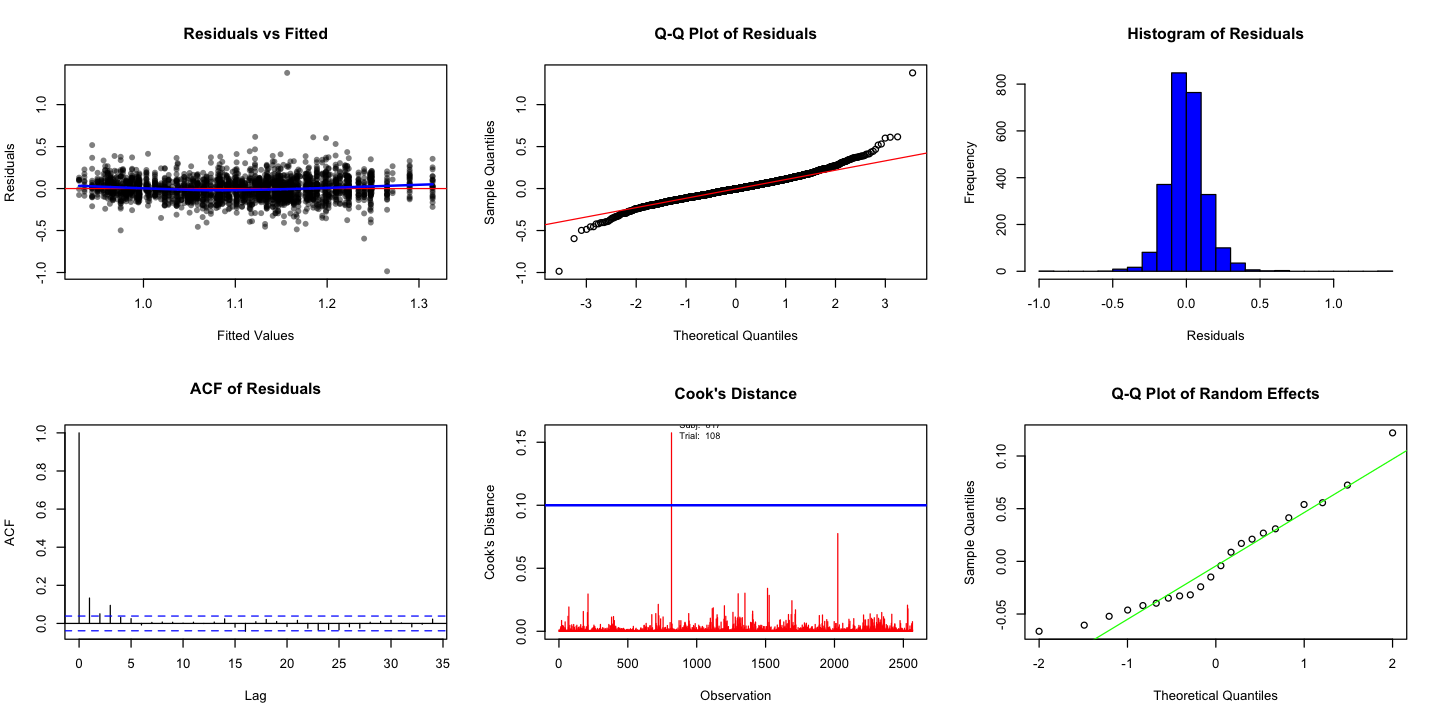

In [669]:
options(repr.plot.width=12, repr.plot.height=6)
lmer_diagnostics(mod1,mod1Dat)

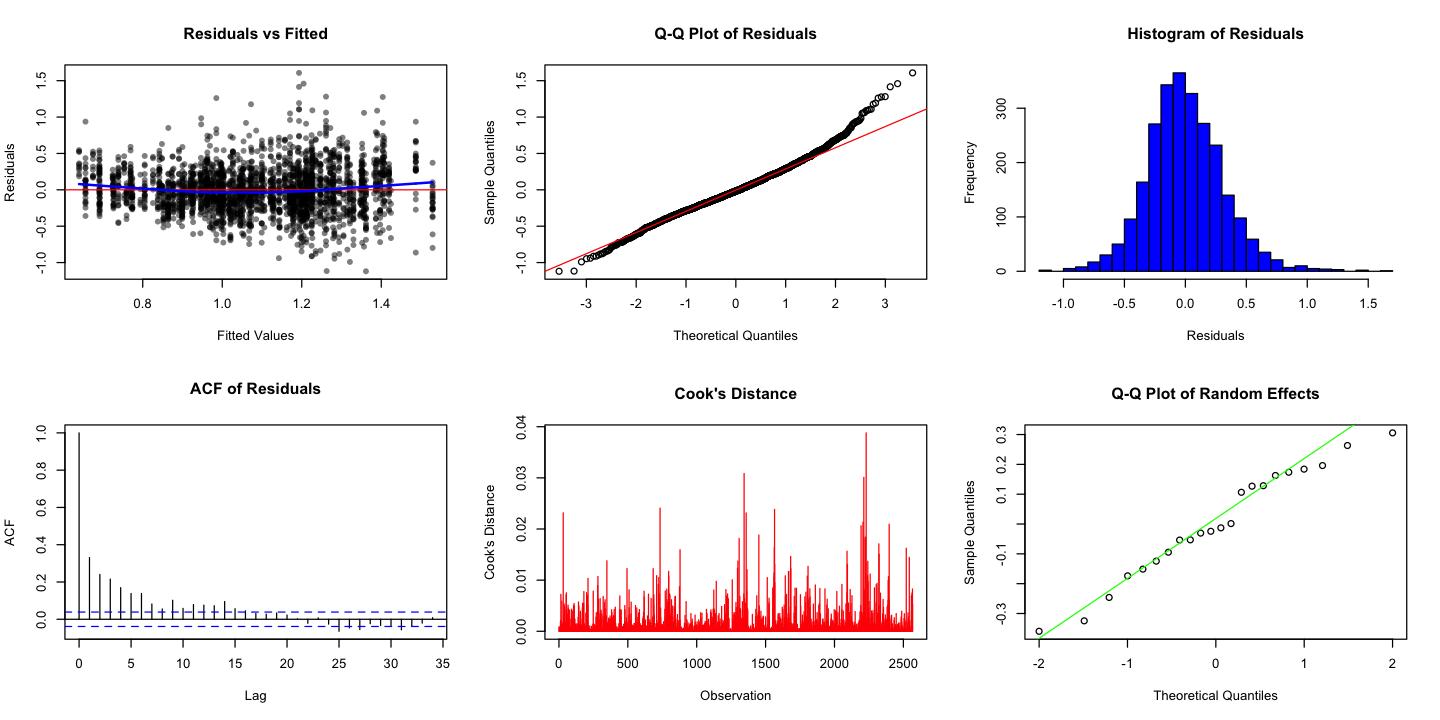

In [670]:
lmer_diagnostics(mod1R,mod1Dat)

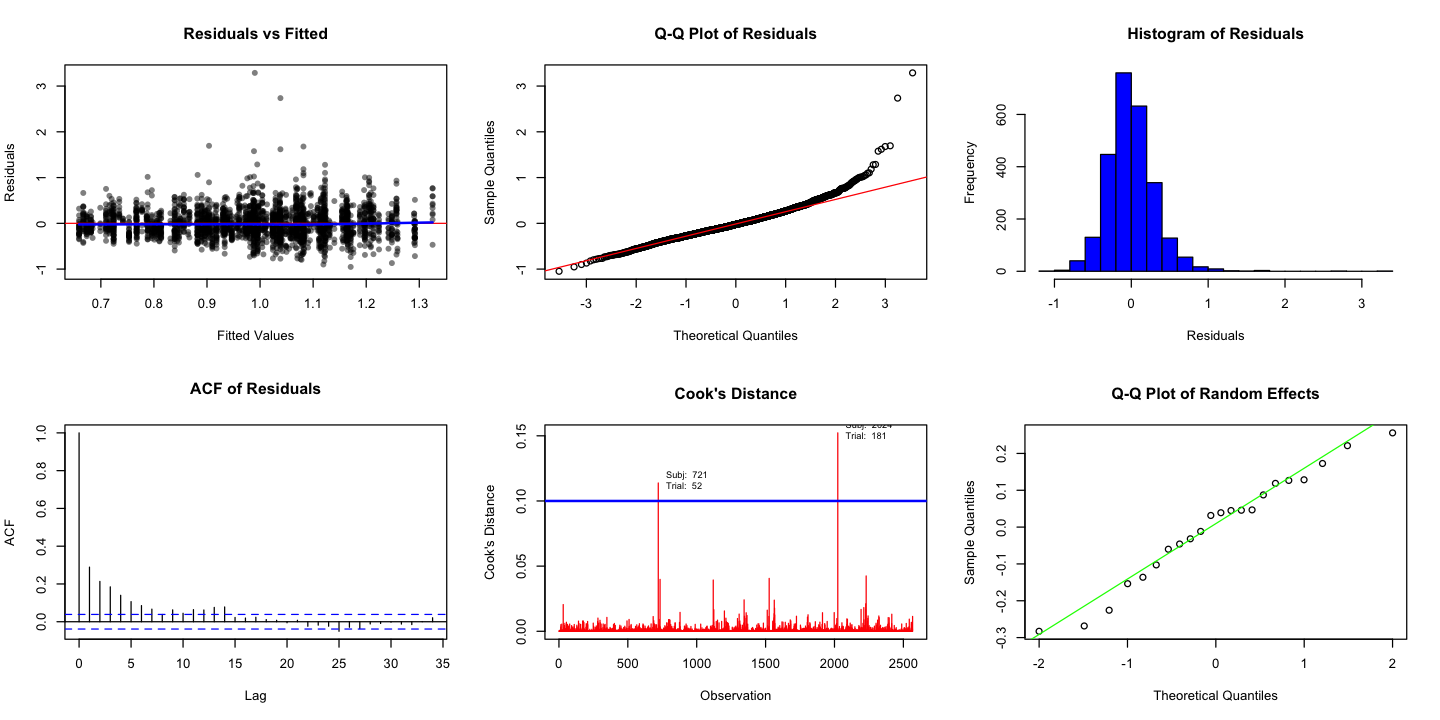

In [671]:
lmer_diagnostics(mod1L,mod1Dat)

In [98]:
# this model changes intercept to 1 by using offset(learnInt)- R scaling
rmod1R = rlmer(data = mod1Dat, 
   slopesR2_corr ~ 1 + offset(learnInt) + cond3 + (1|subj))

# this model changes intercept to 1 by using offset(learnInt)- L sc aling
rmod1L = rlmer(data = mod1Dat, 
   slopesL2_corr ~ 1 + offset(learnInt) + cond3 + (1|subj))

pl_mod1R = plot(rmod1R)
pl_mod1L = plot(rmod1L)

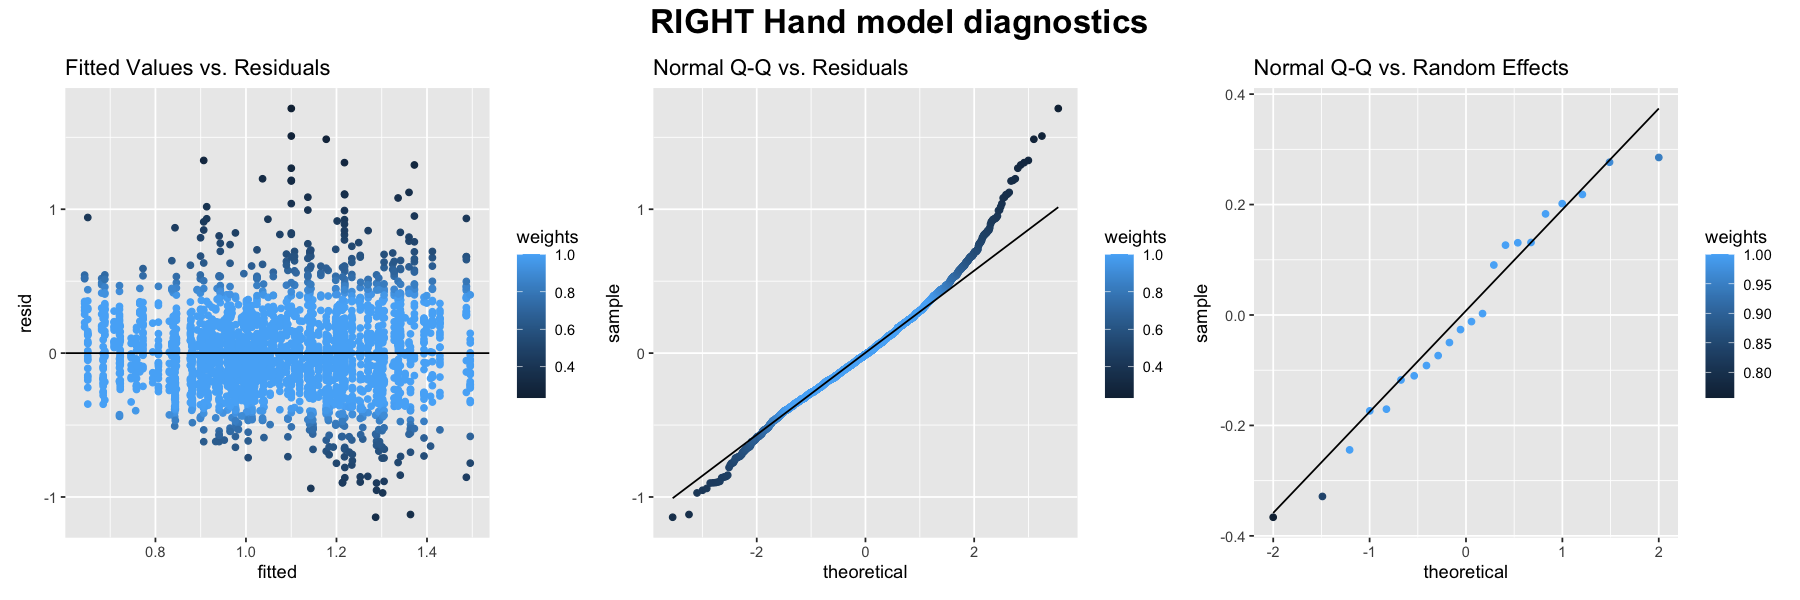

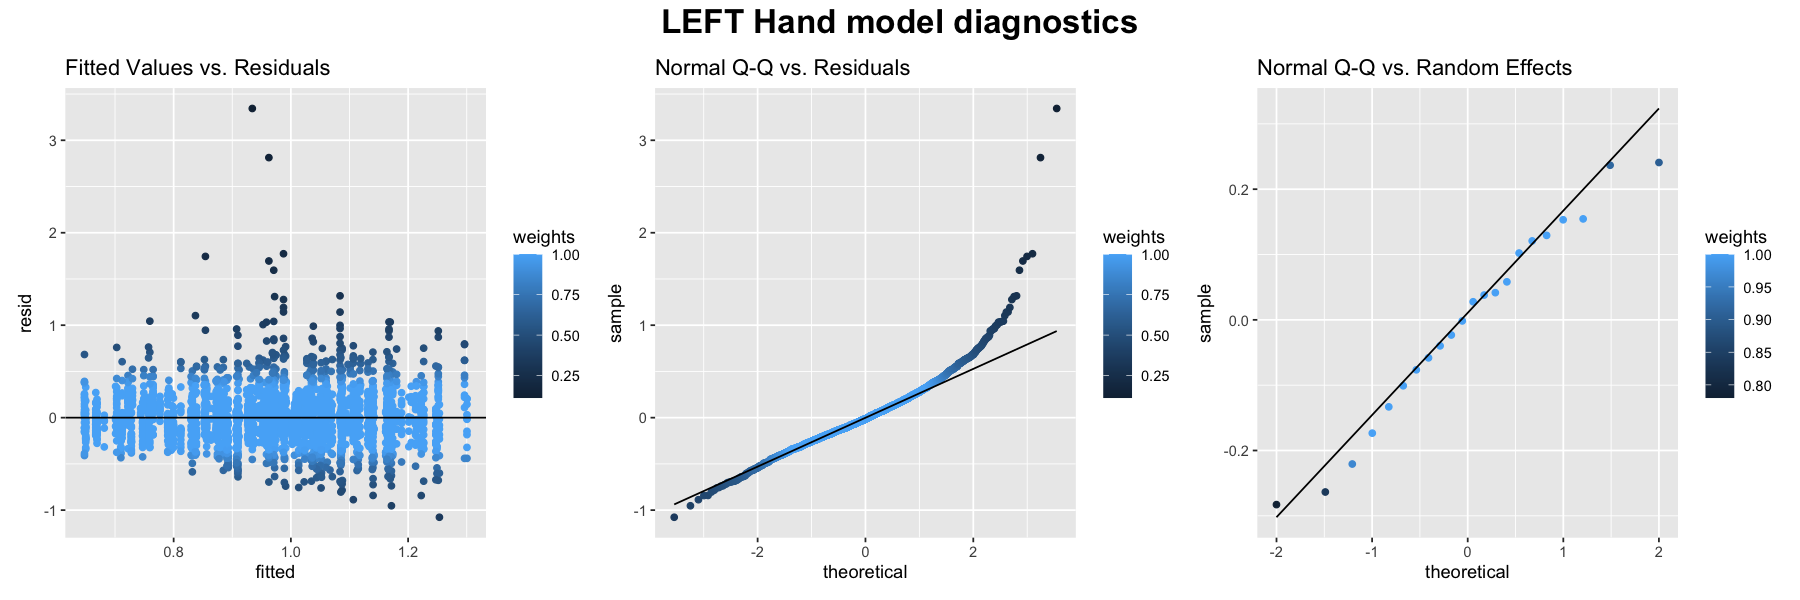

In [99]:
options(repr.plot.width=15, repr.plot.height=5)
comb_RIGHT = pl_mod1R[[1]] + pl_mod1R[[2]] + pl_mod1R[[3]] 
comb_RIGHT + plot_annotation(
  title = "RIGHT Hand model diagnostics",
  theme = theme(
    plot.title = element_text(face = "bold", size = 20, hjust = 0.5, color = "black"),
  )
)
comb_LEFT = pl_mod1L[[1]] + pl_mod1L[[2]] + pl_mod1L[[3]] 
comb_LEFT + plot_annotation(
  title = "LEFT Hand model diagnostics",
  theme = theme(
    plot.title = element_text(face = "bold", size = 20, hjust = 0.5, color = "black"),
  )
)

## Right hand uni vs bi (Fig 3)

In [103]:
summDat$learnInt = 1
mod2Dat = summDat %>% filter(tgtHtC=="narrow" & grp=="adults")

In [104]:
# this model changes intercept to 1 by using offset(learnInt) - R/L ratio
mod2R = lmer(data = mod2Dat, 
   slopesR2_corr ~ 1 + offset(learnInt) + expGrp*cond3 + (1|subj))

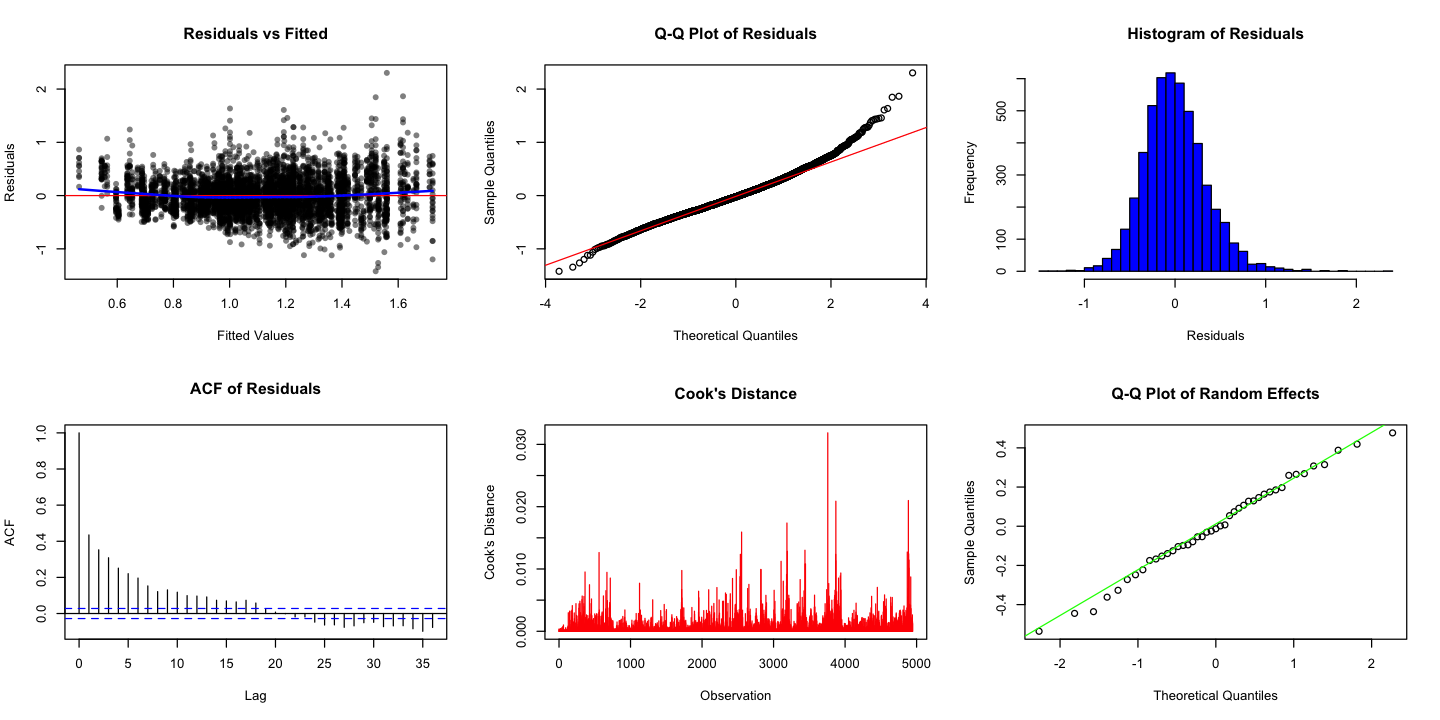

In [105]:
options(repr.plot.width=12, repr.plot.height=6)
lmer_diagnostics(mod2R,mod2Dat)

In [106]:
rmod2R = rlmer(data = mod2Dat, 
   slopesR2_corr ~ 1 + expGrp*cond3 + (1|subj))
table2 = tab_model(rmod2R, show.se = TRUE, show.ci = FALSE, show.stat = TRUE)
display_html(head(table2$page.complete))
pl_mod2R = plot(rmod2R)

slopes R 2 corr 
 
 
 Predictors 
 Estimates 
 std. Error 
 Statistic 
 p 
 
 
 (Intercept) 
 1.01 
 0.06 
 16.62 
 <0.001 
 
 
 expGrp [unimanual] 
 -0.00 
 0.09 
 -0.05 
 0.958 
 
 
 cond3 [start.ramp] 
 0.01 
 0.03 
 0.29 
 0.768 
 
 
 cond3 [end.ramp] 
 0.04 
 0.03 
 1.54 
 0.123 
 
 
 cond3 [start.plateau] 
 0.08 
 0.03 
 2.86 
 0.004 
 
 
 cond3 [end.plateau] 
 0.20 
 0.03 
 7.32 
 <0.001 
 
 
 cond3 [start.washout] 
 0.11 
 0.04 
 2.82 
 0.005 
 
 
 cond3 [end.washout] 
 0.07 
 0.03 
 2.10 
 0.036 
 
 
 expGrp [unimanual] × cond3 [start.ramp] 
 0.07 
 0.04 
 1.82 
 0.068 
 
 
 expGrp [unimanual] × cond3 [end.ramp] 
 0.08 
 0.04 
 1.98 
 0.048 
 
 
 expGrp [unimanual] × cond3 [start.plateau] 
 0.04 
 0.04 
 0.98 
 0.325 
 
 
 expGrp [unimanual] × cond3 [end.plateau] 
 0.04 
 0.04 
 0.92 
 0.356 
 
 
 expGrp [unimanual] × cond3 [start.washout] 
 0.03 
 0.06 
 0.56 
 0.574 
 
 
 expGrp [unimanual] × cond3 [end.washout] 
 0.16 
 0.05 
 3.57 
 <0.001 
 
 
 Random Effects 
 

 
 σ 2 
 0.11 
 

 
 τ 00 subj 
 0.07 

 
 ICC 
 0.38 

 
 N subj 
 43 
 
 Observations 
 4944 
 
 
 Marginal R 2 / Conditional R 2 
 0.032 / 0.396

In [137]:
summary(emm2)

expGrp    cond3         emmean   SE         df  asymp.LCL asymp.UCL
1  bimanual  baseline      1.005714 0.06050401 Inf 0.8871284 1.124300 
2  unimanual baseline      1.001141 0.06182376 Inf 0.8799683 1.122313 
3  bimanual  start.ramp    1.013812 0.05778341 Inf 0.9005589 1.127066 
4  unimanual start.ramp    1.080653 0.05914295 Inf 0.9647349 1.196571 
5  bimanual  end.ramp      1.048532 0.05791304 Inf 0.9350246 1.162040 
6  unimanual end.ramp      1.122290 0.05929620 Inf 1.0060720 1.238509 
7  bimanual  start.plateau 1.085063 0.05791824 Inf 0.9715454 1.198581 
8  unimanual start.plateau 1.119678 0.05943792 Inf 1.0031819 1.236174 
9  bimanual  end.plateau   1.208061 0.05786068 Inf 1.0946558 1.321465 
10 unimanual end.plateau   1.240052 0.05937535 Inf 1.1236781 1.356425 
11 bimanual  start.washout 1.119143 0.06480138 Inf 0.9921346 1.246151 
12 unimanual start.washout 1.147189 0.06688134 Inf 1.0161044 1.278274 
13 bimanual  end.washout   1.073061 0.06013571 Inf 0.9551971 1.190925 
14 unimanual end.washout   1.232270 0.06154275 Inf 1.1116484 1.352892

In [155]:
emm2 <- emmeans(rmod2R, ~ expGrp * cond3)

# Define custom contrast for difference-in-difference (DiD)
custom_contrast <- contrast(emm2, 
                            method = list(
                                "(Bi-Uni) Start Ramp - (Bi-Uni) Baseline" = 
                                c(1, -1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
                                "(Bi-Uni) End Ramp - (Bi-Uni) Baseline" = 
                                c(1, -1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0),
                                "(Bi-Uni) Start Plateau - (Bi-Uni) Baseline" = 
                                c(1, -1, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0),
                                "(Bi-Uni) End Plateau - (Bi-Uni) Baseline" = 
                                c(1, -1, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0),
                                "(Bi-Uni) Start Washout - (Bi-Uni) Baseline" = 
                                c(1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0),
                                "(Bi-Uni) End Washout - (Bi-Uni) Baseline" = 
                                c(1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1)),
                            adjust = "bonferroni")

# Print contrast output
summary(custom_contrast)



contrast                                   estimate   SE         df 
1 (Bi-Uni) Start Ramp - (Bi-Uni) Baseline    0.07141414 0.03915934 Inf
2 (Bi-Uni) End Ramp - (Bi-Uni) Baseline      0.07833170 0.03958296 Inf
3 (Bi-Uni) Start Plateau - (Bi-Uni) Baseline 0.03918845 0.03980432 Inf
4 (Bi-Uni) End Plateau - (Bi-Uni) Baseline   0.03656445 0.03962490 Inf
5 (Bi-Uni) Start Washout - (Bi-Uni) Baseline 0.03261995 0.05804115 Inf
6 (Bi-Uni) End Washout - (Bi-Uni) Baseline   0.16378242 0.04583380 Inf
  z.ratio   p.value    
1 1.8236808 0.409202065
2 1.9789249 0.286946804
3 0.9845274 1.000000000
4 0.9227644 1.000000000
5 0.5620141 1.000000000
6 3.5733979 0.002114272

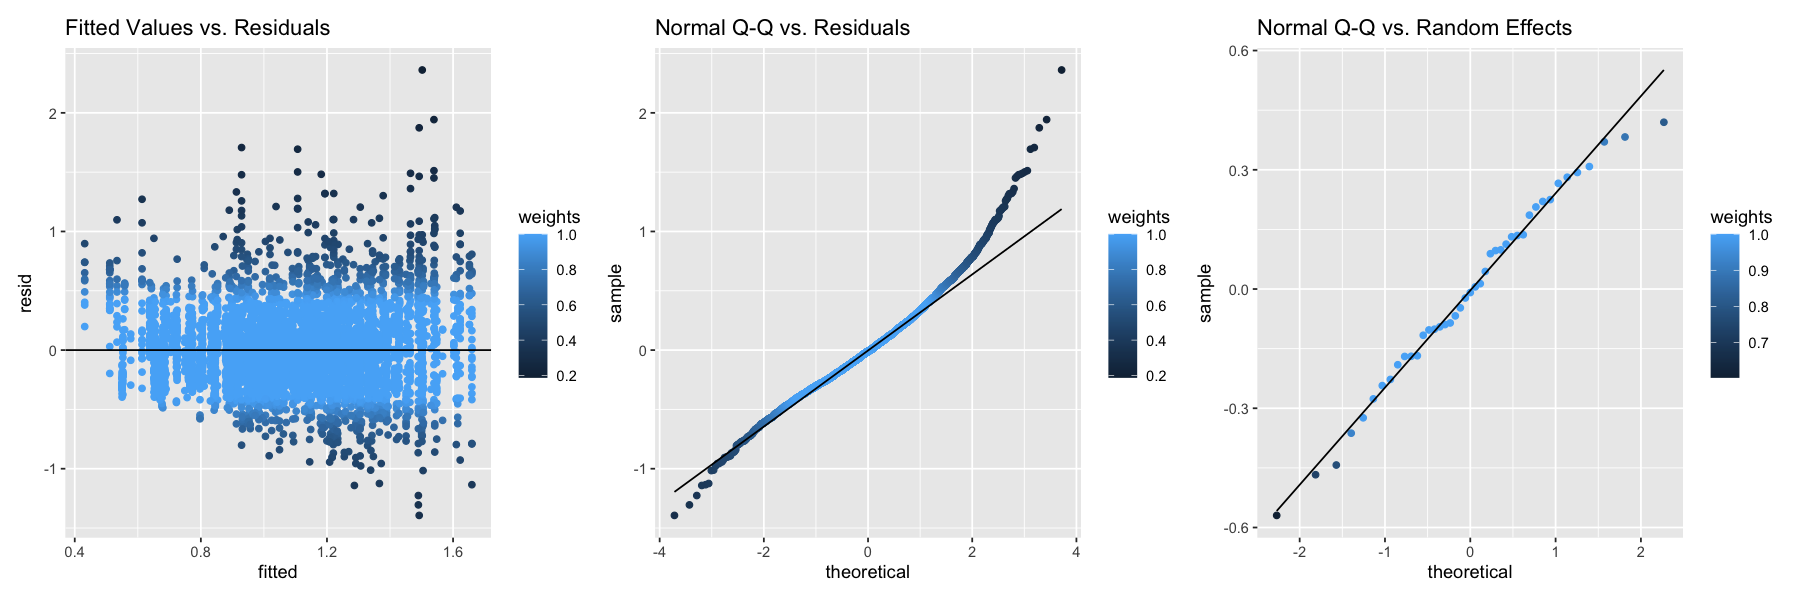

In [321]:
options(repr.plot.width=15, repr.plot.height=5)
pl_mod2R[[1]] + pl_mod2R[[2]] + pl_mod2R[[3]] 

## Bimanual wide vs narrow (Fig 4)

In [156]:
mod3Dat = summDat %>% filter(expGrp=="bimanual" & grp=="adults")

In [157]:
mod3 = lmer(data = mod3Dat, 
   EarlySlopeAdj_corr ~ 1 + tgtHtC*cond3 + (1|subj))
mod3R = lmer(data = mod3Dat,
    slopesR2_corr ~ 1 + tgtHtC*cond3 + (1|subj))
mod3L = lmer(data = mod3Dat,
    slopesL2_corr ~ 1 + tgtHtC*cond3 + (1|subj))

##---
rmod3R = rlmer(data = mod3Dat, 
   slopesR2_corr ~ 1 + tgtHtC*cond3 + (1|subj))
rmod3L = rlmer(data = mod3Dat, 
   slopesL2_corr ~ 1 + tgtHtC*cond3 + (1|subj))

In [158]:
table3 = tab_model(mod3, rmod3R, rmod3L, show.se = TRUE, show.ci = FALSE, show.stat = TRUE)
display_html(head(table3$page.complete))

# emmeans(mod3, ~tgtHtC|cond3) %>% pairs()

Early Slope Adj corr 
 slopes R 2 corr 
 slopes L 2 corr 
 
 
 Predictors 
 Estimates 
 std. Error 
 Statistic 
 p 
 Estimates 
 std. Error 
 Statistic 
 p 
 Estimates 
 std. Error 
 Statistic 
 p 
 
 
 (Intercept) 
 1.00 
 0.01 
 69.31 
 <0.001 
 1.01 
 0.06 
 17.18 
 <0.001 
 1.01 
 0.05 
 21.15 
 <0.001 
 
 
 tgtHtC [wide] 
 0.00 
 0.02 
 0.14 
 0.889 
 -0.02 
 0.09 
 -0.27 
 0.783 
 -0.03 
 0.07 
 -0.35 
 0.726 
 
 
 cond3 [start.ramp] 
 0.03 
 0.01 
 2.73 
 0.006 
 0.01 
 0.03 
 0.29 
 0.772 
 -0.03 
 0.02 
 -1.03 
 0.302 
 
 
 cond3 [end.ramp] 
 0.13 
 0.01 
 11.25 
 <0.001 
 0.04 
 0.03 
 1.57 
 0.116 
 -0.08 
 0.03 
 -3.11 
 0.002 
 
 
 cond3 [start.plateau] 
 0.17 
 0.01 
 14.93 
 <0.001 
 0.08 
 0.03 
 2.93 
 0.003 
 -0.08 
 0.03 
 -3.16 
 0.002 
 
 
 cond3 [end.plateau] 
 0.20 
 0.01 
 17.18 
 <0.001 
 0.20 
 0.03 
 7.55 
 <0.001 
 0.00 
 0.03 
 0.01 
 0.995 
 
 
 cond3 [start.washout] 
 0.15 
 0.02 
 9.20 
 <0.001 
 0.11 
 0.04 
 2.91 
 0.004 
 -0.05 
 0.04 
 -1.29 
 0.197 
 
 
 cond3 [end.washout] 
 0.01 
 0.01 
 1.07 
 0.286 
 0.07 
 0.03 
 2.15 
 0.032 
 0.05 
 0.03 
 1.67 
 0.095 
 
 
 tgtHtC [wide] × cond3 [start.ramp] 
 -0.01 
 0.02 
 -0.49 
 0.623 
 0.12 
 0.04 
 2.97 
 0.003 
 0.14 
 0.04 
 3.60 
 <0.001 
 
 
 tgtHtC [wide] × cond3 [end.ramp] 
 0.02 
 0.02 
 1.00 
 0.319 
 0.24 
 0.04 
 5.85 
 <0.001 
 0.21 
 0.04 
 5.36 
 <0.001 
 
 
 tgtHtC [wide] × cond3 [start.plateau] 
 0.05 
 0.02 
 2.77 
 0.006 
 0.19 
 0.04 
 4.60 
 <0.001 
 0.13 
 0.04 
 3.34 
 0.001 
 
 
 tgtHtC [wide] × cond3 [end.plateau] 
 0.04 
 0.02 
 2.23 
 0.026 
 0.05 
 0.04 
 1.29 
 0.196 
 0.03 
 0.04 
 0.89 
 0.375 
 
 
 tgtHtC [wide] × cond3 [start.washout] 
 0.09 
 0.03 
 3.37 
 0.001 
 -0.01 
 0.06 
 -0.09 
 0.931 
 -0.03 
 0.06 
 -0.47 
 0.642 
 
 
 tgtHtC [wide] × cond3 [end.washout] 
 0.03 
 0.02 
 1.35 
 0.176 
 0.21 
 0.05 
 4.47 
 <0.001 
 0.19 
 0.04 
 4.16 
 <0.001 
 
 
 Random Effects 
 

 
 σ 2 
 0.02 
 0.10 
 0.09 
 

 
 τ 00 
 0.00 subj 
 0.06 subj 
 0.04 subj 

 
 ICC 
 0.11 
 0.38 
 0.30 

 
 N 
 38 subj 
 38 subj 
 38 subj 
 
 Observations 
 4510 
 4510 
 4510 
 
 
 Marginal R 2 / Conditional R 2 
 0.242 / 0.328 
 0.054 / 0.410 
 0.038 / 0.328

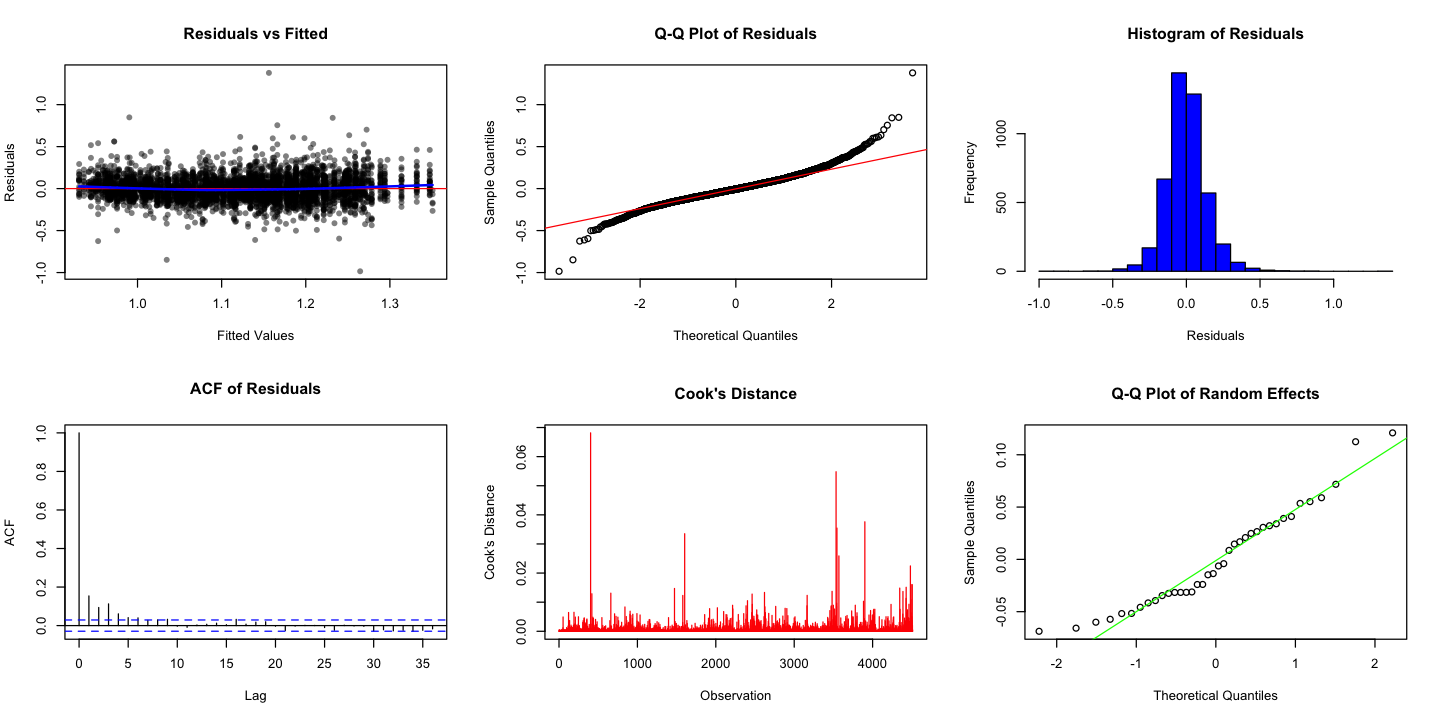

In [114]:
lmer_diagnostics(mod3, mod3Dat)

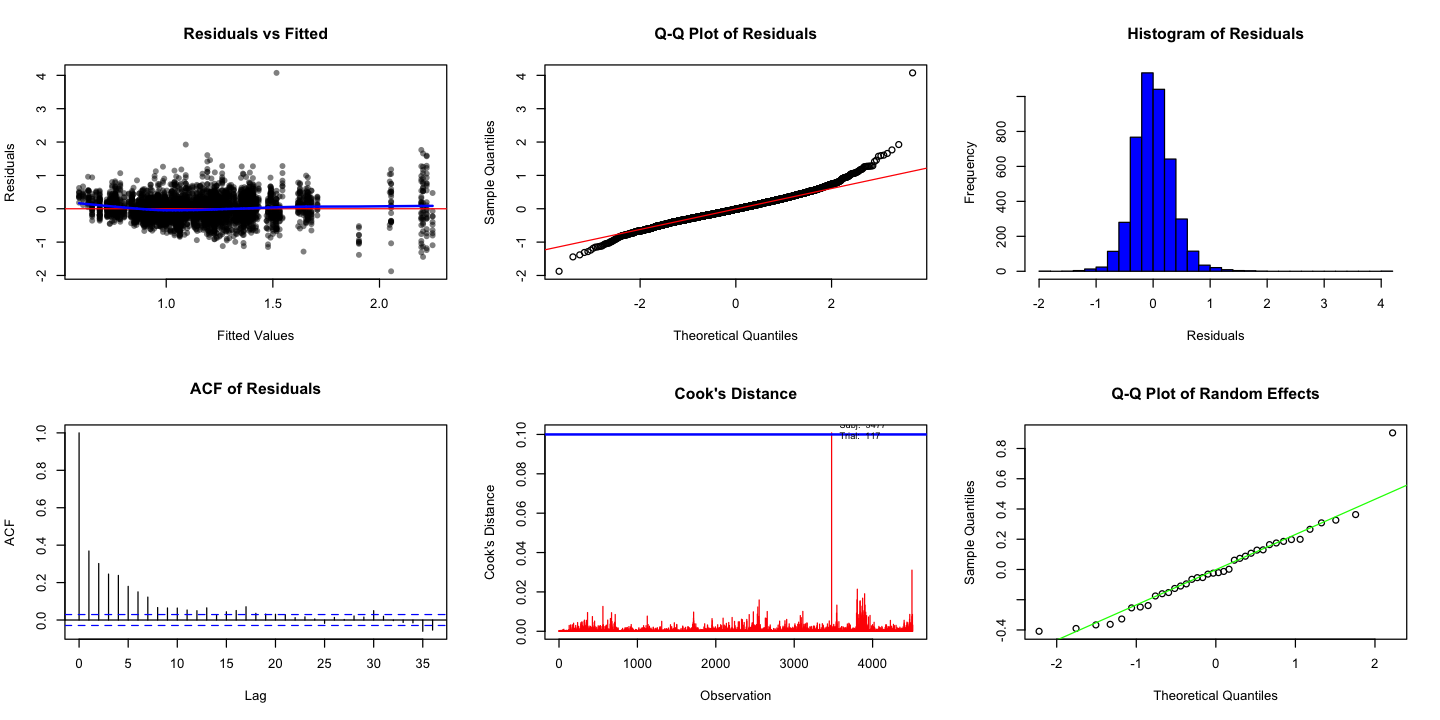

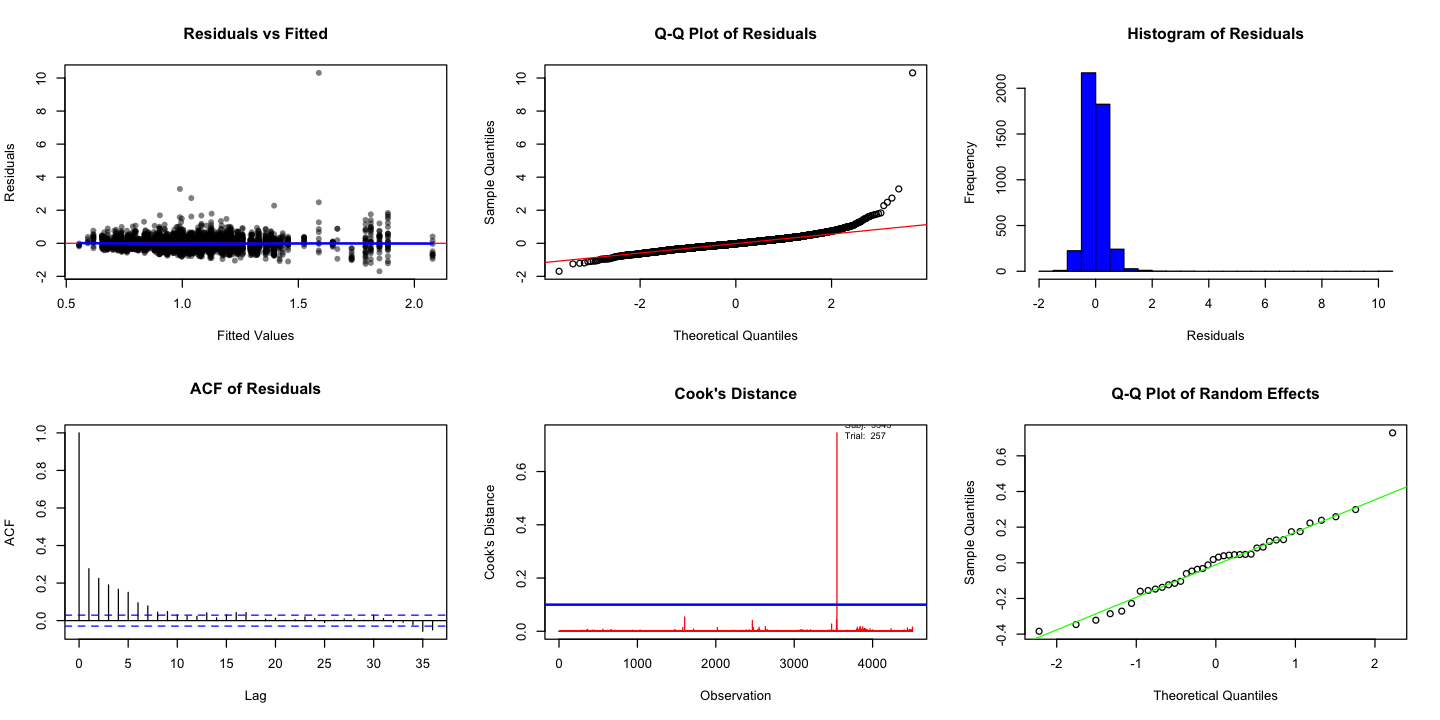

In [115]:
lmer_diagnostics(mod3R, mod3Dat)
lmer_diagnostics(mod3L, mod3Dat)

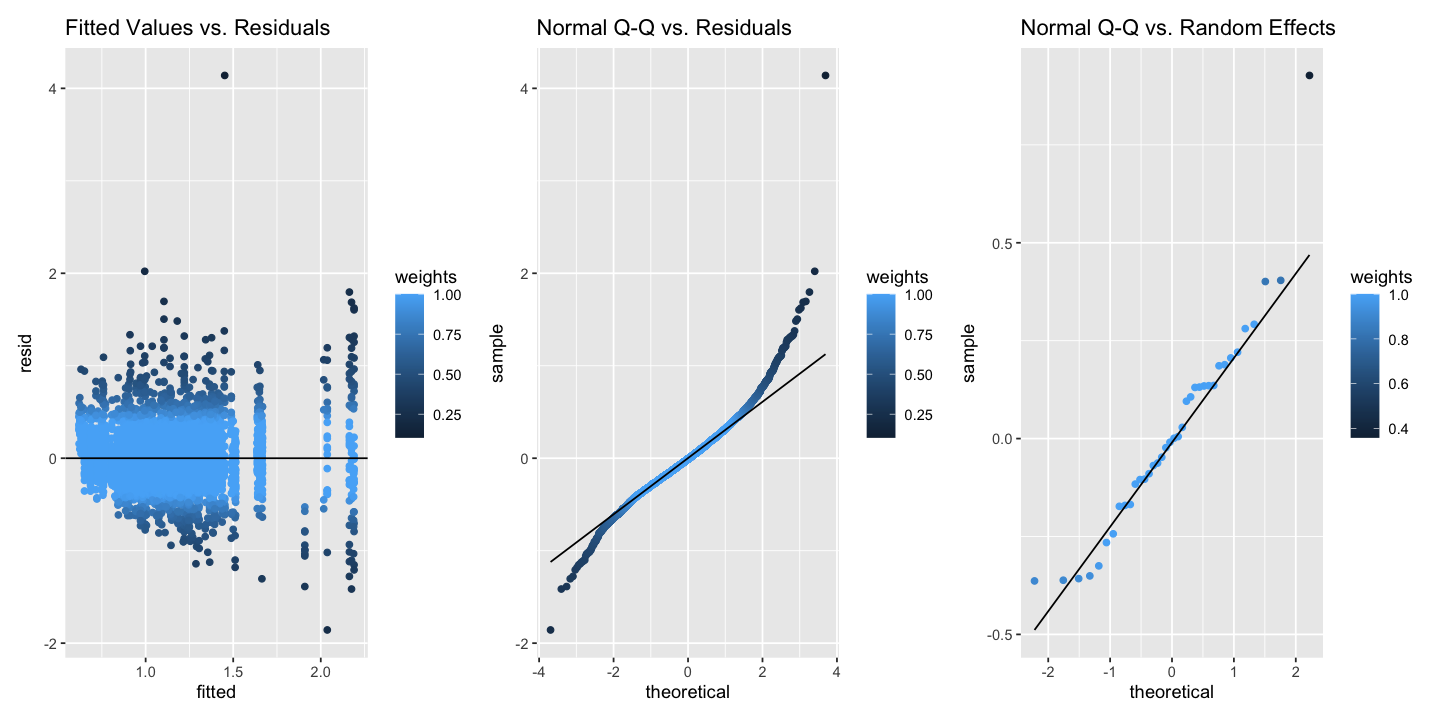

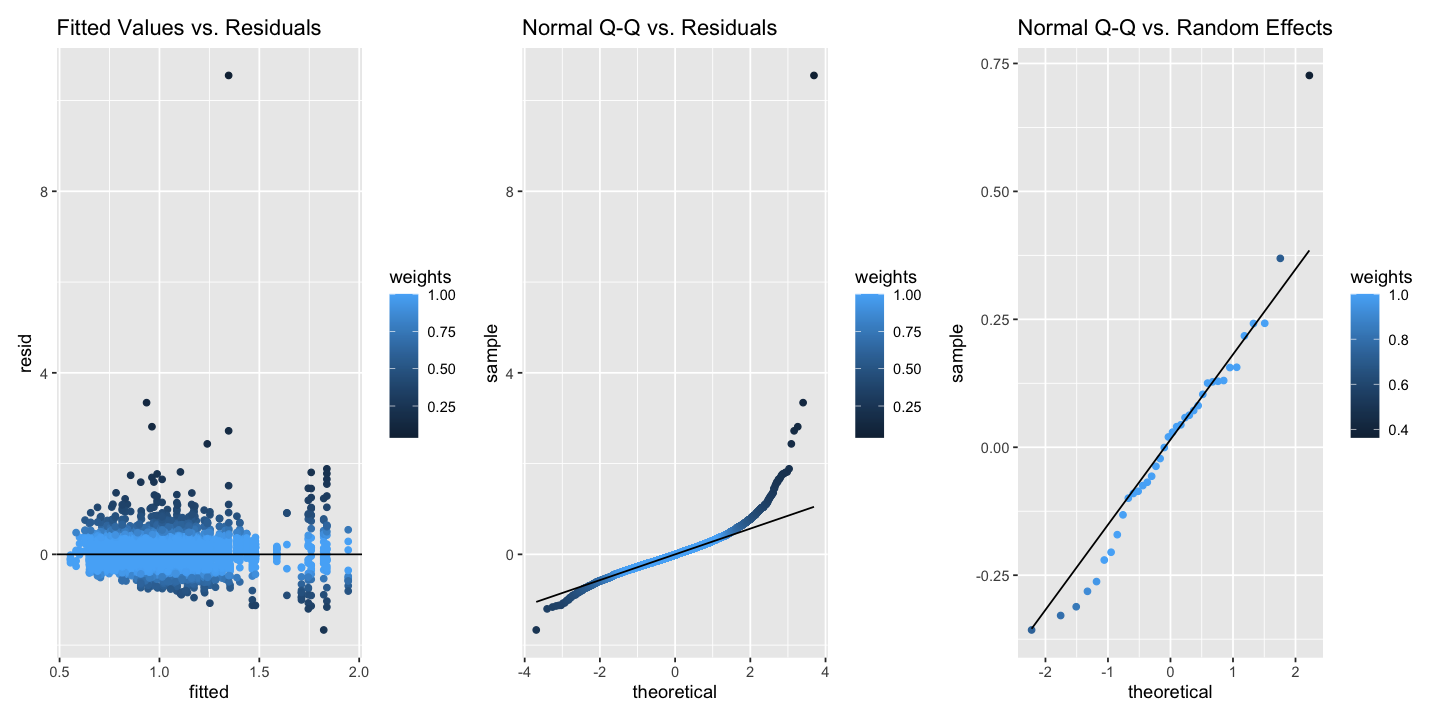

In [116]:
pl_mod3R = plot(rmod3R)
pl_mod3L = plot(rmod3L)

pl_mod3R[[1]] + pl_mod3R[[2]] + pl_mod3R[[3]] 
pl_mod3L[[1]] + pl_mod3L[[2]] + pl_mod3L[[3]] 

In [180]:
emm3 <- emmeans(mod3, ~ tgtHtC * cond3)
summary(emm3)

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 4510' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 4510)' or larger];
but be warned that this may result in large computation time and memory use.

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 4510' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 4510)' or larger];
but be warned that this may result in large computation time and memory use.



tgtHtC cond3         emmean    SE         df  asymp.LCL asymp.UCL
1  narrow baseline      0.9962869 0.01437505 Inf 0.9681123 1.024461 
2  wide   baseline      0.9993620 0.01674001 Inf 0.9665522 1.032172 
3  narrow start.ramp    1.0273536 0.01230777 Inf 1.0032308 1.051476 
4  wide   start.ramp    1.0218796 0.01439118 Inf 0.9936734 1.050086 
5  narrow end.ramp      1.1255805 0.01241174 Inf 1.1012540 1.149907 
6  wide   end.ramp      1.1461025 0.01442331 Inf 1.1178333 1.174372 
7  narrow start.plateau 1.1678797 0.01241586 Inf 1.1435450 1.192214 
8  wide   start.plateau 1.2194707 0.01445083 Inf 1.1911476 1.247794 
9  narrow end.plateau   1.1928693 0.01236986 Inf 1.1686248 1.217114 
10 wide   end.plateau   1.2349247 0.01446110 Inf 1.2065815 1.263268 
11 narrow start.washout 1.1493238 0.01728990 Inf 1.1154363 1.183211 
12 wide   start.washout 1.2382973 0.02019957 Inf 1.1987069 1.277888 
13 narrow end.washout   1.0104710 0.01410771 Inf 0.9828204 1.038122 
14 wide   end.washout   1.0410257 0.01644017 Inf 1.0088035 1.073248

In [273]:
# Define custom contrast for difference-in-difference (DiD)
custom_contrast <- contrast(emm3, 
                            method = list(
                                "(Nr-Wd) Baseline - (Nr-Wd) Start Ramp" = 
                                c(1, -1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
                                "(Nr-Wd) Baseline - (Nr-Wd) End Ramp" = 
                                c(1, -1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0),
                                "(Nr-Wd) Baseline - (Nr-Wd) Start Plateau" = 
                                c(1, -1, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0),
                                "(Nr-Wd) Baseline - (Nr-Wd) End Plateau" = 
                                c(1, -1, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0),
                                "(Nr-Wd) Baseline - (Nr-Wd) Start Washout" = 
                                c(1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0),
                                "(Nr-Wd) Baseline - (Nr-Wd) End Washout" = 
                                c(1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1)),
                            adjust = "bonferroni")

# Print contrast output
summary(custom_contrast)



contrast                                 estimate     SE         df 
1 (Nr-Wd) Baseline - (Nr-Wd) Start Ramp    -0.008549159 0.01738878 Inf
2 (Nr-Wd) Baseline - (Nr-Wd) End Ramp       0.017446797 0.01748970 Inf
3 (Nr-Wd) Baseline - (Nr-Wd) Start Plateau  0.048515879 0.01751590 Inf
4 (Nr-Wd) Baseline - (Nr-Wd) End Plateau    0.038980240 0.01749120 Inf
5 (Nr-Wd) Baseline - (Nr-Wd) Start Washout  0.085898266 0.02550866 Inf
6 (Nr-Wd) Baseline - (Nr-Wd) End Washout    0.027479492 0.02032548 Inf
  z.ratio    p.value    
1 -0.4916481 1.000000000
2  0.9975469 1.000000000
3  2.7698198 0.033652384
4  2.2285634 0.155057813
5  3.3674157 0.004552573
6  1.3519728 1.000000000

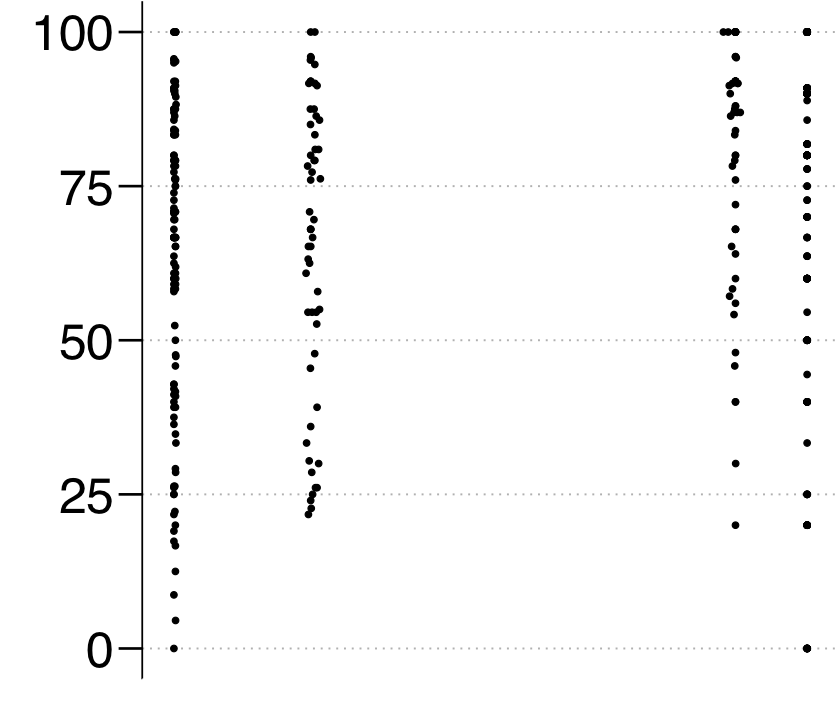

In [723]:
succ_gain = ggplot(data = summDat2 %>% filter(grp=="adults"),
                  aes(x = gain_mn, y = succRate, #group=interaction(tgtHtC,expGrp), 
                      #col = tgtHtC, shape = expGrp
                     )) + 
geom_point(show.legend = FALSE) + 
scale_color_manual(values = c("#1BC7B1","#D35D27")) +
scale_shape_manual(values = c(1,16)) + 
xlab("") + ylab("") +
theme_clean() + thm + theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
       axis.text.x = element_blank(),
      panel.border = element_blank(),
     axis.ticks.length=unit(0.2,"cm"),
      axis.ticks.x = element_blank(),
      legend.position="top",
      axis.text.y = element_text(size = 30),
      axis.ticks.length.y=unit(0.5,units = "cm"),
      axis.line.x = element_line(colour = "white"),
     axis.line.y = element_line(colour = "black")
     ) 

succ_gain

In [755]:
summDat2$succMax = 100

mod4Succ = lm(data = summDat2 %>% filter(grp=="adults"), 
              succRate~ 1 + cond3 * OmniGrp )
summary(mod4Succ) %>% tidy()
glance(mod4Succ)
emmeans(mod4Succ, ~OmniGrp|cond3*OmniGrp) %>% pairs()  %>% tidy() #%>% filter(adj.p.value<0.05)

anova(mod4Succ)

term                                 estimate    std.error statistic 
1  (Intercept)                           70.6890332 4.030324  17.5392938
2  cond3start.ramp                       -7.8436539 5.699739  -1.3761428
3  cond3end.ramp                        -26.8757401 5.699739  -4.7152584
4  cond3start.plateau                   -28.4443271 5.699739  -4.9904617
5  cond3end.plateau                     -27.5317450 5.699739  -4.8303522
6  cond3start.washout                   -40.8405483 5.699739  -7.1653371
7  cond3end.washout                       1.2072019 5.699739   0.2117995
8  OmniGrpBi-wide                        22.4359668 6.211146   3.6122104
9  OmniGrpuni-narrow                     23.0146705 5.767193   3.9906188
10 cond3start.ramp:OmniGrpBi-wide         5.4509909 8.783887   0.6205670
11 cond3end.ramp:OmniGrpBi-wide          15.0704865 8.783887   1.7156968
12 cond3start.plateau:OmniGrpBi-wide      9.5668567 8.783887   1.0891370
13 cond3end.plateau:OmniGrpBi-wide        8.9289370 8.783887   1.0165132
14 cond3start.washout:OmniGrpBi-wide     20.8405483 8.783887   2.3725884
15 cond3end.washout:OmniGrpBi-wide       -3.8208383 8.783887  -0.4349826
16 cond3start.ramp:OmniGrpuni-narrow      3.9453960 8.156043   0.4837390
17 cond3end.ramp:OmniGrpuni-narrow        9.9523356 8.156043   1.2202407
18 cond3start.plateau:OmniGrpuni-narrow  11.3563054 8.156043   1.3923793
19 cond3end.plateau:OmniGrpuni-narrow     9.9464649 8.156043   1.2195209
20 cond3start.washout:OmniGrpuni-narrow  14.0416065 8.156043   1.7216199
21 cond3end.washout:OmniGrpuni-narrow    -0.9137916 8.156043  -0.1120386
   p.value     
1  2.966825e-51
2  1.695631e-01
3  3.361035e-06
4  9.075308e-07
5  1.958276e-06
6  3.875673e-12
7  8.323735e-01
8  3.430637e-04
9  7.865996e-05
10 5.352451e-01
11 8.700771e-02
12 2.767626e-01
13 3.100120e-01
14 1.814573e-02
15 6.638144e-01
16 6.288412e-01
17 2.231072e-01
18 1.645969e-01
19 2.233798e-01
20 8.592730e-02
21 9.108502e-01

r.squared adj.r.squared sigma    statistic p.value     df logLik   
value 0.5071785 0.4820346     18.90389 20.17099  2.00405e-48 20 -1789.204
      AIC      BIC      deviance df.residual nobs
value 3622.408 3710.924 140084   392         413

cond3         term    contrast                   null.value estimate   
1  baseline      OmniGrp (bi-narrow) - (Bi-wide)    0          -22.4359668
2  baseline      OmniGrp (bi-narrow) - (uni-narrow) 0          -23.0146705
3  baseline      OmniGrp (Bi-wide) - (uni-narrow)   0           -0.5787037
4  start.ramp    OmniGrp (bi-narrow) - (Bi-wide)    0          -27.8869577
5  start.ramp    OmniGrp (bi-narrow) - (uni-narrow) 0          -26.9600665
6  start.ramp    OmniGrp (Bi-wide) - (uni-narrow)   0            0.9268912
7  end.ramp      OmniGrp (bi-narrow) - (Bi-wide)    0          -37.5064533
8  end.ramp      OmniGrp (bi-narrow) - (uni-narrow) 0          -32.9670061
9  end.ramp      OmniGrp (Bi-wide) - (uni-narrow)   0            4.5394472
10 start.plateau OmniGrp (bi-narrow) - (Bi-wide)    0          -32.0028235
11 start.plateau OmniGrp (bi-narrow) - (uni-narrow) 0          -34.3709759
12 start.plateau OmniGrp (Bi-wide) - (uni-narrow)   0           -2.3681523
13 end.plateau   OmniGrp (bi-narrow) - (Bi-wide)    0          -31.3649038
14 end.plateau   OmniGrp (bi-narrow) - (uni-narrow) 0          -32.9611354
15 end.plateau   OmniGrp (Bi-wide) - (uni-narrow)   0           -1.5962316
16 start.washout OmniGrp (bi-narrow) - (Bi-wide)    0          -43.2765152
17 start.washout OmniGrp (bi-narrow) - (uni-narrow) 0          -37.0562771
18 start.washout OmniGrp (Bi-wide) - (uni-narrow)   0            6.2202381
19 end.washout   OmniGrp (bi-narrow) - (Bi-wide)    0          -18.6151286
20 end.washout   OmniGrp (bi-narrow) - (uni-narrow) 0          -22.1008789
21 end.washout   OmniGrp (Bi-wide) - (uni-narrow)   0           -3.4857504
   std.error df  statistic   adj.p.value 
1  6.211146  392 -3.61221043 9.982164e-04
2  5.767193  392 -3.99061878 2.317125e-04
3  6.273104  392 -0.09225157 9.953191e-01
4  6.211146  392 -4.48982477 2.791161e-05
5  5.767193  392 -4.67472900 1.208366e-05
6  6.273104  392  0.14775638 9.880365e-01
7  6.211146  392 -6.03857205 1.081041e-08
8  5.767193  392 -5.71629968 6.468483e-08
9  6.273104  392  0.72363651 7.496321e-01
10 6.211146  392 -5.15248279 1.220737e-06
11 5.767193  392 -5.95974040 1.686946e-08
12 6.273104  392 -0.37750885 9.244725e-01
13 6.211146  392 -5.04977716 2.029451e-06
14 5.767193  392 -5.71528174 6.504320e-08
15 6.273104  392 -0.25445642 9.649400e-01
16 6.211146  392 -6.96755708 2.446476e-11
17 5.767193  392 -6.42535703 1.128762e-09
18 6.273104  392  0.99157257 5.826228e-01
19 6.211146  392 -2.99705211 8.139638e-03
20 5.767193  392 -3.83217228 4.337149e-04
21 6.273104  392 -0.55566594 8.436260e-01

Df  Sum Sq     Mean Sq    F value    Pr(>F)      
cond3           6  51763.621  8627.2701  24.141866 2.493832e-24
OmniGrp         2  87776.361 43888.1804 122.813191 3.882207e-42
cond3:OmniGrp  12   4625.017   385.4181   1.078523 3.767395e-01
Residuals     392 140084.030   357.3572         NA           NA

In [279]:
mod5 = lm(data = summDat2 %>% filter(grp=="adults"), 
              sRy_corr_mn ~ 1+ cond3 * OmniGrp )
summary(mod5) %>% tidy()
glance(mod5)
emmeans(mod5, ~OmniGrp|cond3) %>% pairs()  %>% tidy() %>% filter(cond3%in%cc) #%>% filter(adj.p.value<0.05)

anova(mod5)

term                                estimate      std.error   statistic   
1  (Intercept)                          1.0000651598 0.009599579 104.17802037
2  cond3start.ramp                      0.0034211037 0.013575855   0.25199913
3  cond3end.ramp                       -0.0633621821 0.013575855  -4.66727006
4  cond3start.plateau                  -0.0615035601 0.013575855  -4.53036362
5  cond3end.plateau                    -0.0612462008 0.013575855  -4.51140648
6  cond3start.washout                   0.0927407029 0.013575855   6.83129733
7  cond3end.washout                    -0.0005780069 0.013575855  -0.04257609
8  OmniGrpbi-narrow                     0.0003060394 0.013420697   0.02280354
9  OmniGrpbi-wide                       0.0005619220 0.014597990   0.03849310
10 cond3start.ramp:OmniGrpbi-narrow    -0.0110649008 0.018979732  -0.58298508
11 cond3end.ramp:OmniGrpbi-narrow      -0.0368538539 0.018979732  -1.94174783
12 cond3start.plateau:OmniGrpbi-narrow -0.0712803349 0.018979732  -3.75560276
13 cond3end.plateau:OmniGrpbi-narrow   -0.0497304700 0.018979732  -2.62018817
14 cond3start.washout:OmniGrpbi-narrow -0.0372930533 0.018979732  -1.96488827
15 cond3end.washout:OmniGrpbi-narrow    0.0048827454 0.018979732   0.25726103
16 cond3start.ramp:OmniGrpbi-wide      -0.0233296179 0.020644676  -1.13005495
17 cond3end.ramp:OmniGrpbi-wide        -0.0296259574 0.020644676  -1.43504106
18 cond3start.plateau:OmniGrpbi-wide   -0.0796924159 0.020644676  -3.86019219
19 cond3end.plateau:OmniGrpbi-wide     -0.0681721899 0.020644676  -3.30216812
20 cond3start.washout:OmniGrpbi-wide   -0.0790824957 0.020644676  -3.83064848
21 cond3end.washout:OmniGrpbi-wide      0.0067146501 0.020644676   0.32524851
   p.value      
1  8.095551e-288
2   8.011738e-01
3   4.196819e-06
4   7.827479e-06
5   8.522825e-06
6   3.224484e-11
7   9.660611e-01
8   9.818186e-01
9   9.693141e-01
10  5.602386e-01
11  5.288376e-02
12  1.991464e-04
13  9.129600e-03
14  5.013302e-02
15  7.971123e-01
16  2.591440e-01
17  1.520728e-01
18  1.324737e-04
19  1.047465e-03
20  1.487802e-04
21  7.451665e-01

r.squared adj.r.squared sigma     statistic p.value      df logLik  
value 0.6811574 0.6648899     0.0439908 41.87234  2.389106e-84 20 714.8737
      AIC       BIC       deviance  df.residual nobs
value -1385.747 -1297.232 0.7585946 392         413

cond3         term    contrast                   null.value estimate  
1 end.plateau   OmniGrp (uni-narrow) - (bi-narrow) 0          0.04942443
2 end.plateau   OmniGrp (uni-narrow) - (bi-wide)   0          0.06761027
3 end.plateau   OmniGrp (bi-narrow) - (bi-wide)    0          0.01818584
4 start.washout OmniGrp (uni-narrow) - (bi-narrow) 0          0.03698701
5 start.washout OmniGrp (uni-narrow) - (bi-wide)   0          0.07852057
6 start.washout OmniGrp (bi-narrow) - (bi-wide)    0          0.04153356
  std.error  df  statistic adj.p.value 
1 0.01342070 392 3.682702  7.677879e-04
2 0.01459799 392 4.631478  1.473489e-05
3 0.01445381 392 1.258204  4.197871e-01
4 0.01342070 392 2.755968  1.682464e-02
5 0.01459799 392 5.378862  3.865973e-07
6 0.01445381 392 2.873537  1.188960e-02

Df  Sum Sq     Mean Sq     F value    Pr(>F)      
cond3           6 1.42100333 0.236833888 122.382736 1.205126e-86
OmniGrp         2 0.10755196 0.053775978  27.788470 5.176062e-12
cond3:OmniGrp  12 0.09206353 0.007671961   3.964448 8.571354e-06
Residuals     392 0.75859462 0.001935190         NA           NA

In [1738]:
R.version

               _                           
platform       x86_64-apple-darwin20       
arch           x86_64                      
os             darwin20                    
system         x86_64, darwin20            
status                                     
major          4                           
minor          4.1                         
year           2024                        
month          06                          
day            14                          
svn rev        86737                       
language       R                           
version.string R version 4.4.1 (2024-06-14)
nickname       Race for Your Life          

In [229]:
invarC = c("start.washout","end.washout") #"baseline","start.ramp","end.ramp",

summDat2 %>% 
filter(grp=="adults" & subj!="MUH000" & cond3=="start.washout")  %>% {.->>expt2_LME}
head(expt2_LME,7)
# dim(expt2_LME)

summDat2 %>% filter(!(cond3%in%invarC)) %>% 
filter(grp=="adults" & subj!="MUH000") %>% 
select(subj,succRate_mn) %>%
group_by(subj) %>% 
summarise(succRate_grMn = mean(succRate_mn, na.rm = TRUE)) %>%  # Calculate mean of succRate_mn per subject
merge(.,expt2_LME,by = c("subj")) %>% {.->>expt2_LME.succ}
head(expt2_LME.succ)


grp    expGrp   subj   cond3         tgtHtC totTr succRate gain_mn gain_std
1 adults bimanual MUH171 start.washout narrow 3     33.33333 1       0       
2 adults bimanual MUH185 start.washout narrow 5     60.00000 1       0       
3 adults bimanual MUH188 start.washout narrow 5      0.00000 1       0       
4 adults bimanual MUH189 start.washout narrow 5     60.00000 1       0       
5 adults bimanual MUH215 start.washout narrow 3      0.00000 1       0       
6 adults bimanual MUH220 start.washout wide   5     60.00000 1       0       
7 adults bimanual MUH226 start.washout wide   5     40.00000 1       0       
  reward_mn ⋯ asymIdx_late_mn asymIdx_late_std lag.EarlySlopeAdj_corr_mn
1 0.3333333 ⋯  0.055170468    0.05280854       1.329842                 
2 0.6000000 ⋯  0.044600299    0.02688858       1.281202                 
3 0.0000000 ⋯  0.018246050    0.03775963       1.235676                 
4 0.6000000 ⋯  0.075837139    0.02725082       1.255898                 
5 0.0000000 ⋯  0.051866931    0.01281410       1.145738                 
6 0.6000000 ⋯  0.023215144    0.03695992       1.362844                 
7 0.4000000 ⋯ -0.004188388    0.02259681       1.218610                 
  lag.EarlySlopeAdj_corr_std diff.EarlySlopeAdj_mn diff.EarlySlopeAdj_std
1 0.15636117                 -0.13812359           0.24244022            
2 0.10653983                 -0.01216444           0.13814433            
3 0.12224247                 -0.02687831           0.11278797            
4 0.09903961                 -0.02912044           0.12006746            
5 0.13174360                 -0.14565681           0.09321683            
6 0.35284497                 -0.00394051           0.59790711            
7 0.15311849                 -0.11459054           0.21907606            
  abs.diff.EarlySlopeAdj_mn abs.diff.EarlySlopeAdj_std succRate_mn succRate_std
1 0.23066010                0.08711102                 33.33333    NA          
2 0.10195062                0.07922380                 60.00000    NA          
3 0.09712885                0.04279793                  0.00000    NA          
4 0.10537044                0.03996917                 60.00000    NA          
5 0.14565681                0.09321683                  0.00000    NA          
6 0.41488457                0.37729407                 60.00000    NA          
7 0.20324300                0.11301952                 40.00000    NA

subj   succRate_grMn grp    expGrp    cond3         tgtHtC totTr succRate 
1 MUH00U 90.91082      adults unimanual start.washout narrow 1     100.00000
2 MUH171 57.04498      adults bimanual  start.washout narrow 3      33.33333
3 MUH185 52.00994      adults bimanual  start.washout narrow 5      60.00000
4 MUH188 26.90909      adults bimanual  start.washout narrow 5       0.00000
5 MUH189 68.56667      adults bimanual  start.washout narrow 5      60.00000
6 MUH215 43.97971      adults bimanual  start.washout narrow 3       0.00000
  gain_mn gain_std ⋯ asymIdx_late_mn asymIdx_late_std lag.EarlySlopeAdj_corr_mn
1 1       NA       ⋯        NaN              NA       1.519832                 
2 1        0       ⋯ 0.05517047      0.05280854       1.329842                 
3 1        0       ⋯ 0.04460030      0.02688858       1.281202                 
4 1        0       ⋯ 0.01824605      0.03775963       1.235676                 
5 1        0       ⋯ 0.07583714      0.02725082       1.255898                 
6 1        0       ⋯ 0.05186693      0.01281410       1.145738                 
  lag.EarlySlopeAdj_corr_std diff.EarlySlopeAdj_mn diff.EarlySlopeAdj_std
1         NA                 -0.23967708                   NA            
2 0.15636117                 -0.13812359           0.24244022            
3 0.10653983                 -0.01216444           0.13814433            
4 0.12224247                 -0.02687831           0.11278797            
5 0.09903961                 -0.02912044           0.12006746            
6 0.13174360                 -0.14565681           0.09321683            
  abs.diff.EarlySlopeAdj_mn abs.diff.EarlySlopeAdj_std succRate_mn succRate_std
1 0.23967708                        NA                 100.00000   NA          
2 0.23066010                0.08711102                  33.33333   NA          
3 0.10195062                0.07922380                  60.00000   NA          
4 0.09712885                0.04279793                   0.00000   NA          
5 0.10537044                0.03996917                  60.00000   NA          
6 0.14565681                0.09321683                   0.00000   NA

`geom_smooth()` using formula = 'y ~ x'


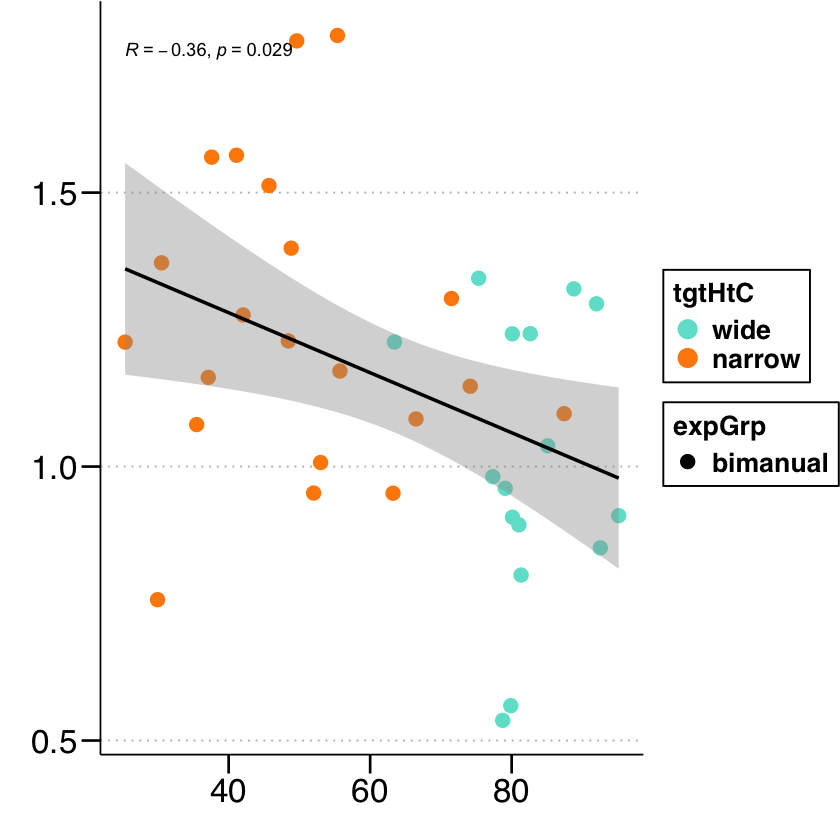

In [23]:
options(repr.plot.width=7, repr.plot.height=7)
overallSucc_ae = 
ggplot(expt2_LME.succ %>% filter(expGrp=="bimanual"), #& tgtHtC=="narrow"), 
       aes(x = succRate_grMn, y = slopesR10_corr_mn,#succRate_mn, #
                           group = interaction(expGrp,tgtHtC), col = tgtHtC, shape = expGrp)) + 
# coord_capped_cart(ylim = c(0.75,2), xlim = c(0,100), bottom = 'both', left = 'both') +
geom_point(size = 3, stroke=2, show.legend = TRUE) + 
geom_smooth(aes(group = 1),col="black", method = "lm", show.legend = FALSE) +  
# stat_ellipse() + 
scale_color_manual(values = c("#6CE1D1","#FF8A04")) +
scale_fill_manual(values = c("#6CE1D1","#FF8A04")) +
scale_shape_manual(values = c(16,16)) +
labs(x = "",y="")+theme_clean() + thm +
theme(plot.margin = unit(c(0.01, 0.01, 0.01, 0.01),"inches")) +
theme(plot.background = element_blank(),
      panel.border = element_blank()) +
stat_cor(aes(group = 1), method = "spearman") 
overallSucc_ae
# ggsave(file="succAE.svg", plot=overallSucc_ae, width=7, height=7)


<font color='red'> </font>
****